In [1]:
from loadTDMS import *
from fft_test import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns

In [2]:
def fft_integrated_one_rotation_do_not_to_csv(start,end,num,j):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][start:end]
    
    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    
    
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

    return 20*np.log10(amp_) +85

In [76]:
def time_hist_integrator_rect(dt, dx_dt):
    xt = 0.
    x = []
    for dxt_dt in dx_dt:
        xt += dxt_dt * dt
        x.append(xt)        
    return x[-1]

In [4]:
for i in range(1,170):
    mensekis = []
    for j in tqdm(range(0,914)):
        num = i
        sample_num = 2**14
        start = j * sample_num
        end = (j+1) * sample_num
        fft_result = fft_integrated_one_rotation_do_not_to_csv(start,end,num,j)
        menseki = time_hist_integrator_rect(1,fft_result)
        mensekis.append(menseki)
    d = np.array(mensekis)
    np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}", d)
#     histogram_pic = sns.distplot(d, kde=False, rug=False)
#     figure = histogram_pic.get_figure()
#     figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.png")

100%|██████████| 914/914 [04:32<00:00,  3.35it/s]


 12%|█▏        | 20/169 [00:06<00:46,  3.21it/s]<ipython-input-36-e44849df9ad3>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()
100%|██████████| 169/169 [00:59<00:00,  2.86it/s]


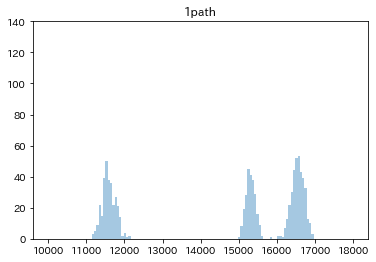

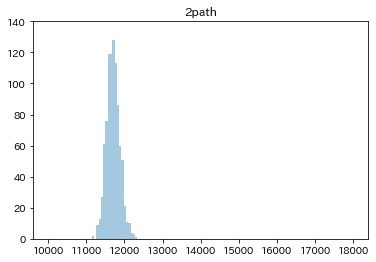

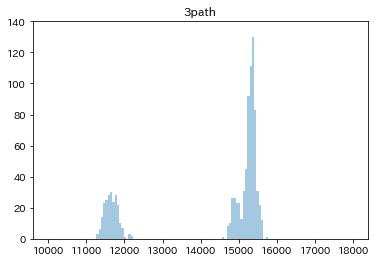

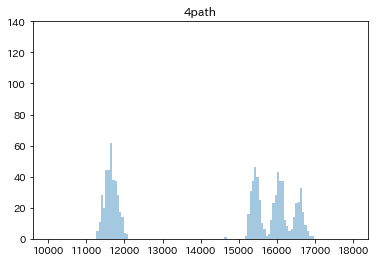

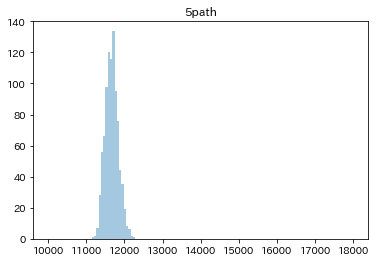

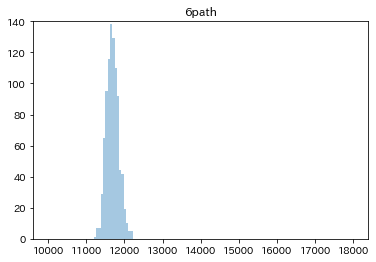

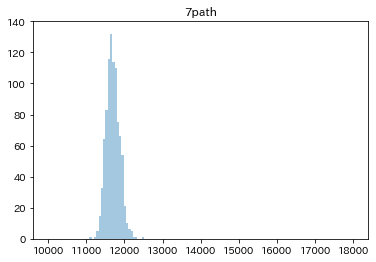

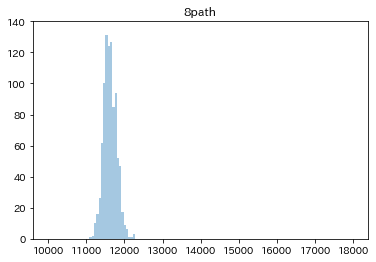

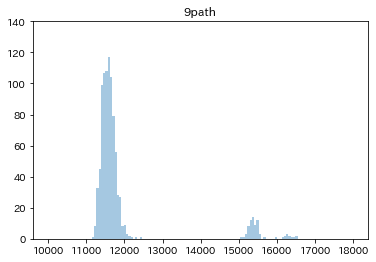

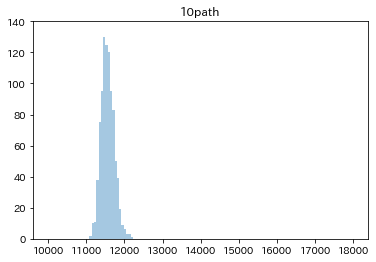

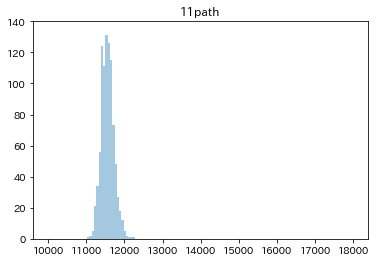

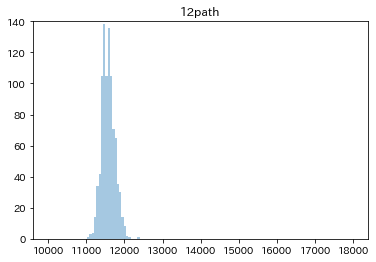

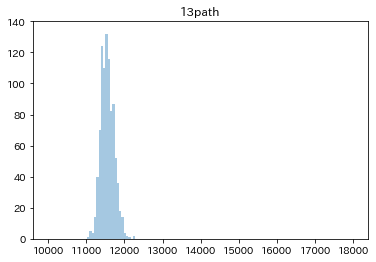

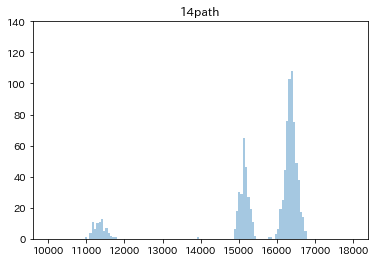

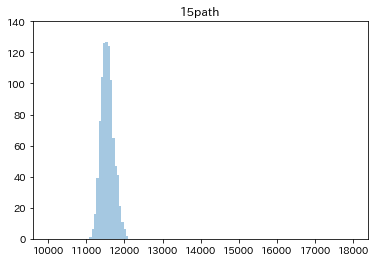

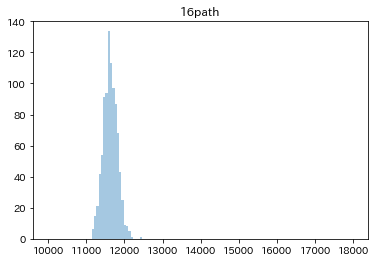

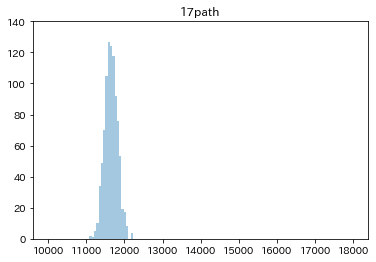

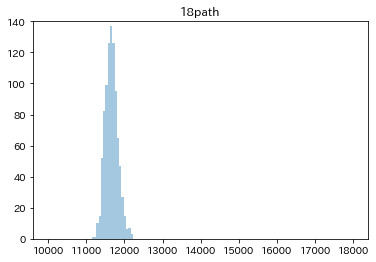

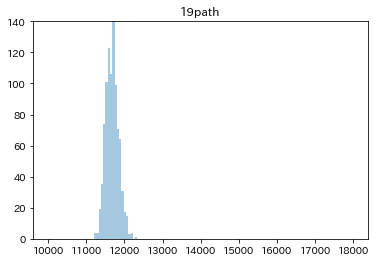

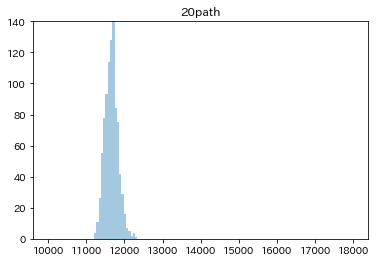

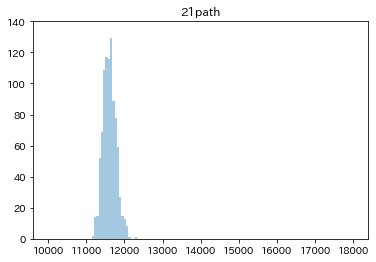

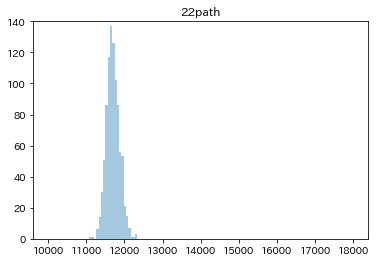

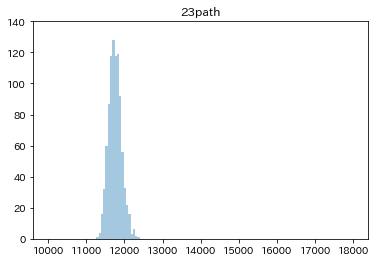

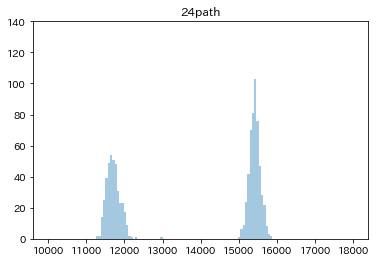

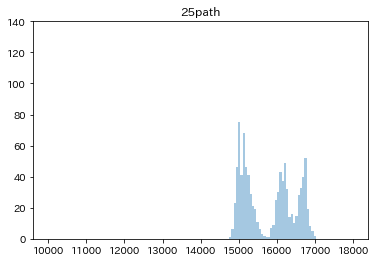

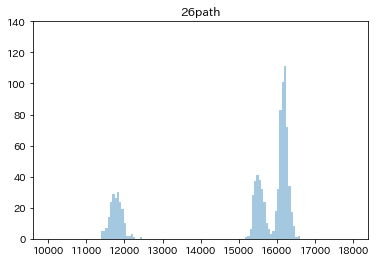

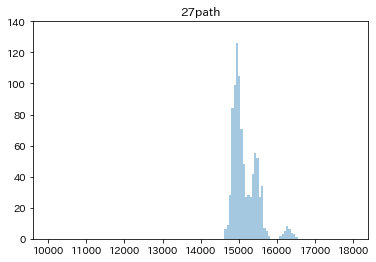

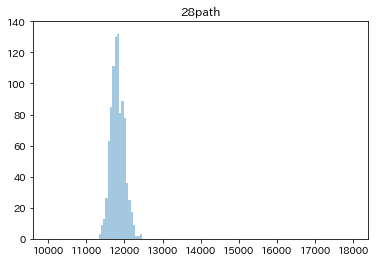

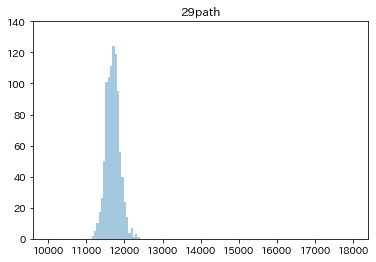

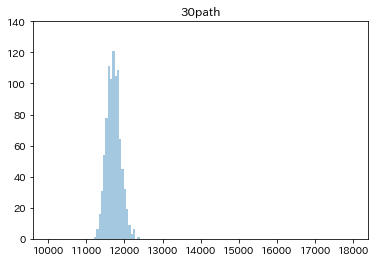

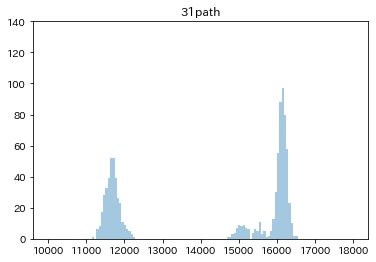

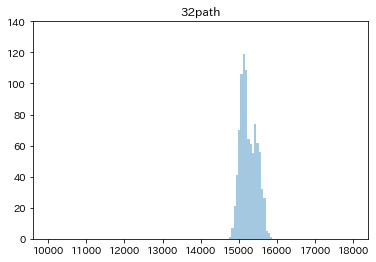

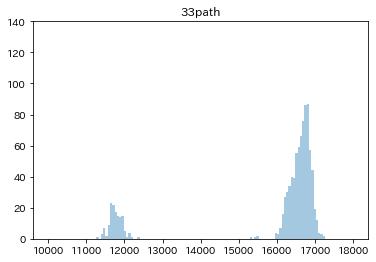

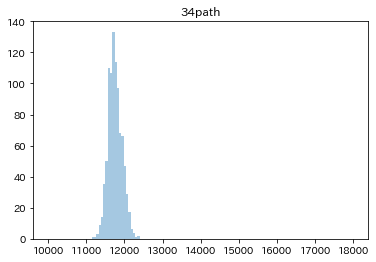

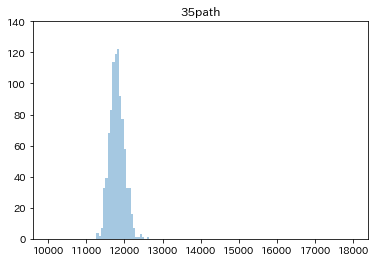

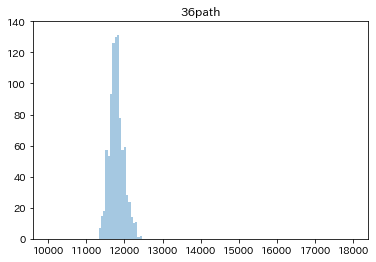

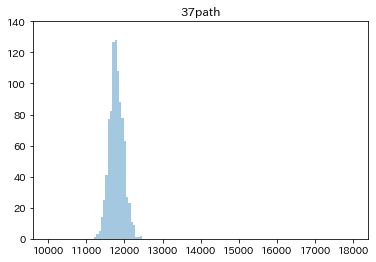

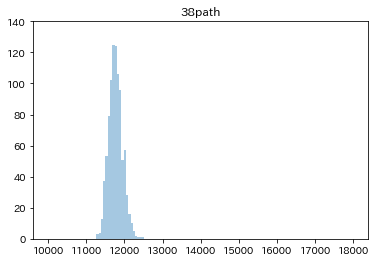

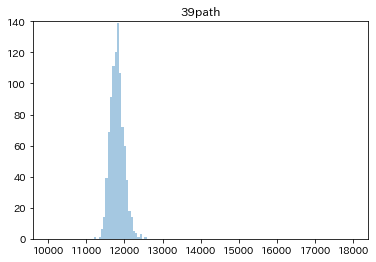

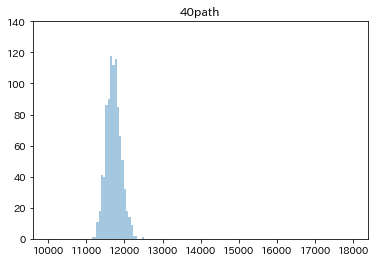

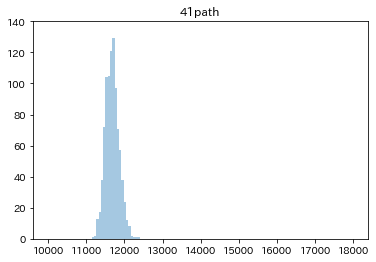

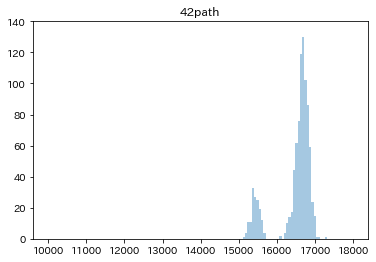

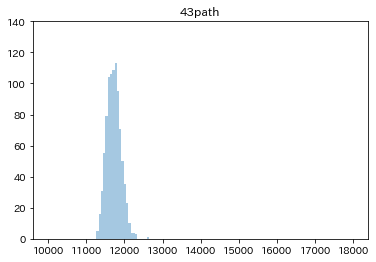

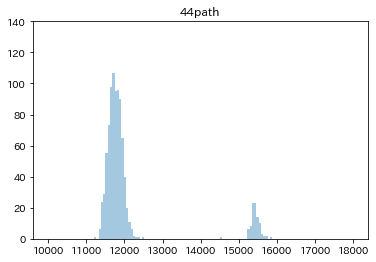

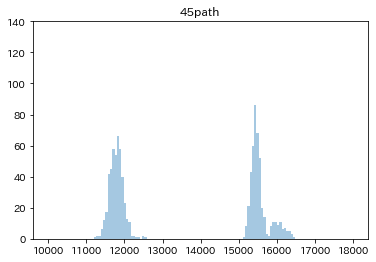

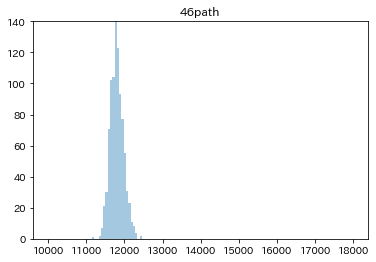

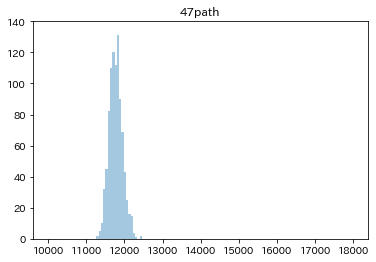

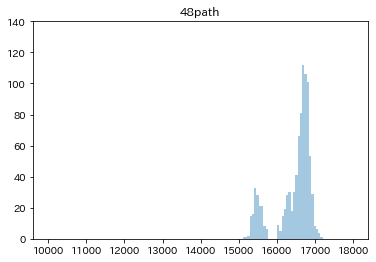

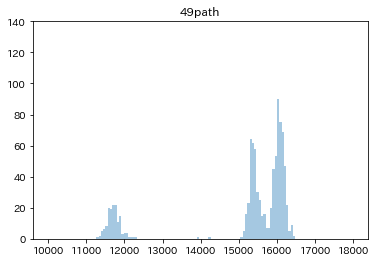

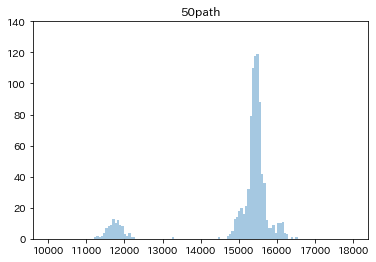

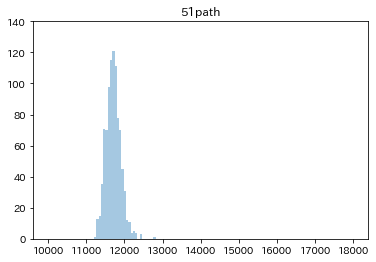

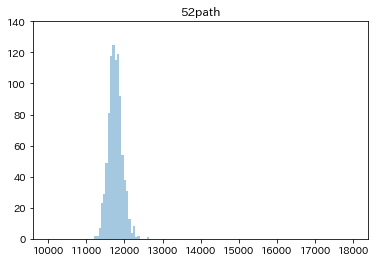

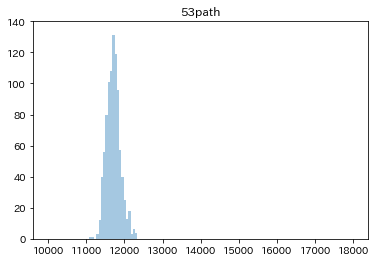

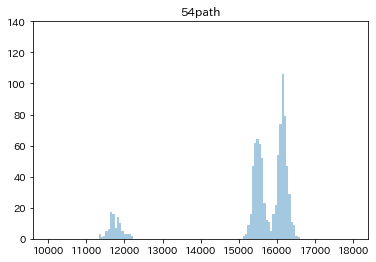

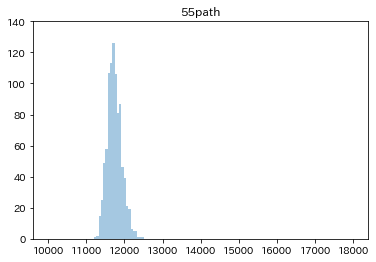

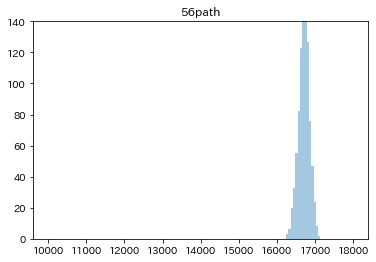

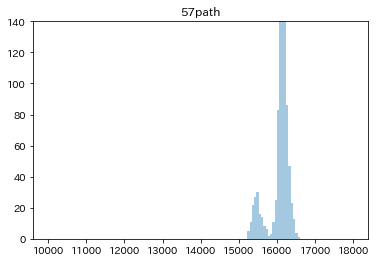

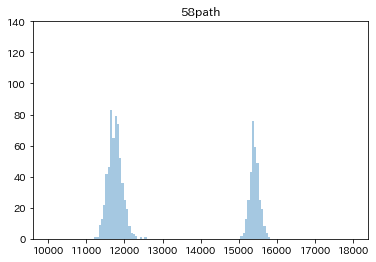

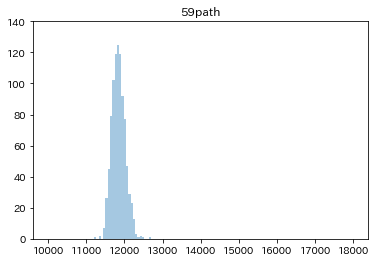

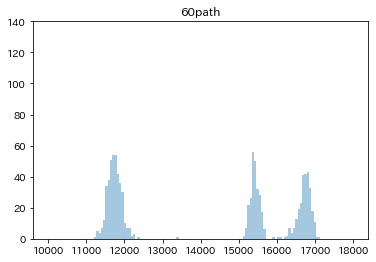

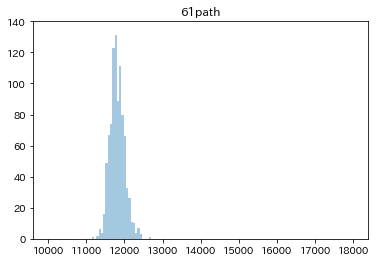

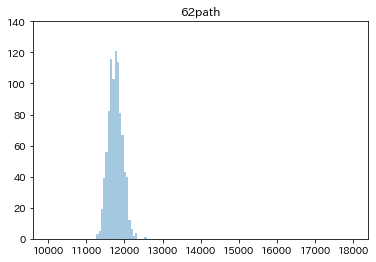

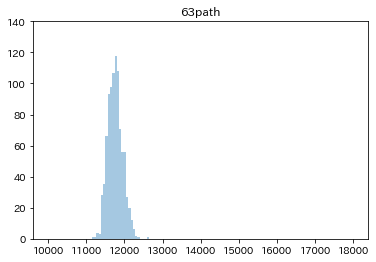

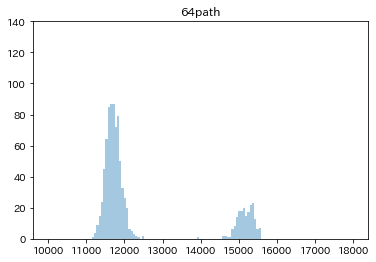

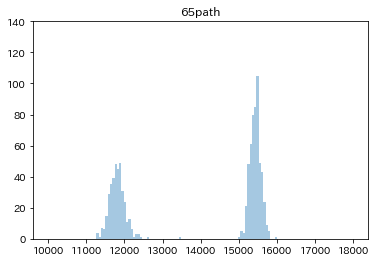

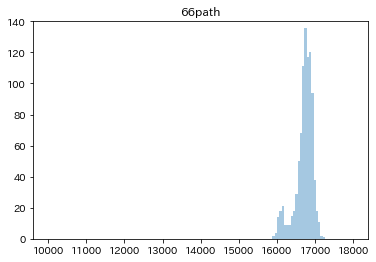

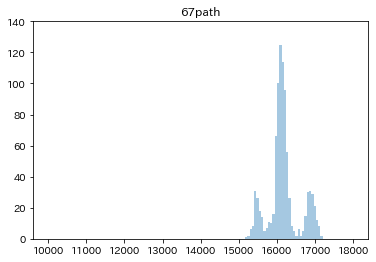

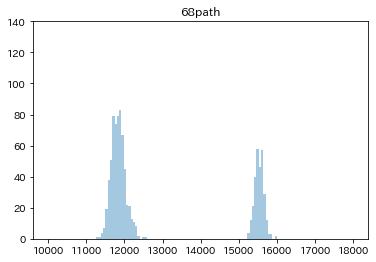

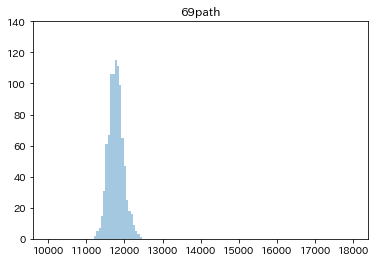

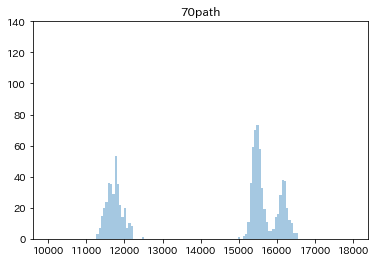

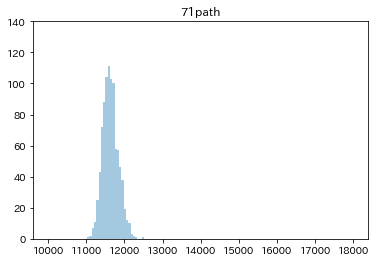

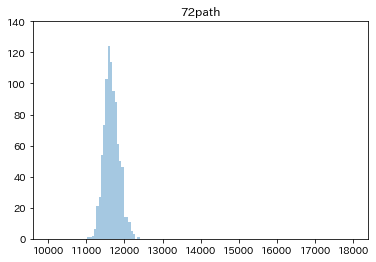

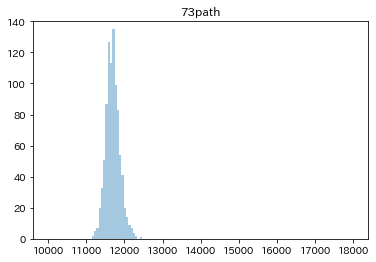

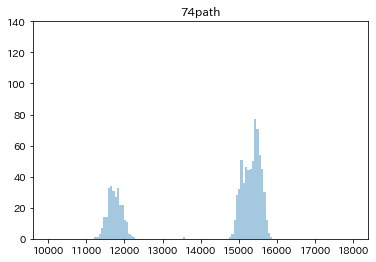

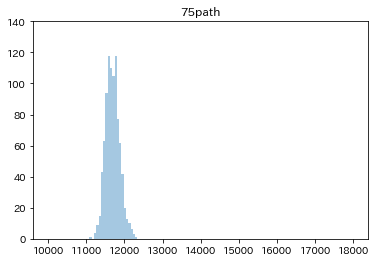

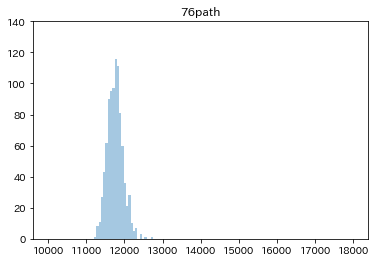

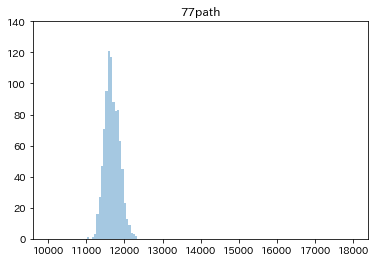

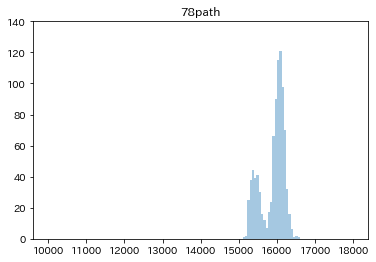

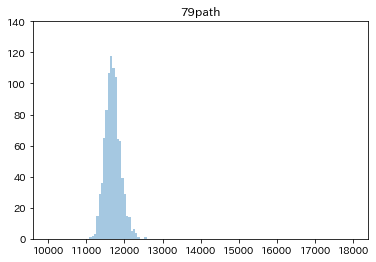

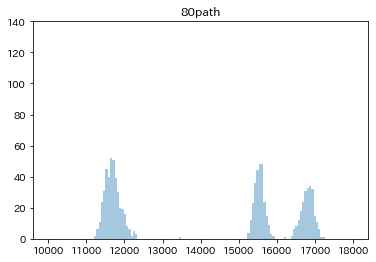

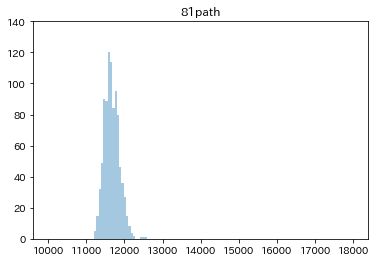

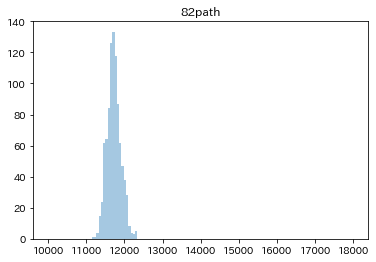

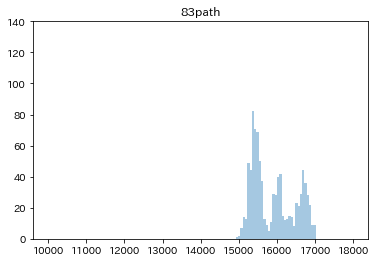

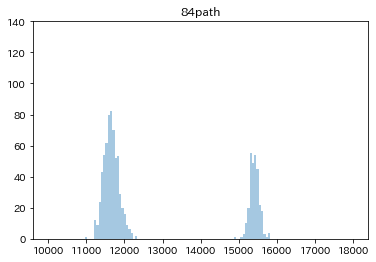

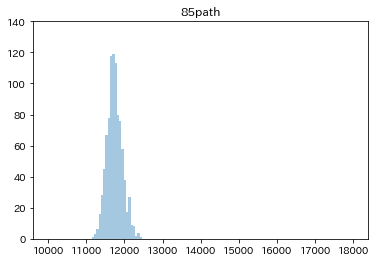

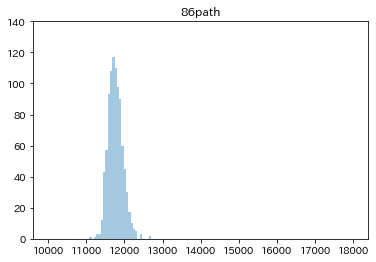

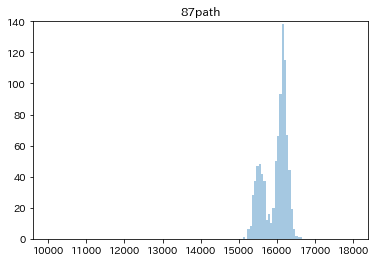

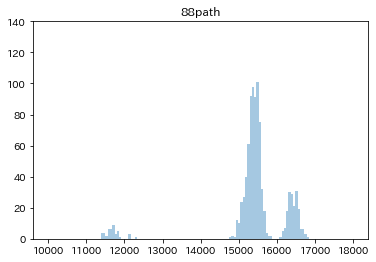

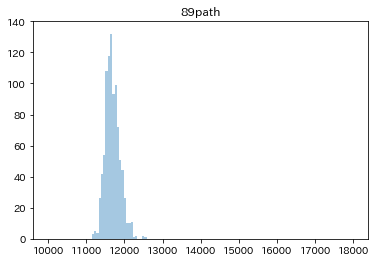

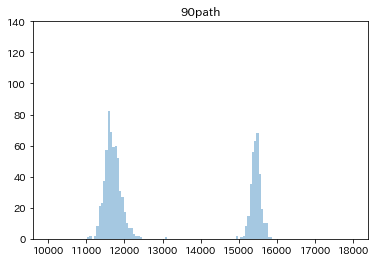

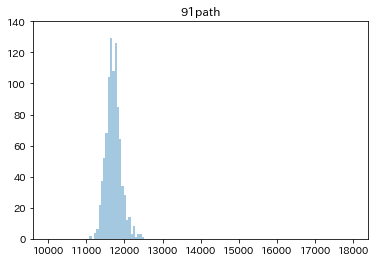

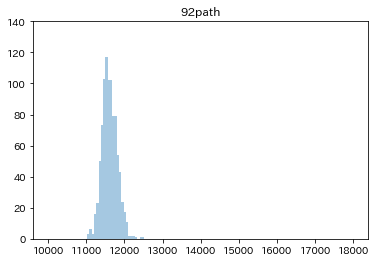

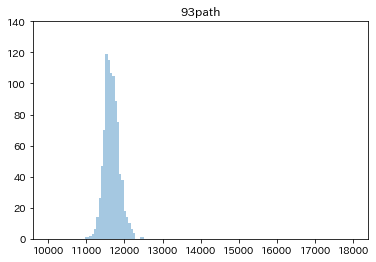

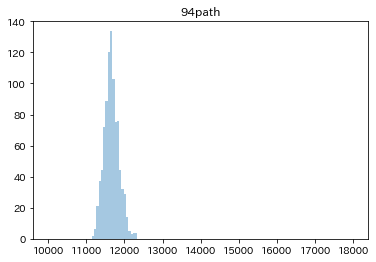

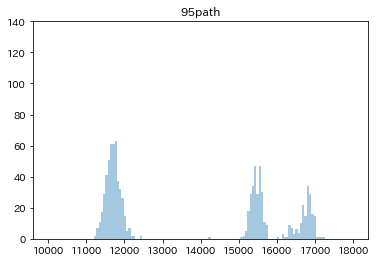

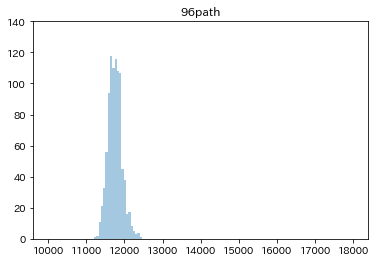

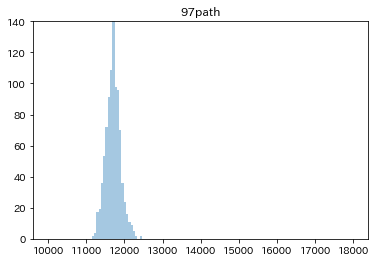

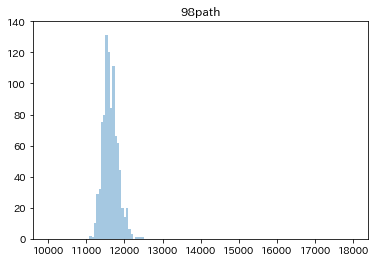

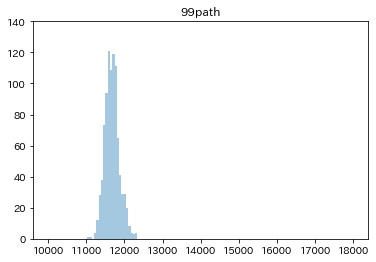

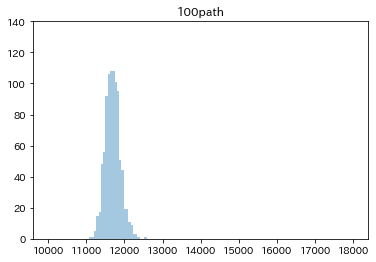

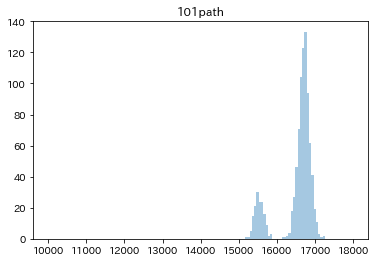

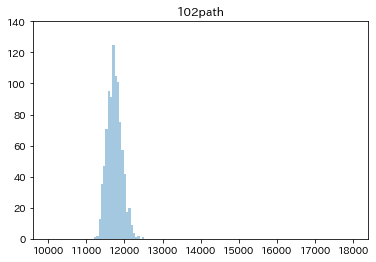

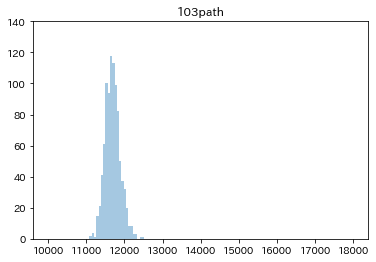

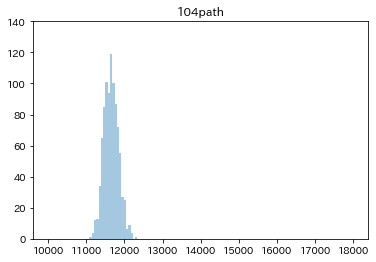

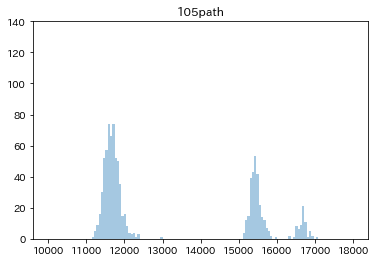

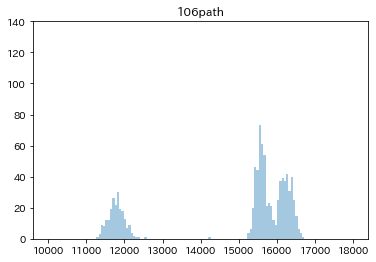

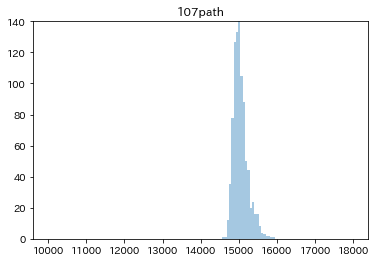

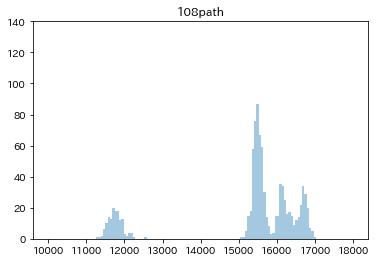

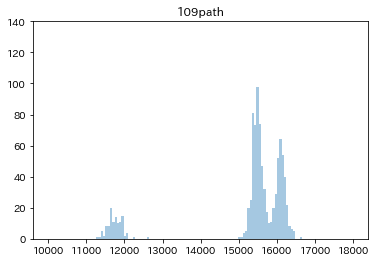

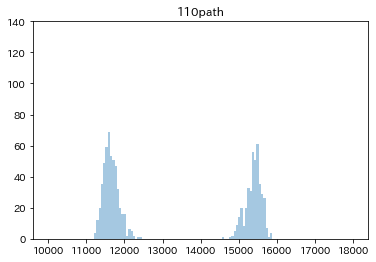

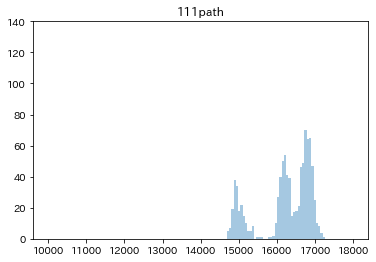

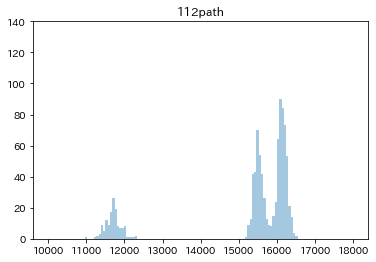

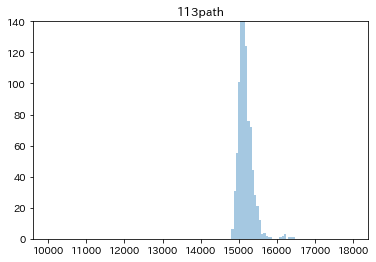

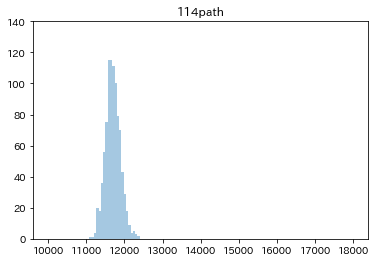

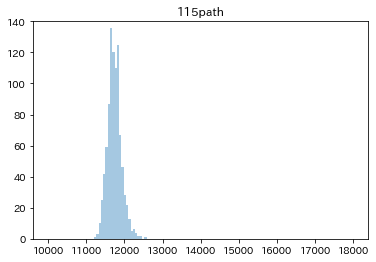

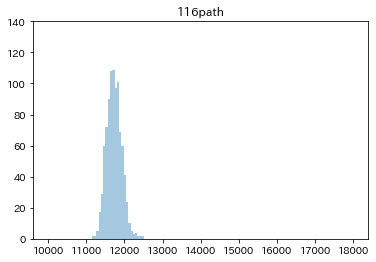

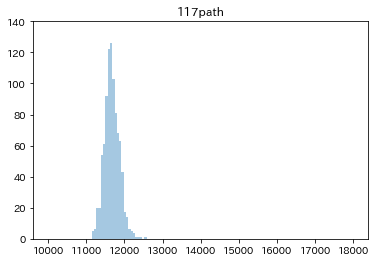

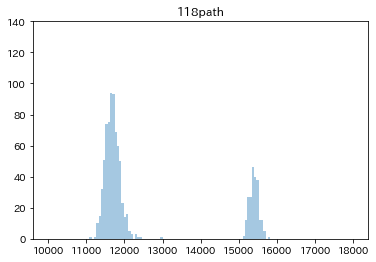

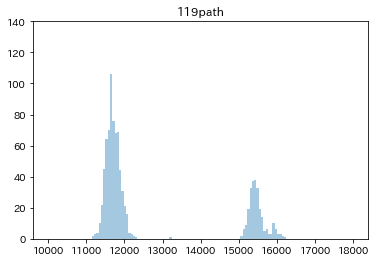

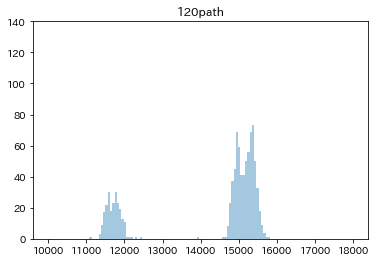

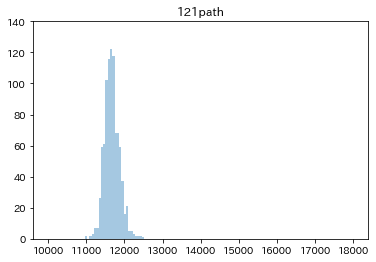

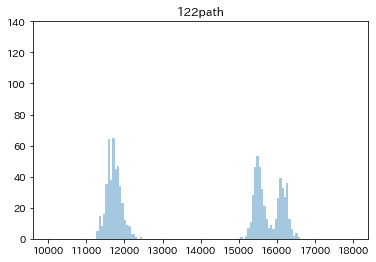

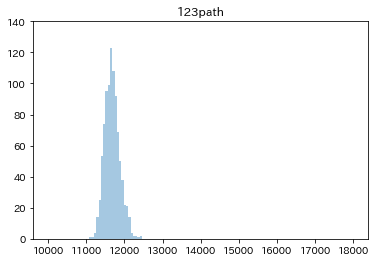

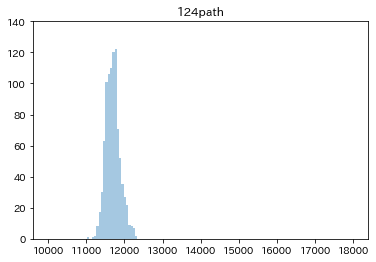

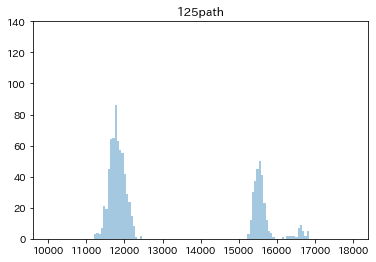

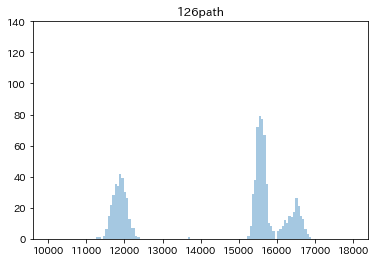

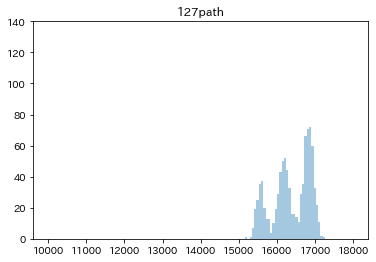

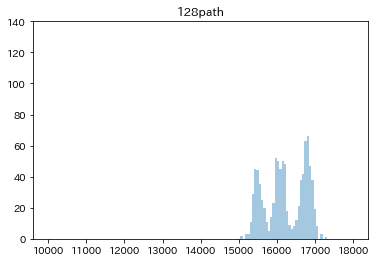

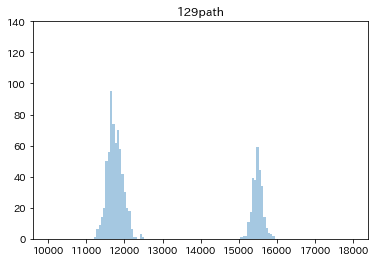

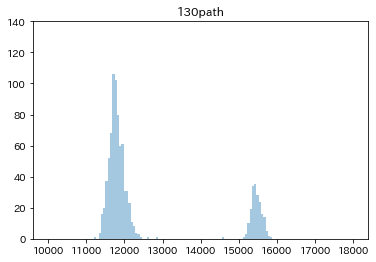

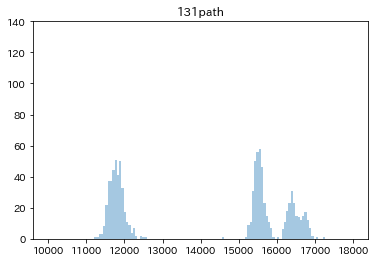

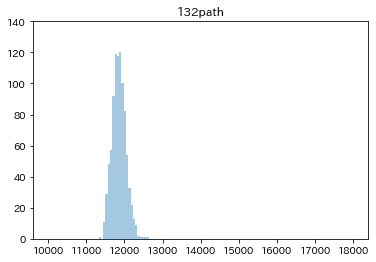

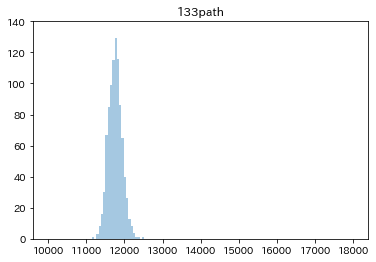

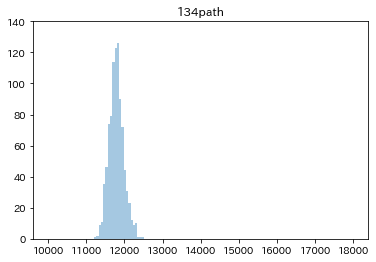

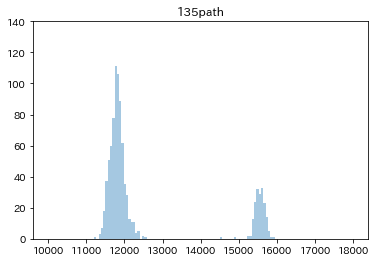

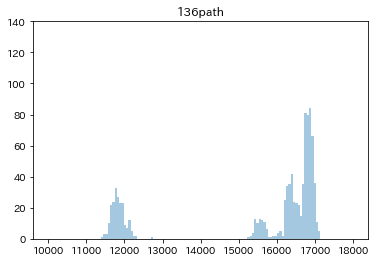

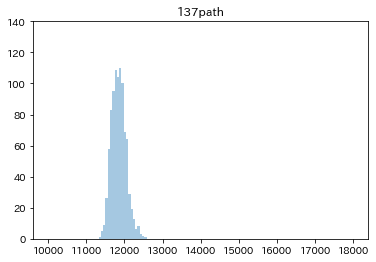

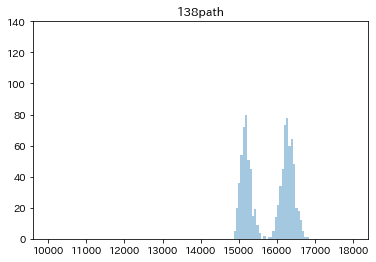

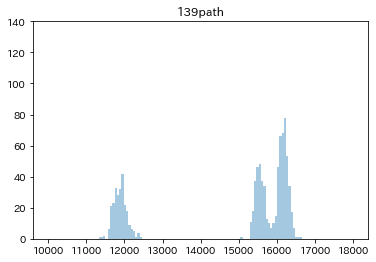

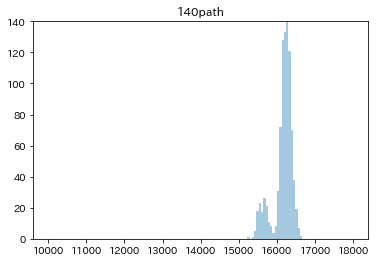

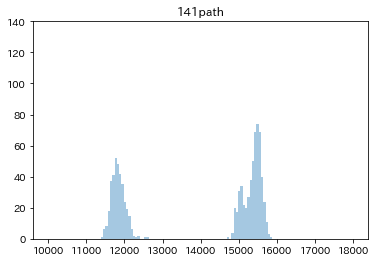

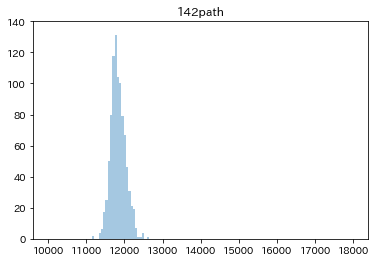

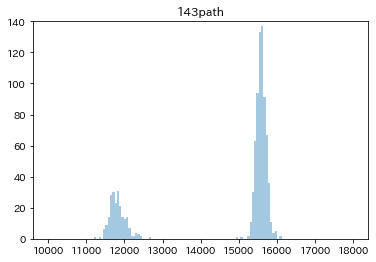

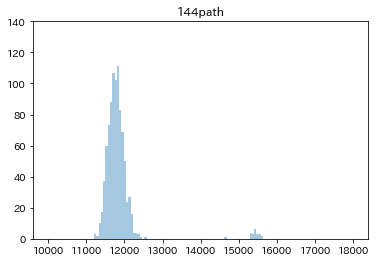

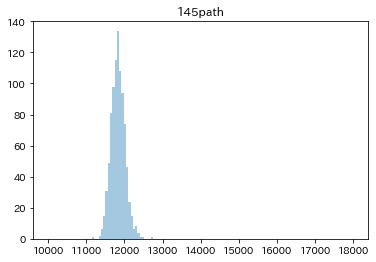

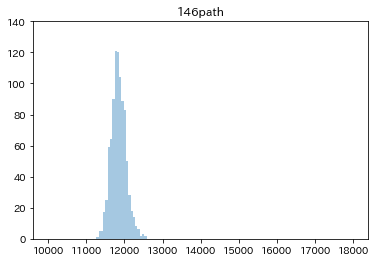

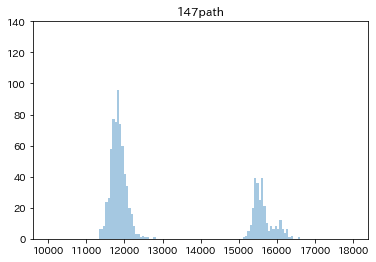

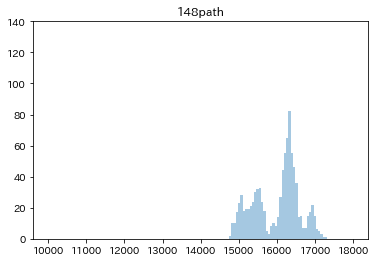

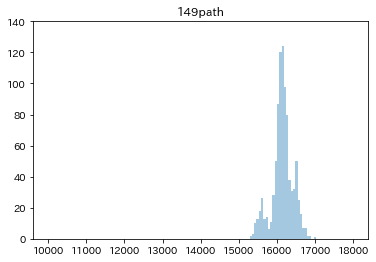

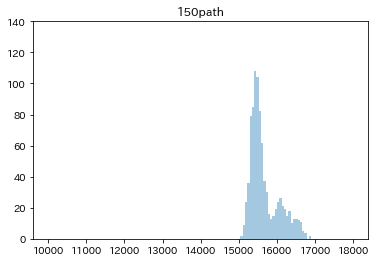

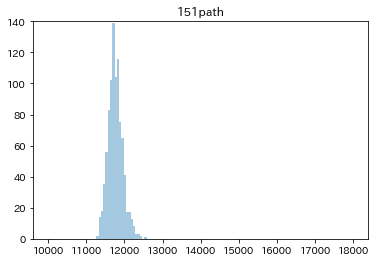

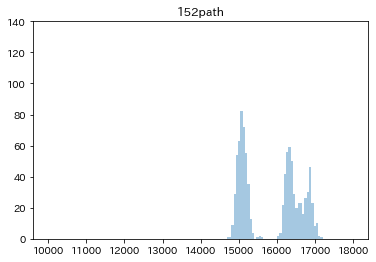

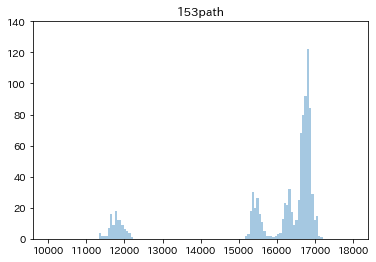

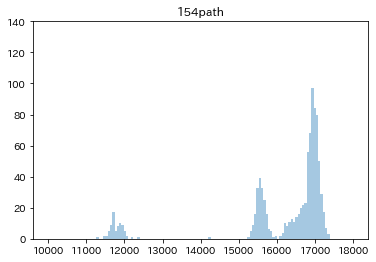

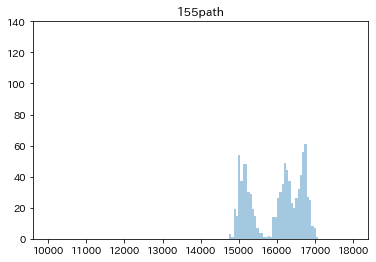

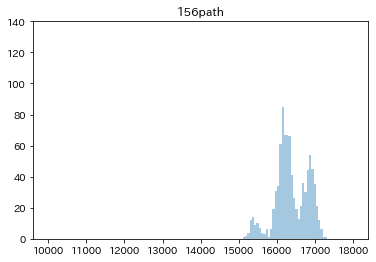

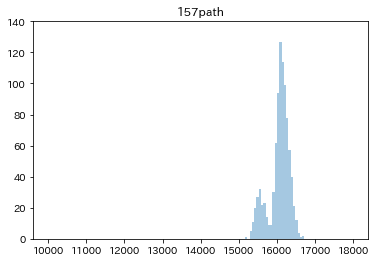

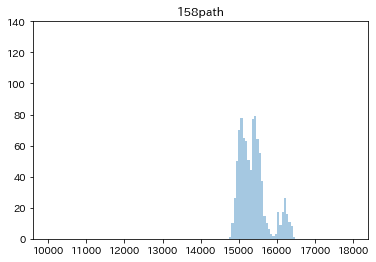

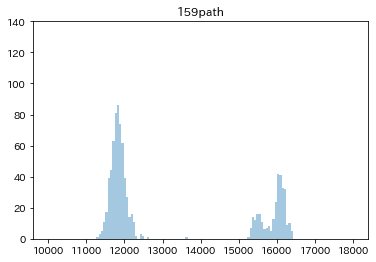

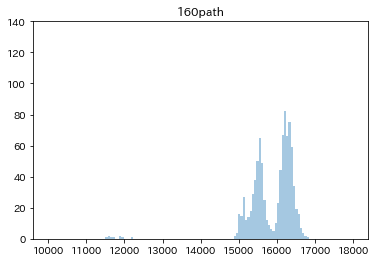

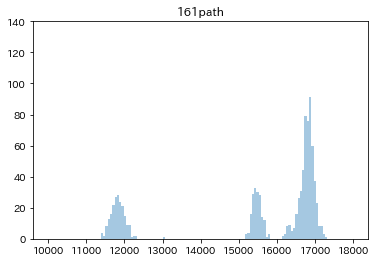

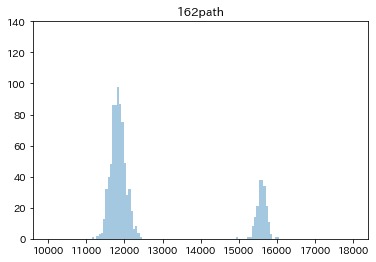

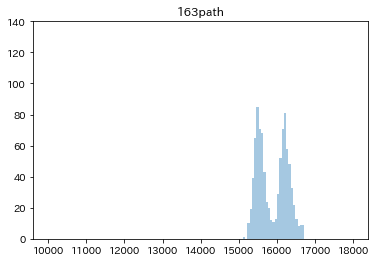

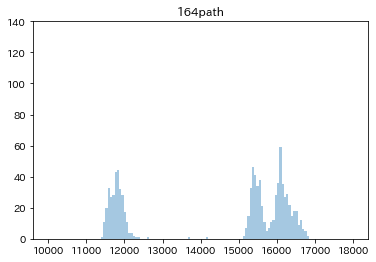

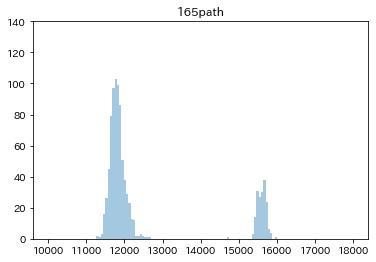

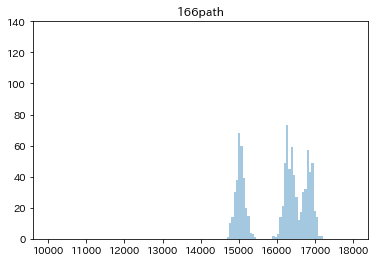

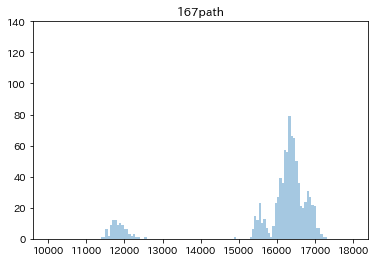

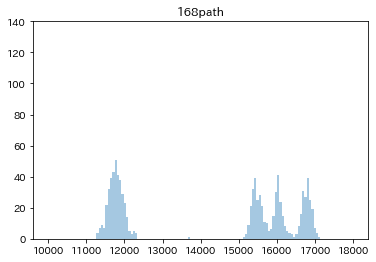

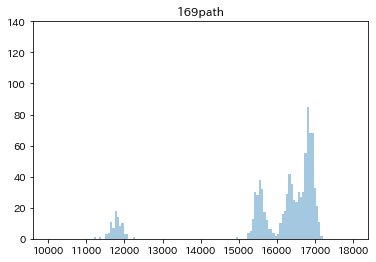

In [36]:
x_min = 10000
x_max = 18000
range_bin_width = range(x_min, x_max, 60)


for num in tqdm(range(1,170)):
    figure, ax = plt.subplots()
    dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.npy")
    hist_p = sns.distplot(dd, bins=range_bin_width, kde=False, rug=False)
    figure = hist_p.get_figure()
    hist_p.set_title(rf"{num}path")
    ax.set_ylim(0, 140)
    figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.png")

 12%|█▏        | 20/169 [00:02<00:21,  6.81it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 12%|█▏        | 21/169 [00:02<00:22,  6.53it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 13%|█▎        | 22/169 [00:02<00:25,  5.69it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 38%|███▊      | 65/169 [00:09<00:14,  7.30it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 39%|███▉      | 66/169 [00:09<00:14,  7.03it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 40%|███▉      | 67/169 [00:10<00:16,  6.20it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 52%|█████▏    | 88/169 [00:13<00:13,  6.18it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 53%|█████▎    | 89/169 [00:13<00:14,  5.59it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 53%|█████▎    | 90/169 [00:13<00:12,  6.32it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 78%|███████▊  | 132/169 [00:21<00:06,  5.65it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 79%|███████▊  | 133/169 [00:21<00:10,  3.55it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 79%|███████▉  | 134/169 [00:21<00:09,  3.81it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

 92%|█████████▏| 155/169 [00:24<00:01,  9.92it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 93%|█████████▎| 157/169 [00:24<00:01,  8.88it/s]<ipython-input-27-e17dfc2d7dc3>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

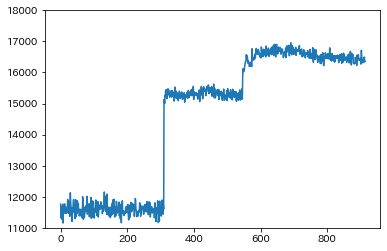

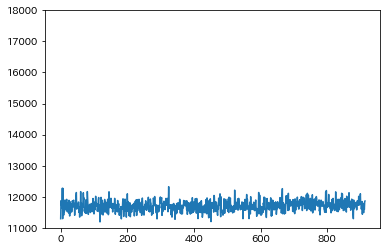

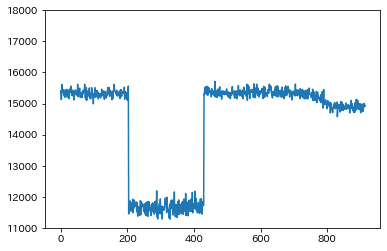

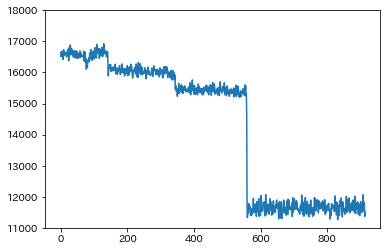

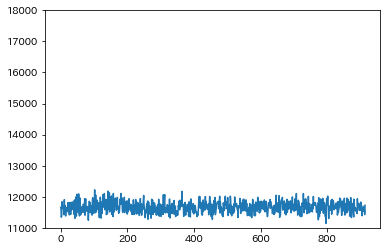

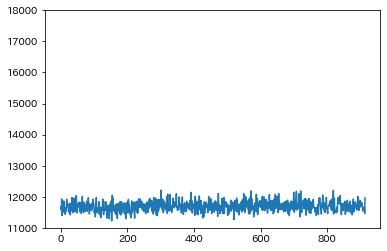

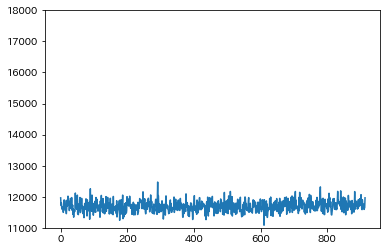

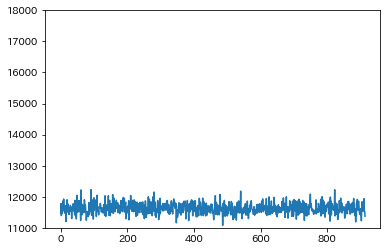

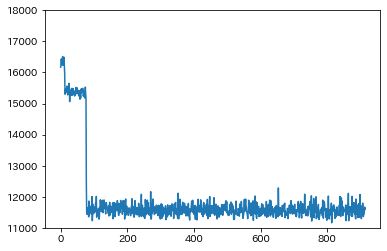

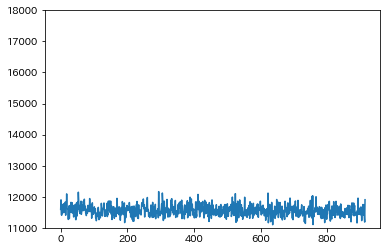

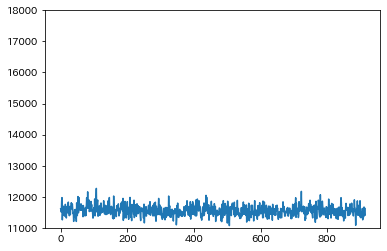

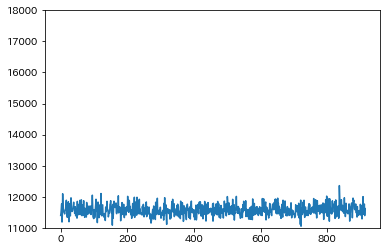

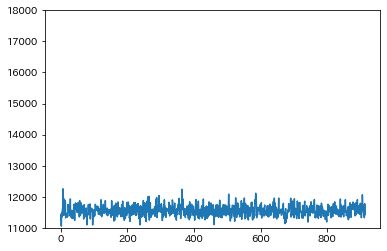

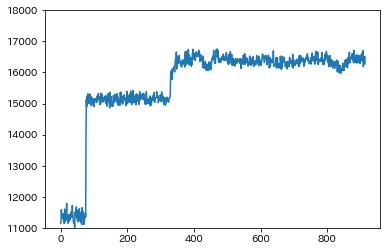

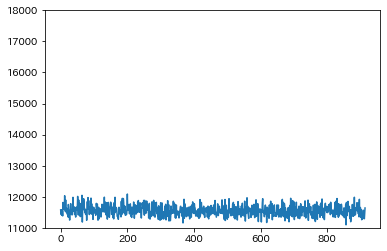

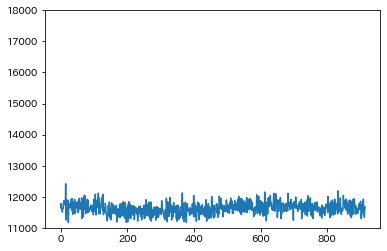

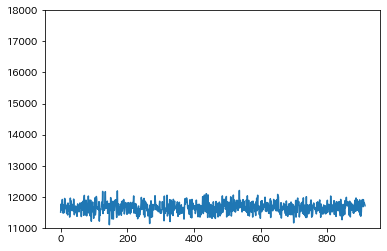

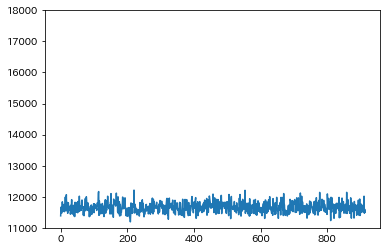

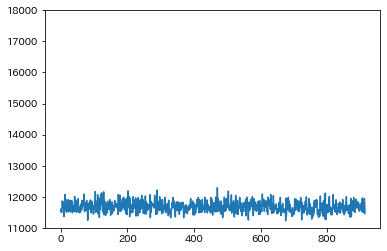

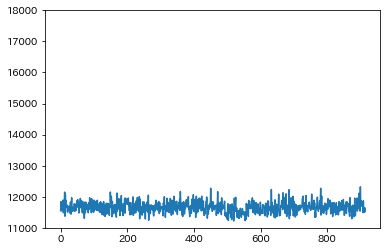

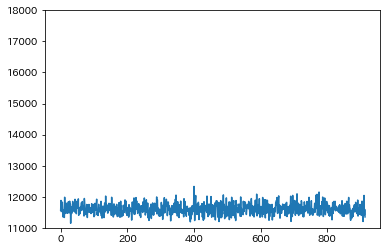

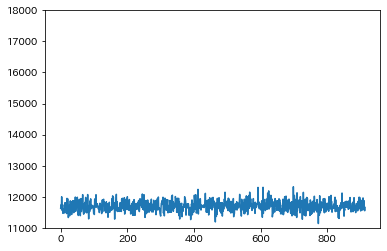

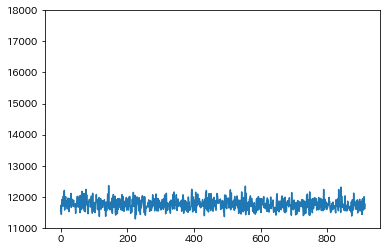

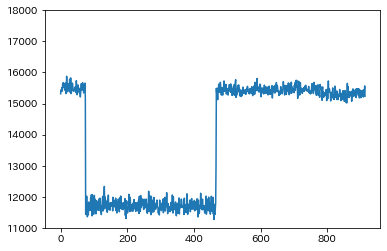

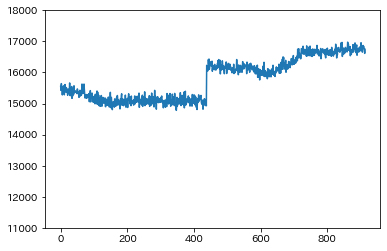

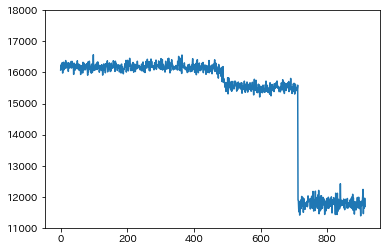

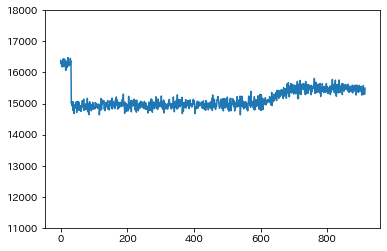

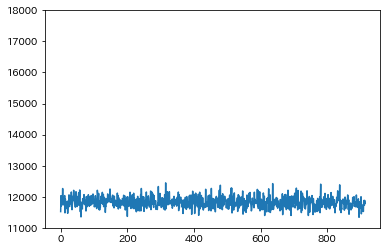

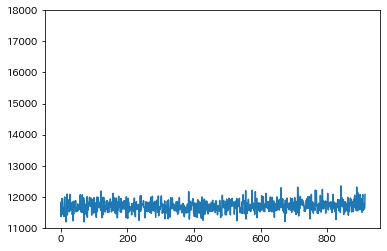

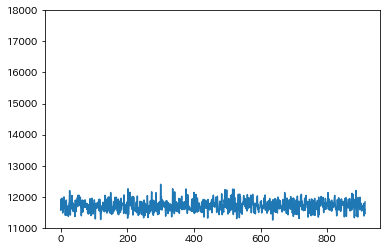

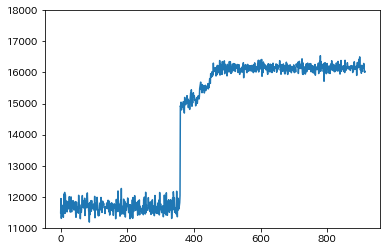

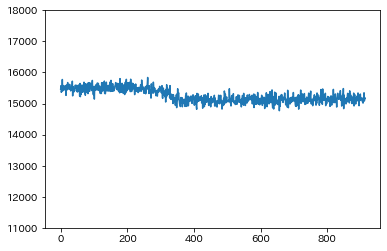

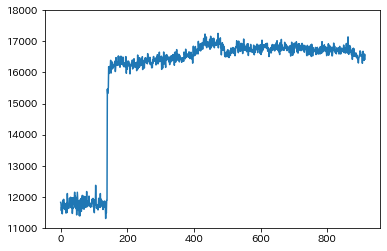

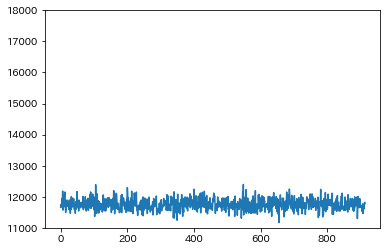

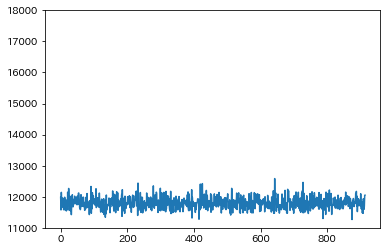

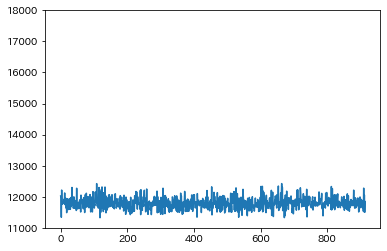

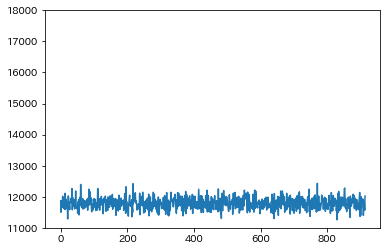

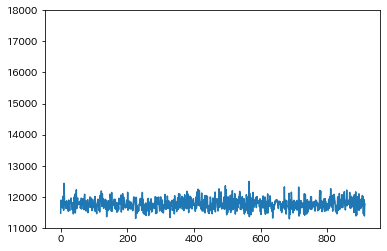

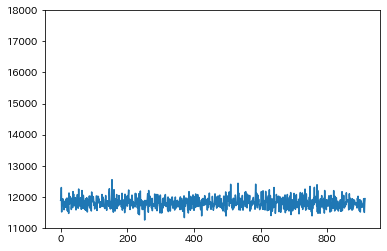

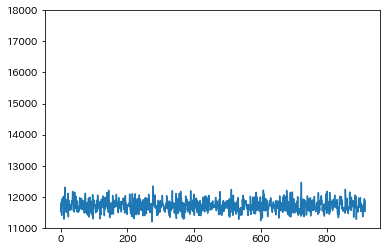

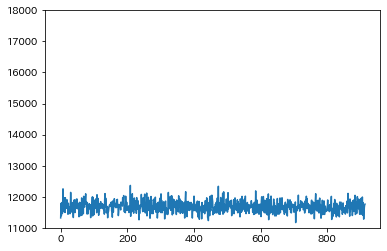

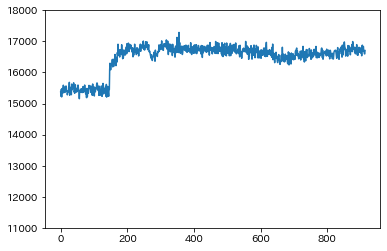

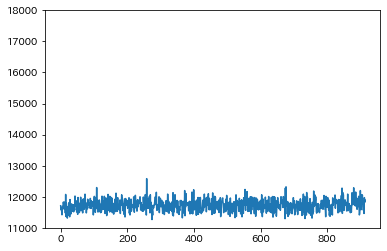

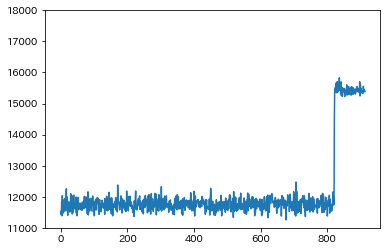

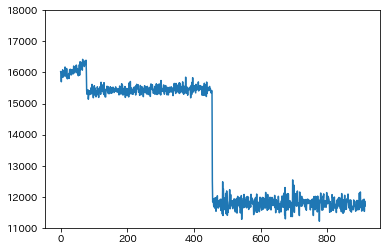

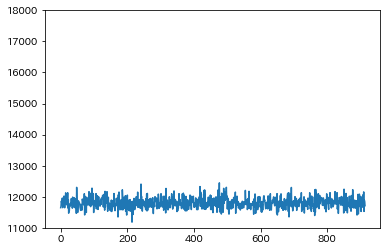

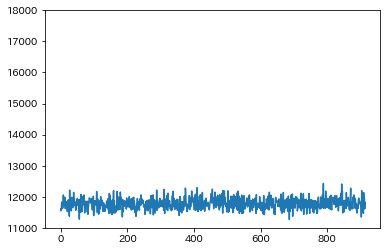

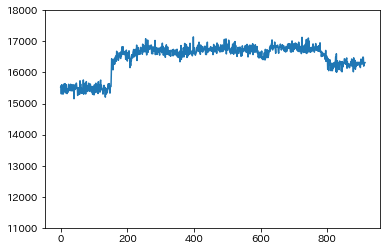

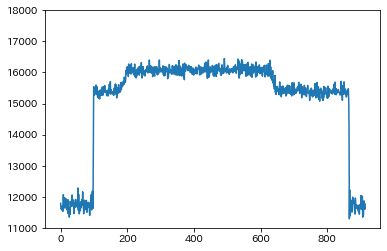

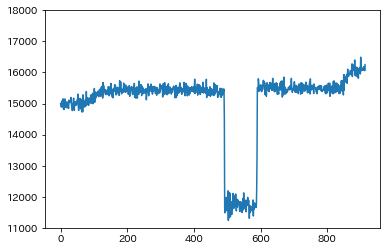

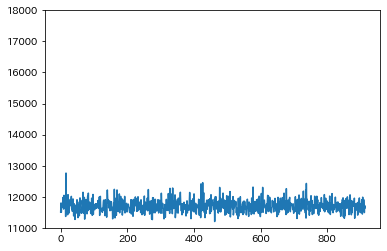

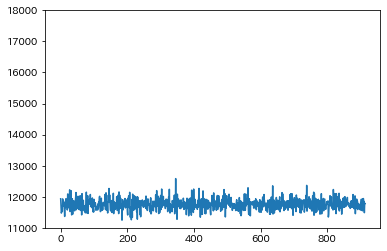

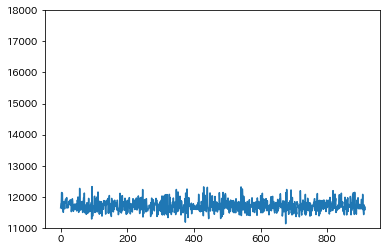

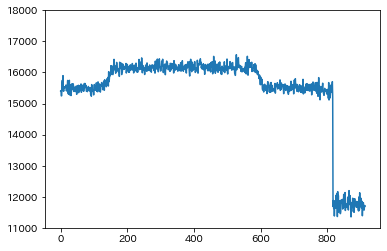

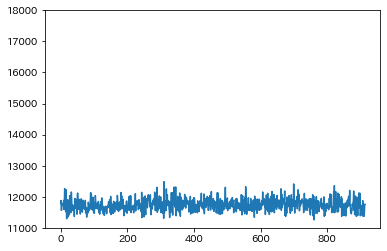

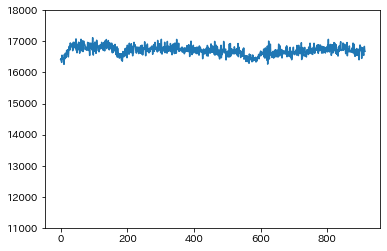

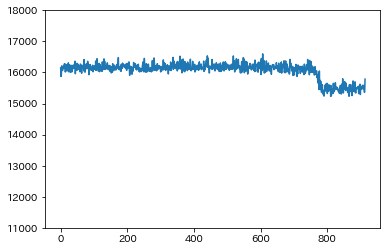

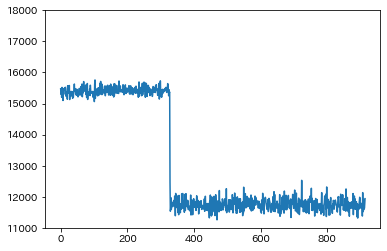

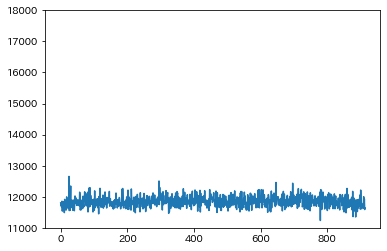

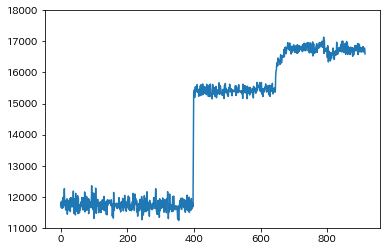

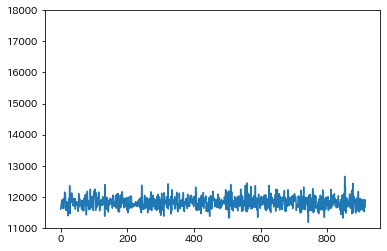

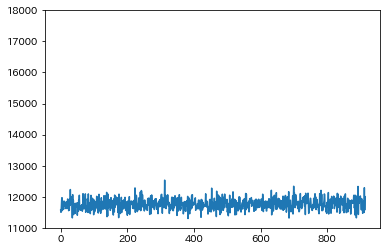

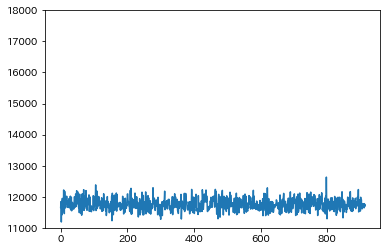

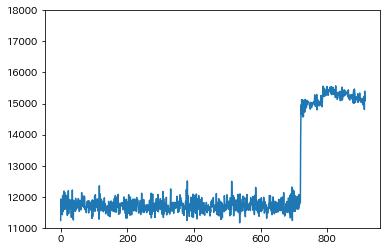

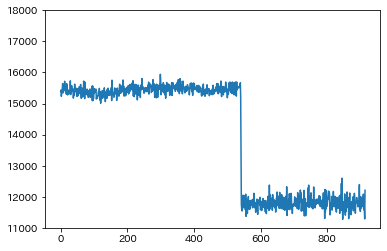

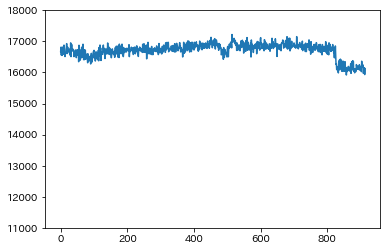

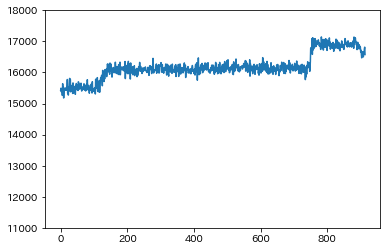

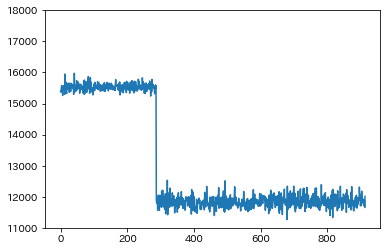

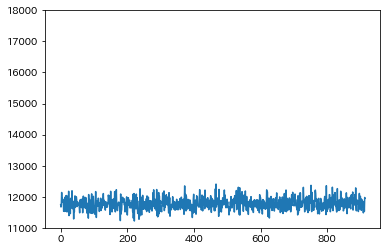

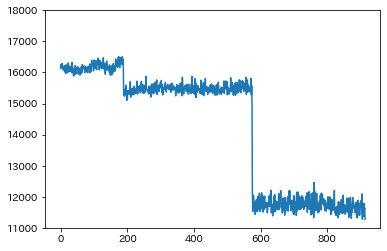

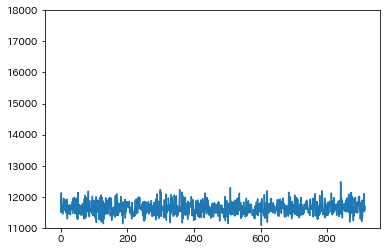

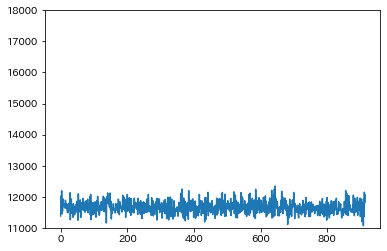

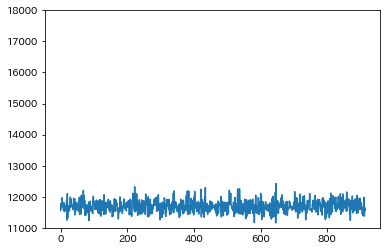

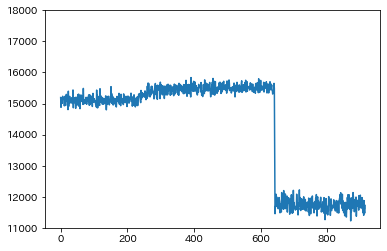

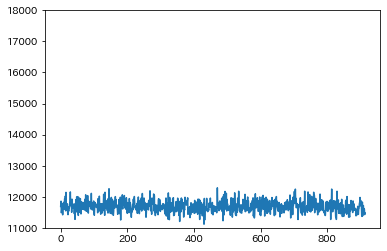

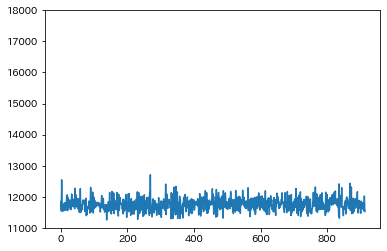

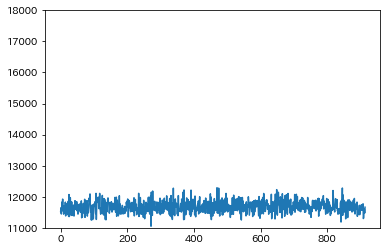

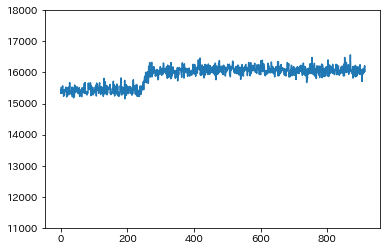

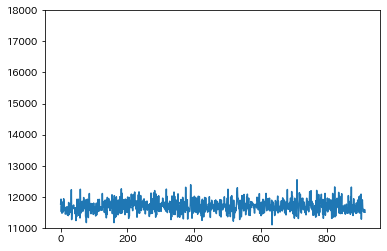

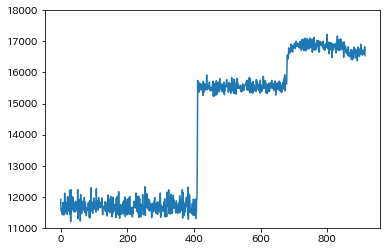

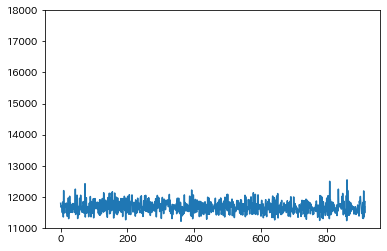

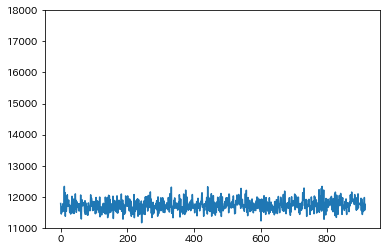

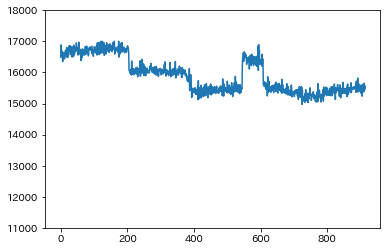

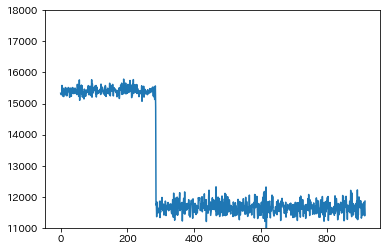

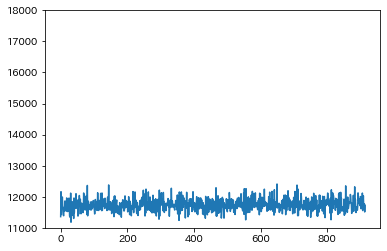

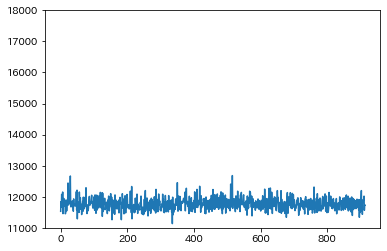

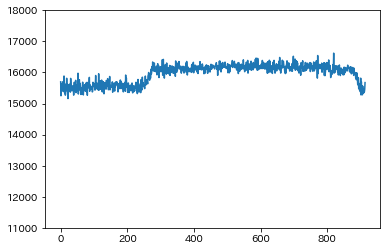

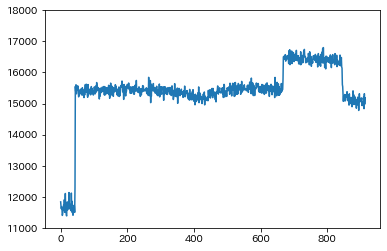

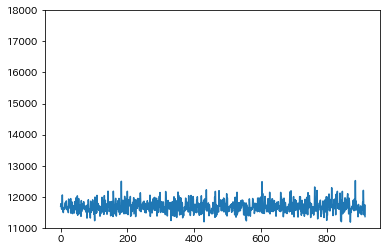

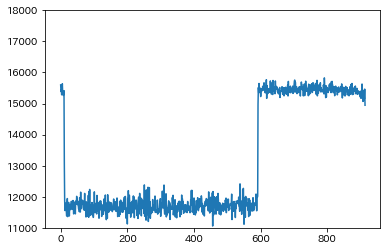

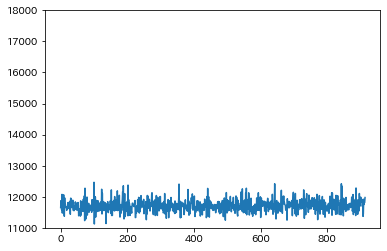

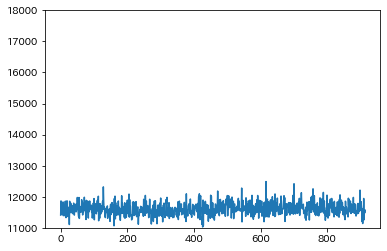

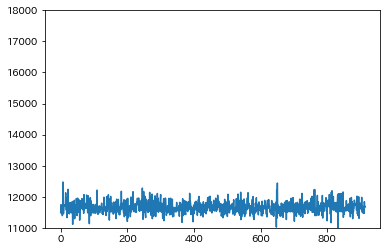

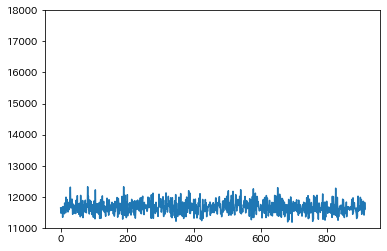

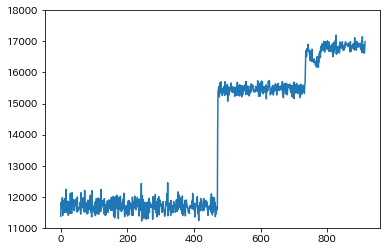

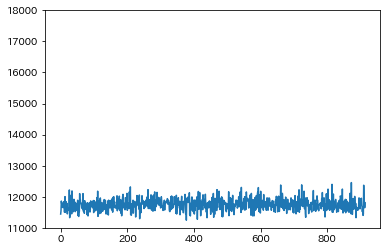

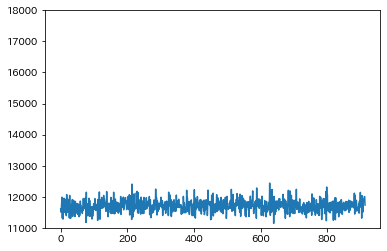

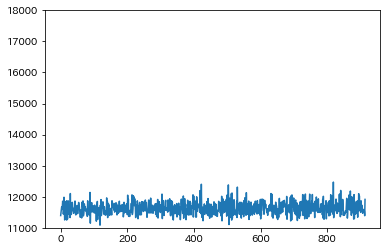

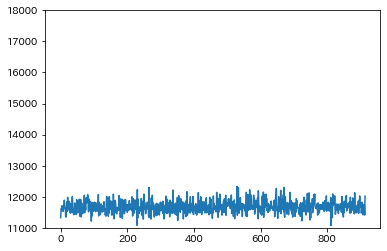

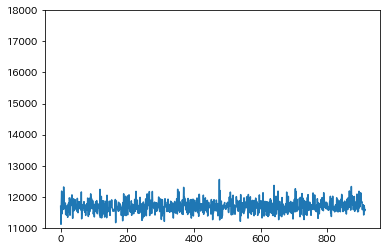

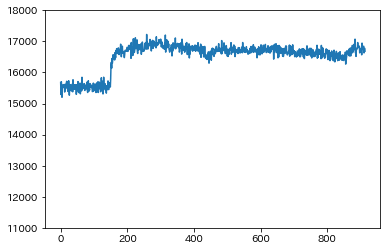

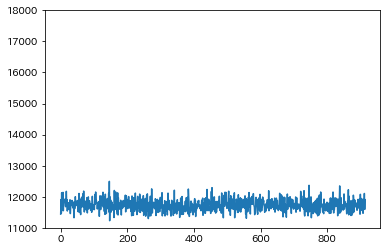

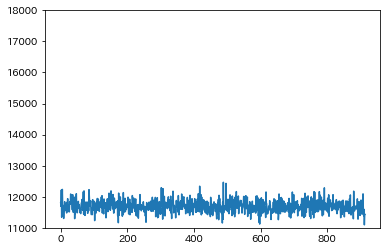

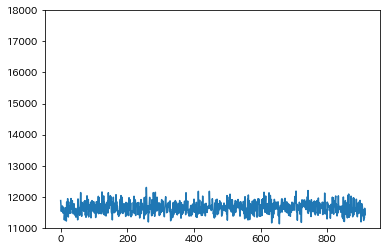

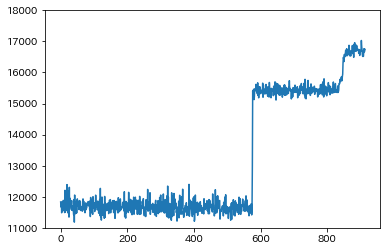

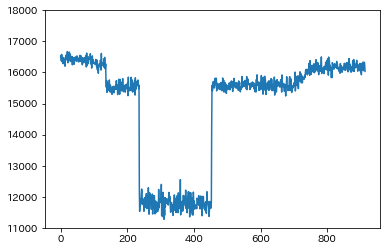

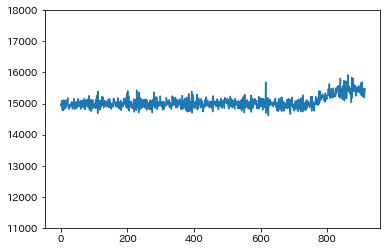

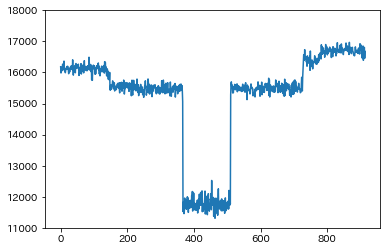

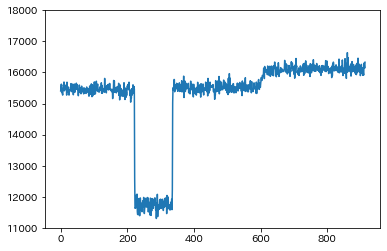

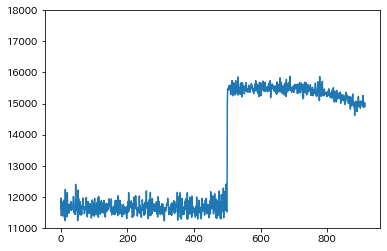

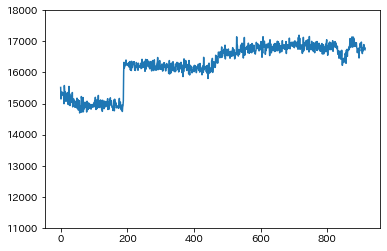

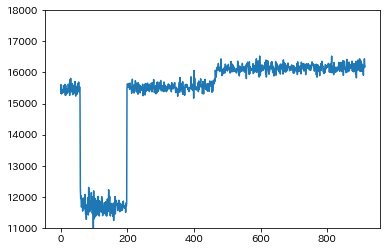

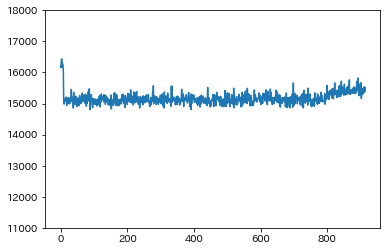

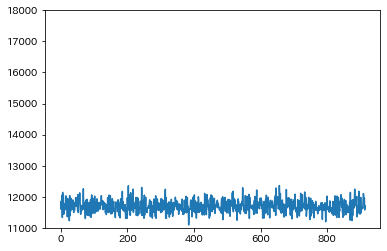

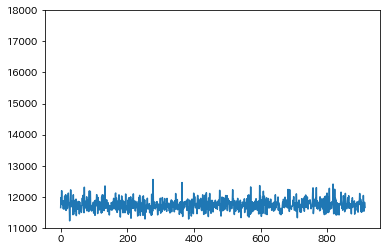

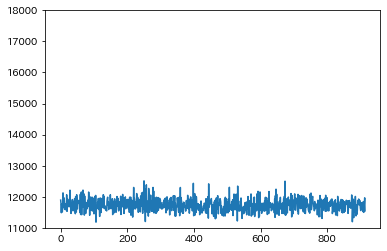

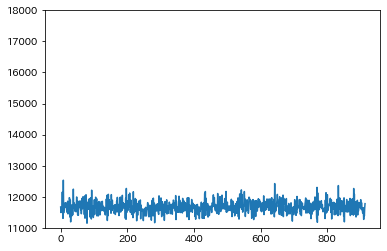

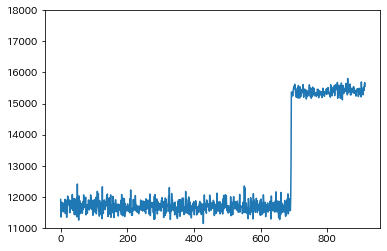

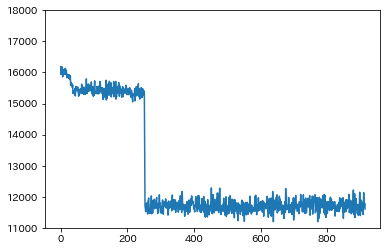

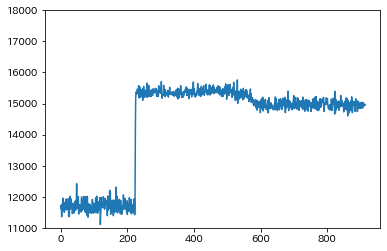

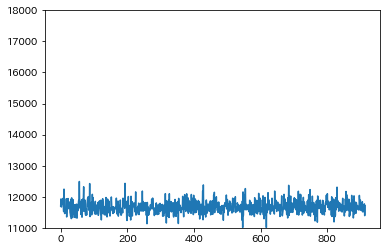

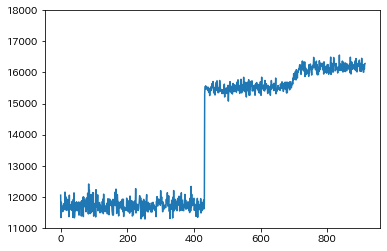

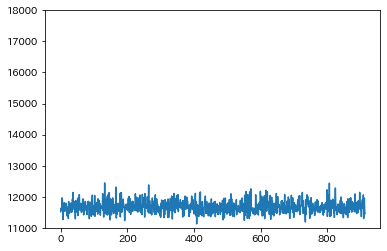

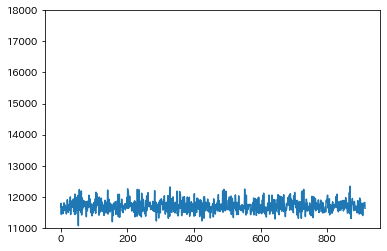

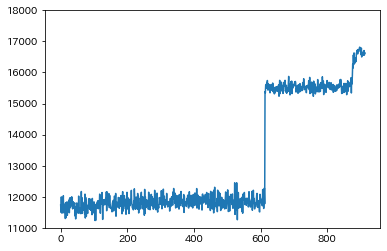

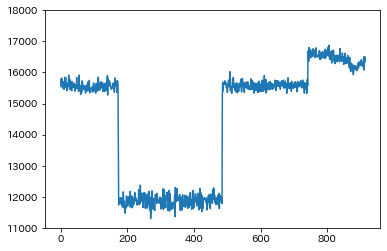

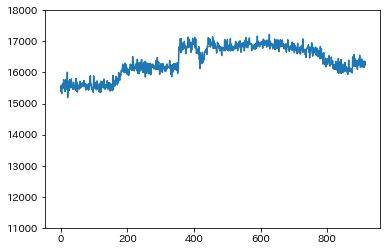

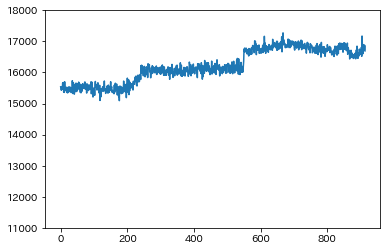

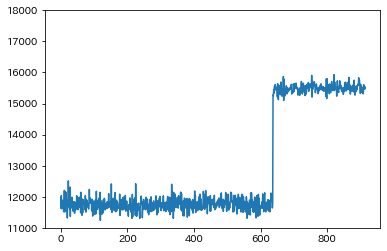

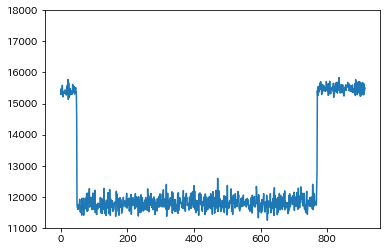

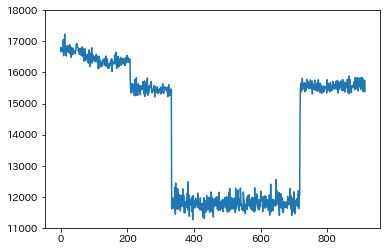

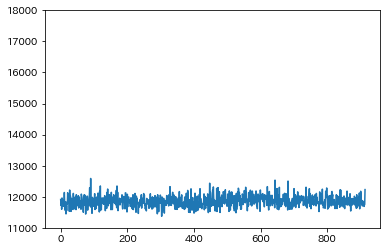

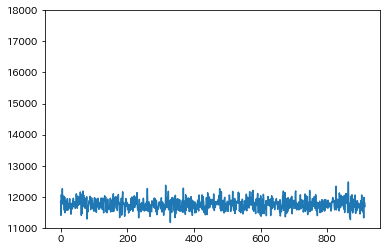

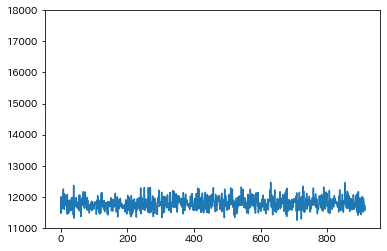

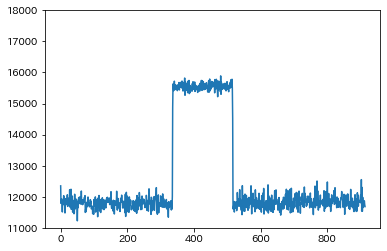

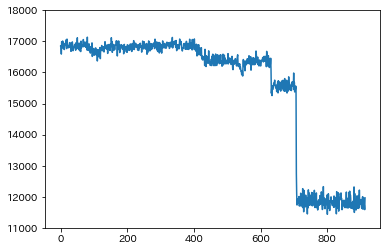

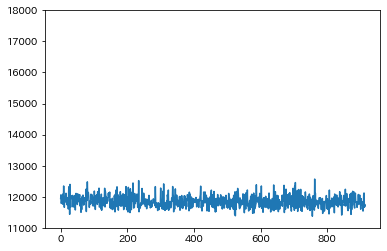

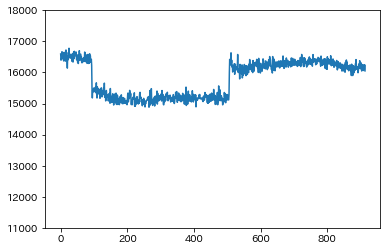

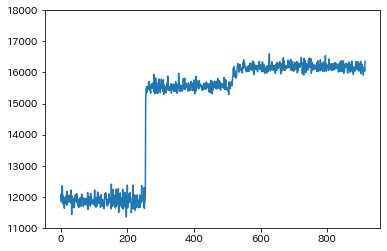

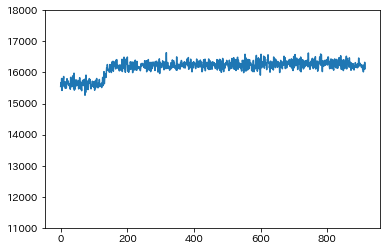

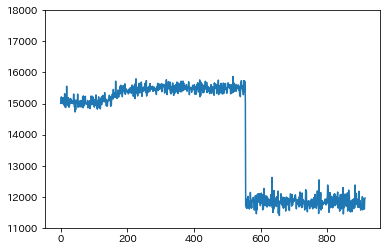

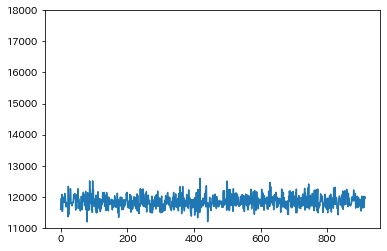

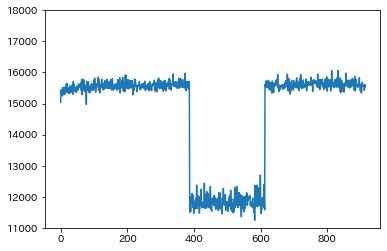

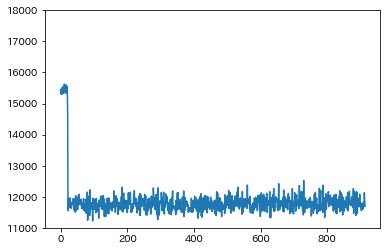

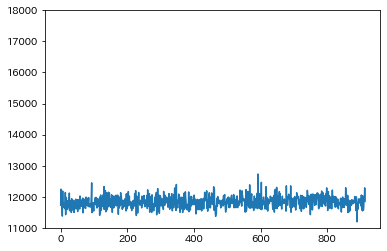

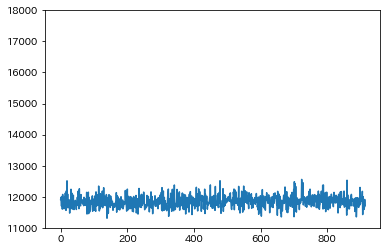

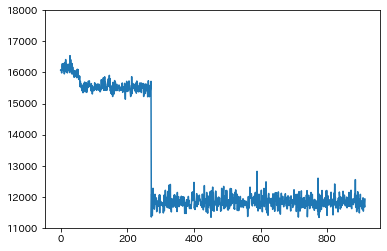

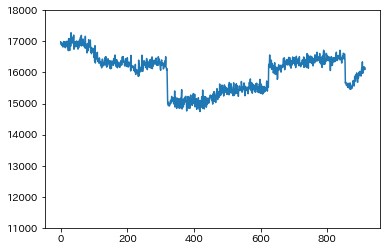

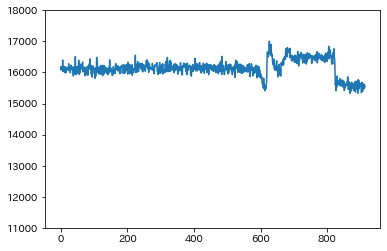

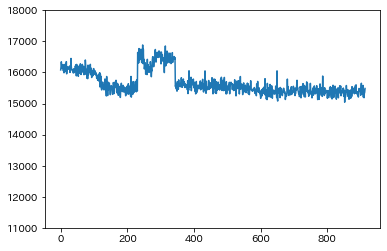

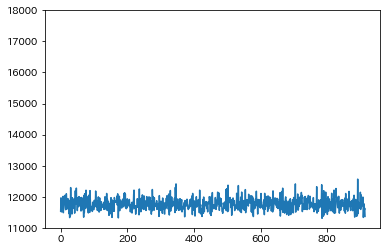

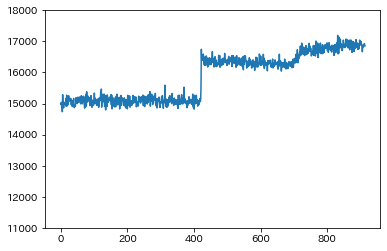

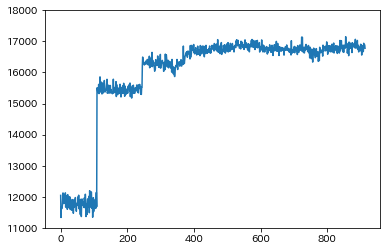

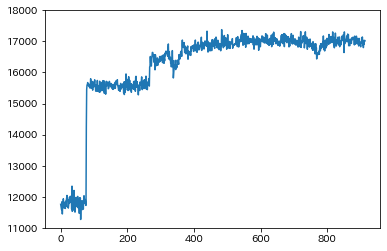

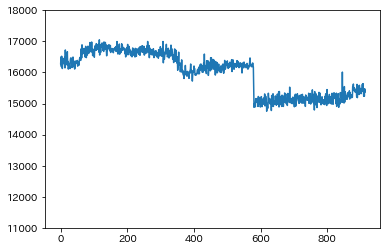

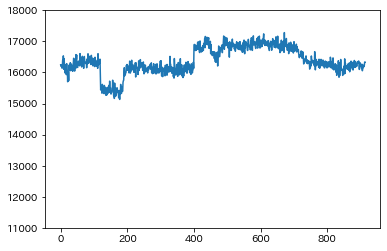

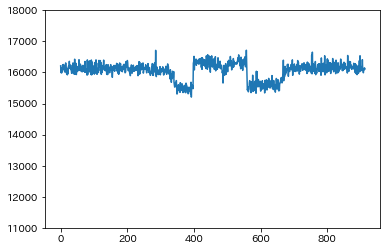

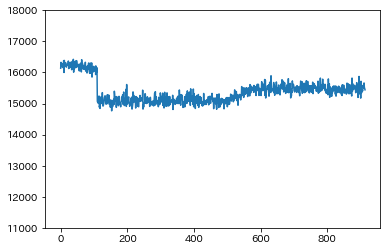

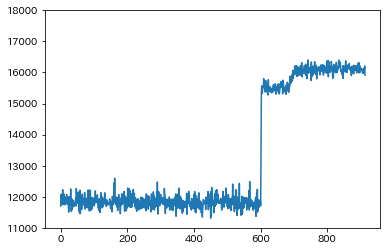

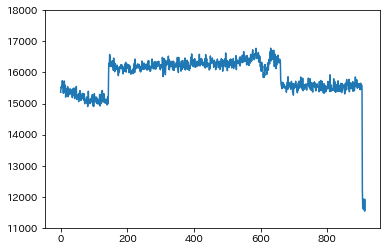

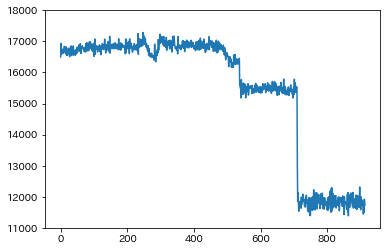

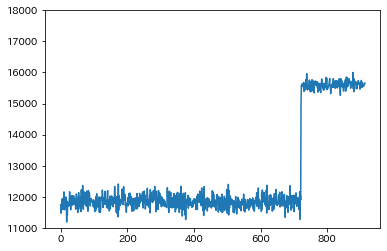

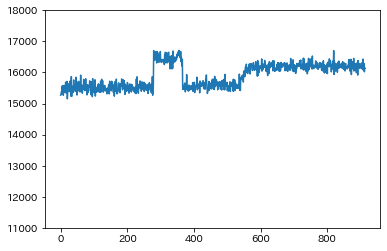

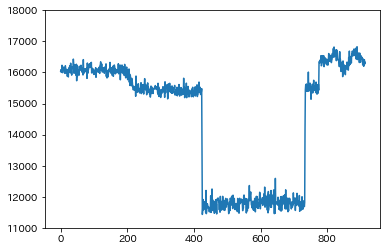

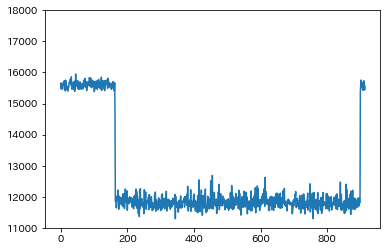

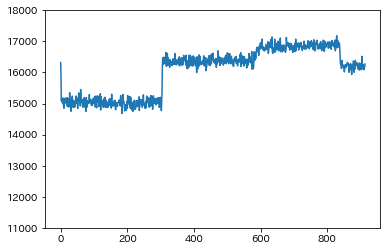

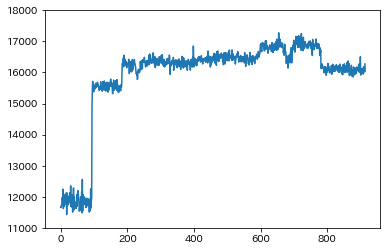

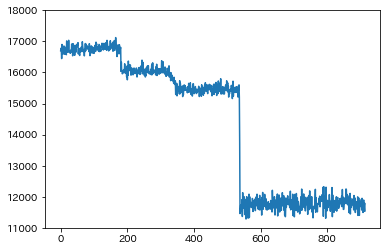

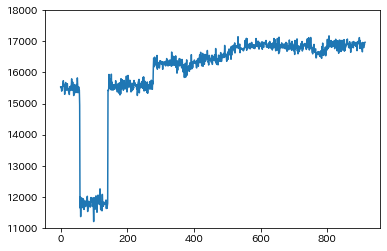

In [27]:
for num in tqdm(range(1,170)):
    fig = plt.figure()
    dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.npy")
    
    ax = fig.add_subplot(ylim=(11000,18000))

    plt.plot(dd)
    fig.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\推移\{num}.png")

In [7]:
import os

In [9]:
for i in tqdm(range(1,170)):
    old_name = rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{i}.png"
    new_name = rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\重ね\{i}.png"
    os.rename(old_name, new_name)

100%|██████████| 169/169 [00:02<00:00, 79.25it/s]


In [28]:
dd

array([15530.01744673, 15510.09415286, 15538.0296073 , 15399.06551878,
       15474.86094303, 15437.85278636, 15565.17872517, 15639.81806756,
       15736.88172909, 15573.57118052, 15621.91026577, 15595.61938764,
       15296.33945547, 15470.42130368, 15441.64322289, 15677.79437706,
       15455.69265034, 15428.53316381, 15433.6281651 , 15526.44992244,
       15638.53393053, 15474.12159618, 15435.50622308, 15466.13181881,
       15377.31320452, 15408.85559738, 15290.99046453, 15534.78026766,
       15417.39013823, 15544.05674646, 15547.21591018, 15577.57315286,
       15588.30361819, 15795.10693757, 15424.18494576, 15528.60678567,
       15693.28707547, 15567.51358363, 15496.89359196, 15258.38594095,
       15279.74738765, 15474.77704494, 15612.43022301, 15415.40453928,
       15372.6631901 , 15351.18407221, 15438.10894322, 15372.86501037,
       15613.55093479, 15365.57430689, 15825.33545914, 15566.70424978,
       15349.37245058, 15389.28529048, 15538.41985663, 15444.07147287,
      

In [76]:
dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\1.npy")



for num in tqdm(range(2,170)):
    dd2 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.npy")
    dd = np.concatenate([dd, dd2])

100%|██████████| 168/168 [00:00<00:00, 207.24it/s]


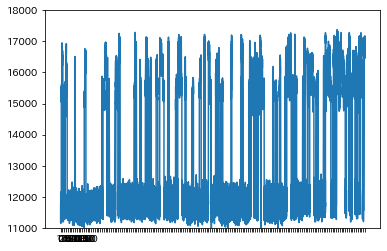

In [79]:
fig = plt.figure()
ax = fig.add_subplot(ylim=(11000,18000))
ax.set_xticks(np.arange(0, 170*914, 914))
ax.set_xticklabels(np.arange(0,170,10))
plt.plot(dd)

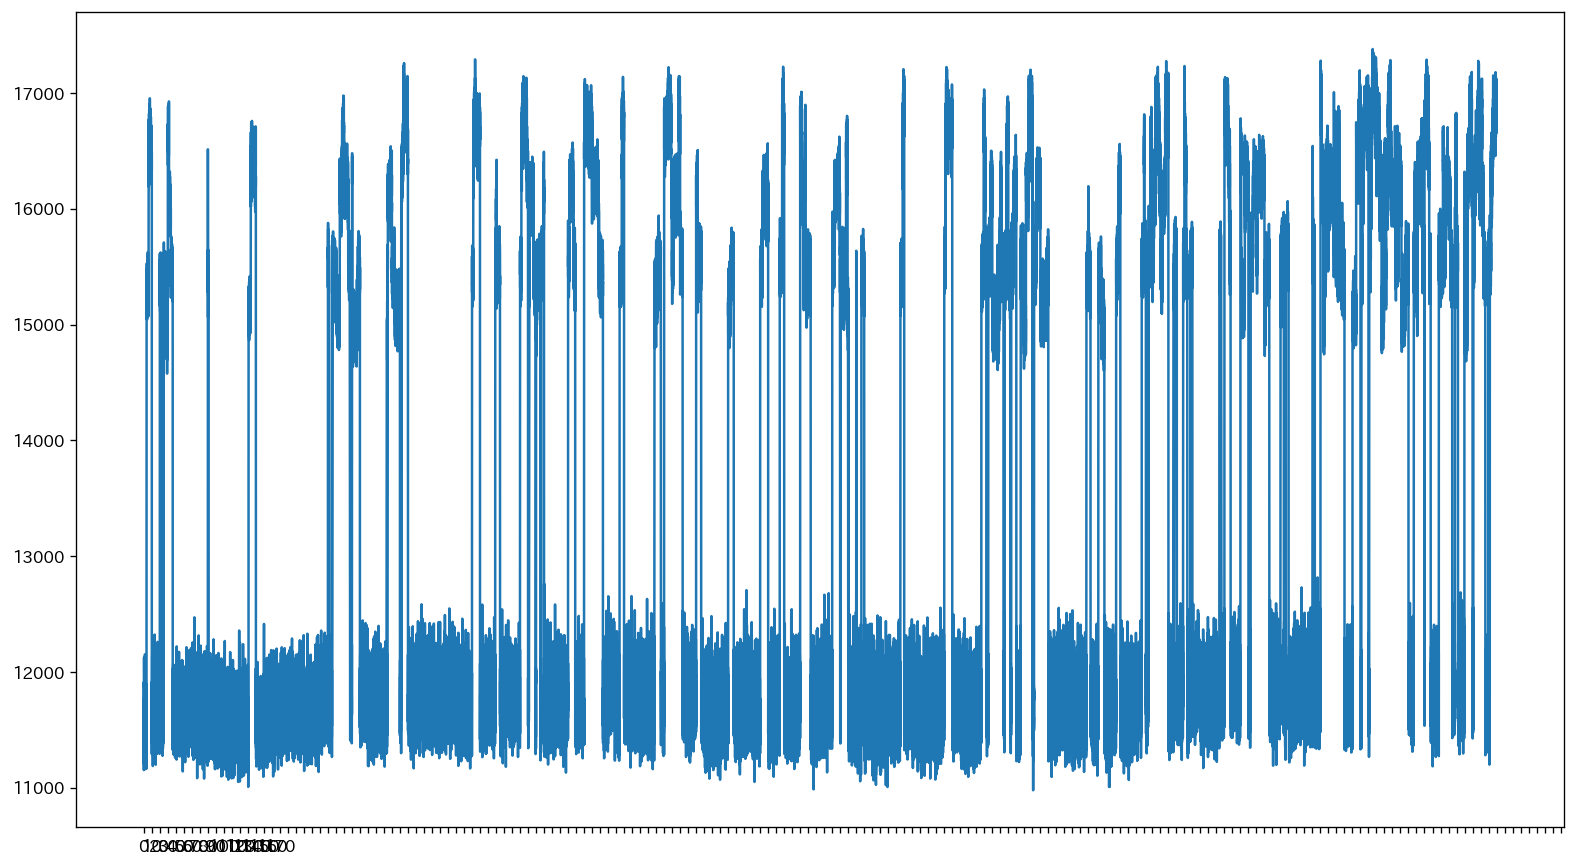

In [96]:
fig = plt.figure(figsize=(16, 9),dpi=120)
ax = fig.add_subplot()
ax.set_xticks(np.arange(0, 180*914, 914))
ax.set_xticklabels(np.arange(0,180,10))
plt.plot(dd)

In [89]:
np.arange(0,170,10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160])

In [98]:
dd.shape

(154466,)

In [99]:
dd3 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\1.npy")



for num in tqdm(range(2,5)):
    dd2 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\{num}.npy")
    dd3 = np.concatenate([dd3, dd2], axis=0)

100%|██████████| 3/3 [00:00<00:00, 157.85it/s]


In [109]:
dd4 = dd3.reshape(int(len(dd3)/914),914)

In [110]:
dd4.shape

(4, 914)

In [111]:
dd4

array([[11762.75801696, 11313.97875511, 11681.53230081, ...,
        16495.45027967, 16338.3271824 , 16356.25555123],
       [11291.72728099, 11871.79242057, 11773.42486445, ...,
        11589.72314783, 11842.38987452, 11862.59744997],
       [15330.10813923, 15418.15125946, 15125.08721498, ...,
        14924.34600197, 14955.76001429, 14914.94652917],
       [16639.2574499 , 16515.12764003, 16594.80384388, ...,
        11747.08114136, 11364.31482103, 11503.11751182]])

In [113]:
len(dd4[0])

914

In [116]:
dd5 = dd.reshape(int(len(dd)/914),914)

In [117]:
dd5.shape

(169, 914)

In [118]:
np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\All", dd5)

In [70]:
d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\All.npy")
# d = d.T

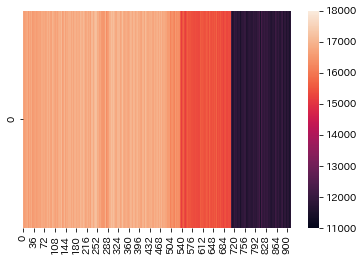

In [67]:
d1 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\real\161.npy")
d1 = d1.reshape(1,914)
sns.heatmap(d1, vmin=11000, vmax=18000)

## 頭揃えるver

In [77]:
def fft_integrated_one_rotation_fig(start,end,num,j):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][start:end]
    
    dt = 1/10**6
    split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
    overlap = 0.5  # オーバーラップ率
    window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman
    y_label = "amplitude"
    y_unit = "V"
    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    
    
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)

    output_FN = fr"Z:\200 Produced_data\20221027\FFTonePath_Focus\fig\FFT_{num}_{x}"
    plot_FFT(fq_, amp_, output_FN, y_label, y_unit,num)
    
    return 20*np.log10(amp_) +85

In [78]:
# 1 -> 階段あがる
# 4 -> 会談下がる
# 5 -> 床
# 78 -> 天井
# 164 ->罠
# 169 ->ラスト
a_list = [1,4,5,78,164,169]

## 各pathごとの面積のnpy生成

In [85]:
for i in range(1,170):
    mensekis = []
    for j in tqdm(range(0,591)):
        num = i
        sample_num = 2**14
        start = j * 25000
        end = start + sample_num
        fft_result = fft_integrated_one_rotation_do_not_to_csv(start,end,num,j)
        menseki = time_hist_integrator_rect(1,fft_result)
        mensekis.append(menseki)
    d = np.array(mensekis)
    np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}", d)

100%|██████████| 591/591 [03:00<00:00,  3.27it/s]


100%|██████████| 591/591 [02:51<00:00,  3.45it/s]


## 各pathごとの面積の推移

 12%|█▏        | 20/169 [00:02<00:26,  5.57it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 12%|█▏        | 21/169 [00:02<00:25,  5.92it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 13%|█▎        | 22/169 [00:03<00:30,  4.81it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 25%|██▍       | 42/169 [00:07<00:25,  4.97it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 25%|██▌       | 43/169 [00:07<00:25,  4.97it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 26%|██▌       | 44/169 [00:07<00:26,  4.78it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 38%|███▊      | 64/169 [00:11<00:19,  5.29it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 38%|███▊      | 65/169 [00:11<00:18,  5.63it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 39%|███▉      | 66/169 [00:11<00:17,  5.83it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 51%|█████     | 86/169 [00:14<00:14,  5.57it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 51%|█████▏    | 87/169 [00:15<00:14,  5.79it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 52%|█████▏    | 88/169 [00:15<00:19,  4.16it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and m

 64%|██████▍   | 108/169 [00:18<00:09,  6.57it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 64%|██████▍   | 109/169 [00:19<00:10,  5.62it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 65%|██████▌   | 110/169 [00:19<00:10,  5.81it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

 77%|███████▋  | 130/169 [00:22<00:05,  7.50it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 78%|███████▊  | 131/169 [00:22<00:04,  7.89it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 78%|███████▊  | 132/169 [00:22<00:04,  8.26it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed an

<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 91%|█████████ | 154/169 [00:25<00:01,  9.52it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
 92%|█████████▏| 155/169 [00:25<00:01,  9.53it/s]<ipython-input-86-6f5c71f20b77>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

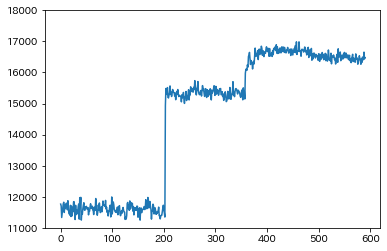

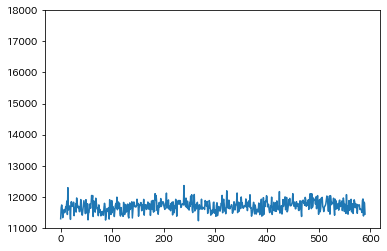

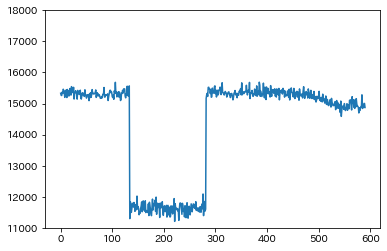

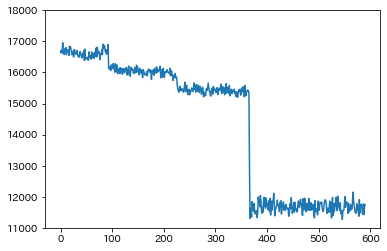

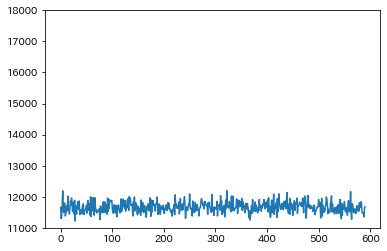

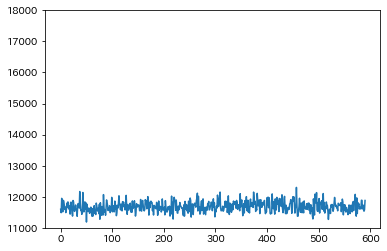

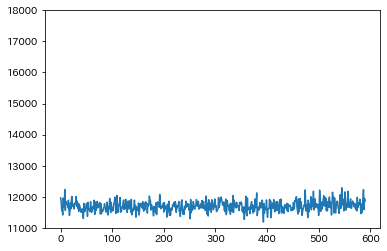

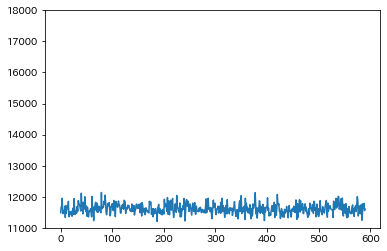

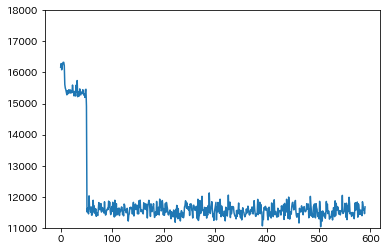

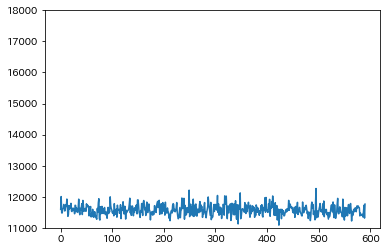

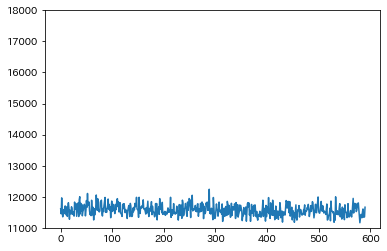

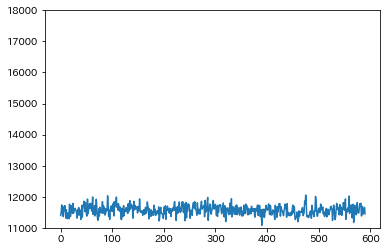

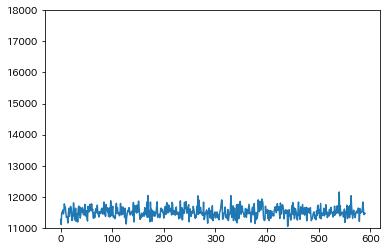

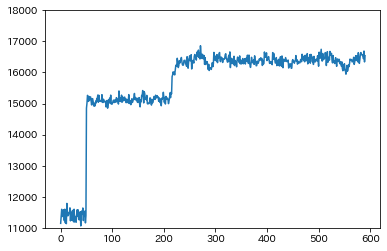

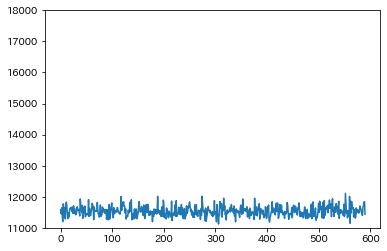

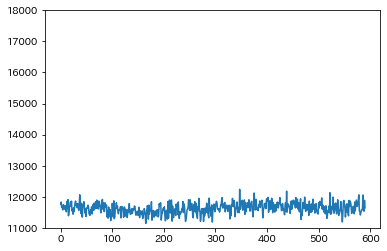

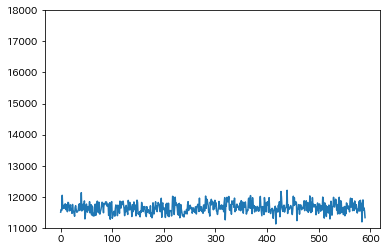

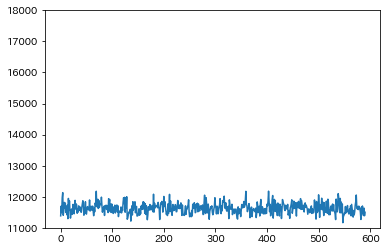

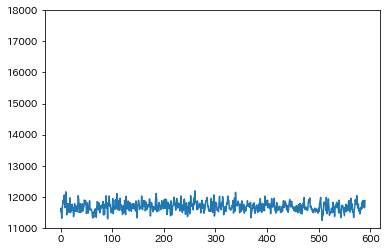

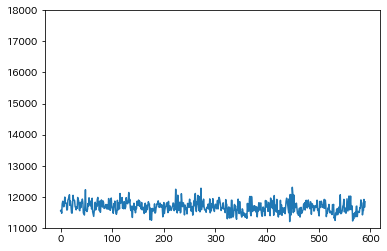

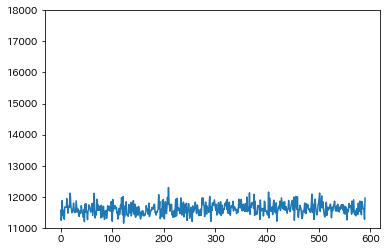

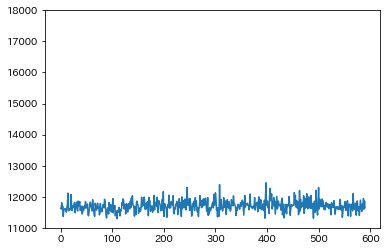

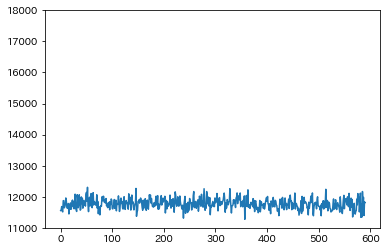

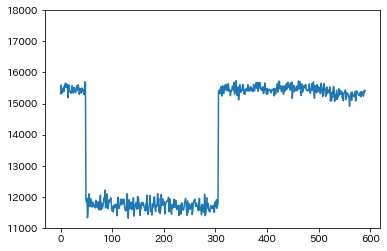

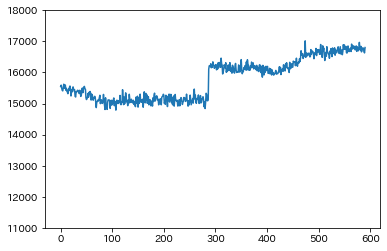

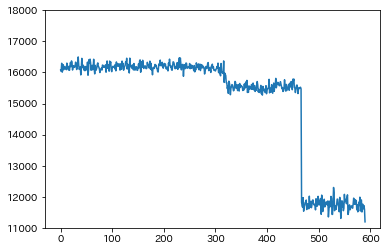

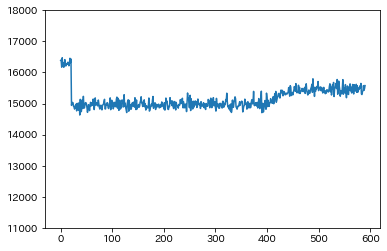

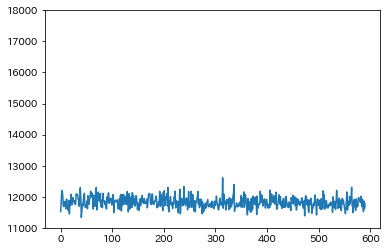

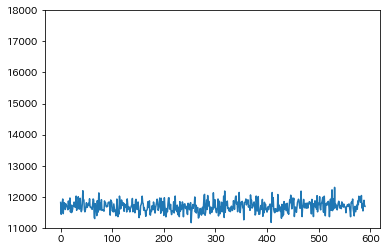

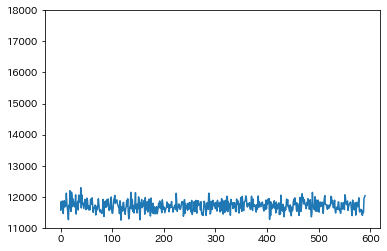

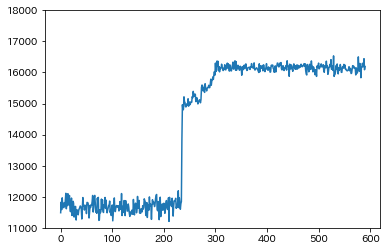

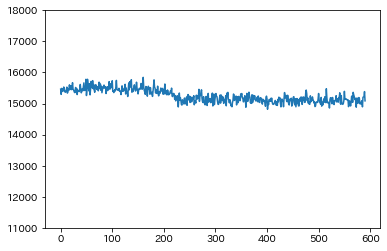

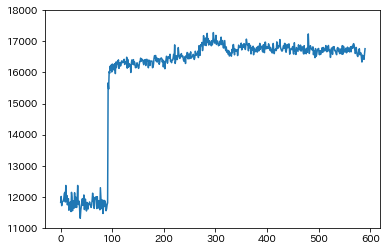

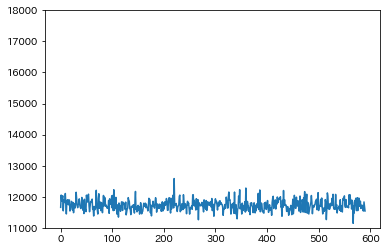

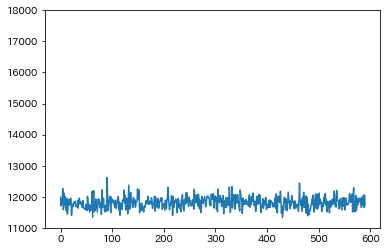

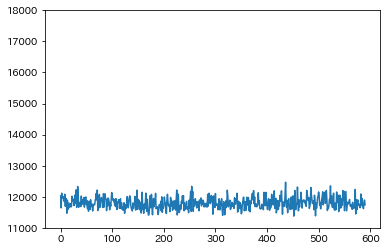

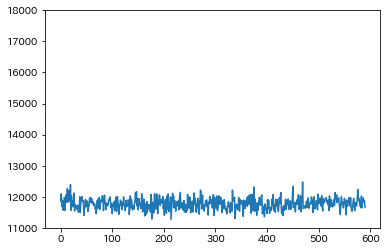

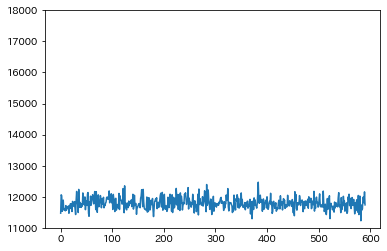

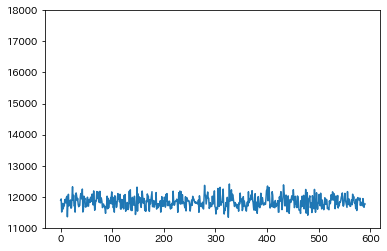

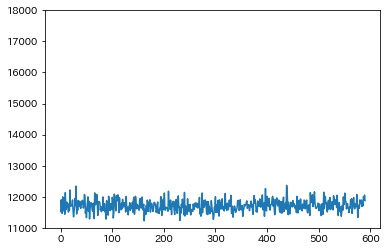

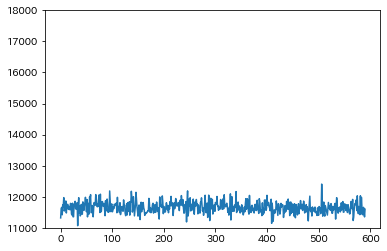

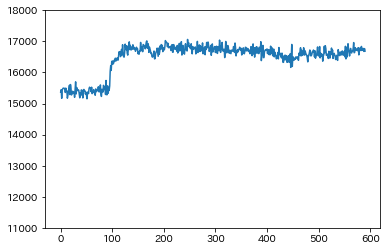

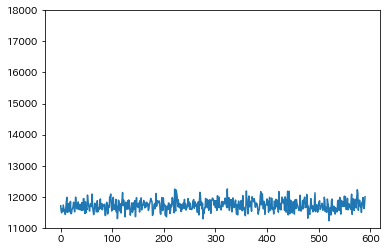

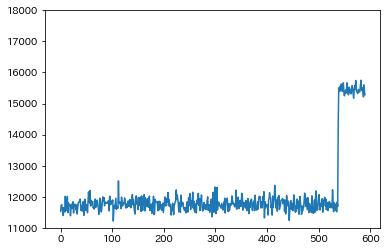

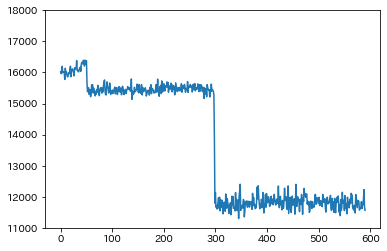

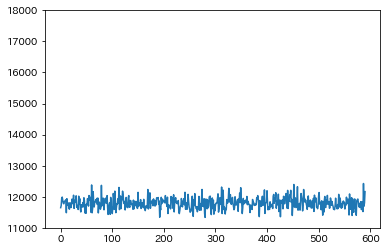

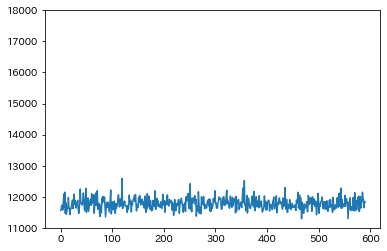

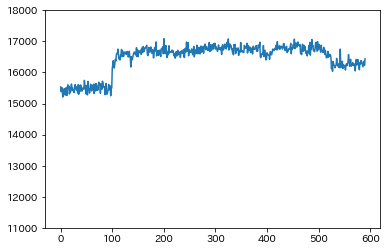

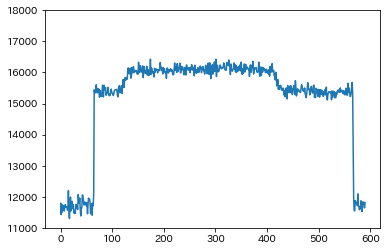

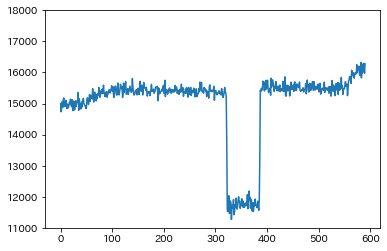

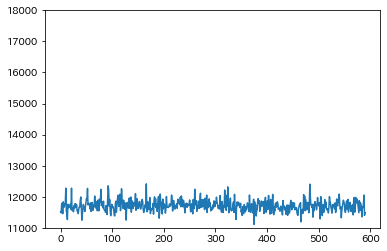

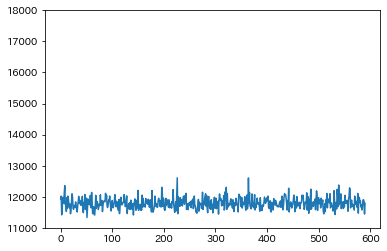

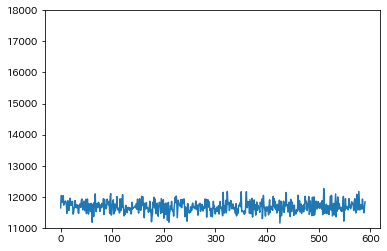

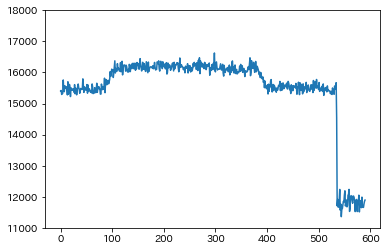

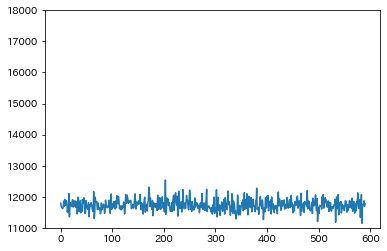

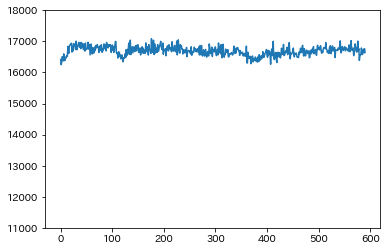

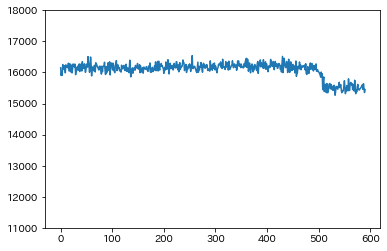

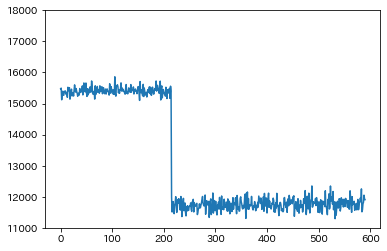

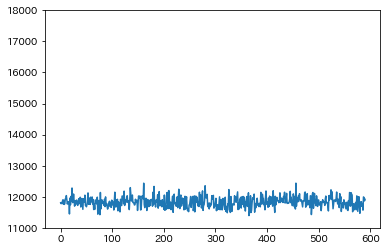

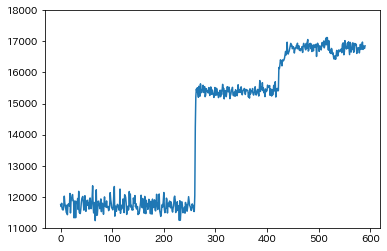

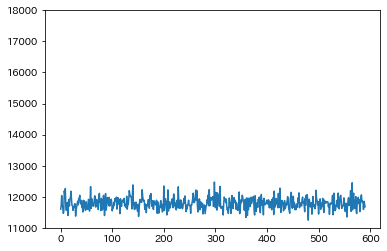

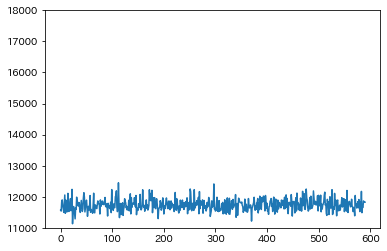

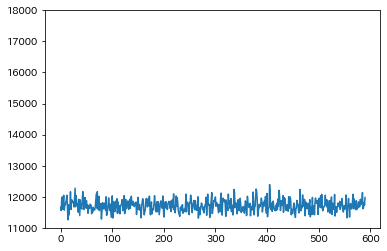

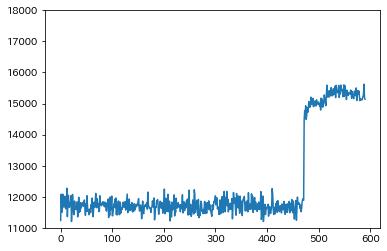

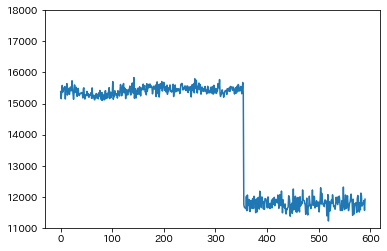

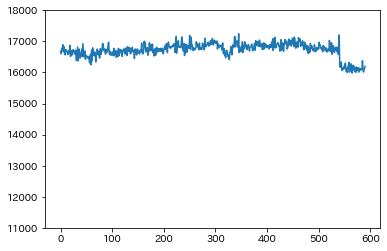

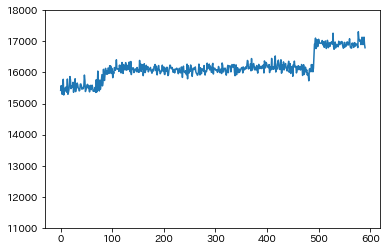

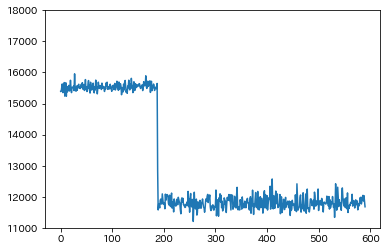

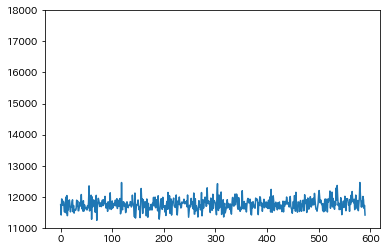

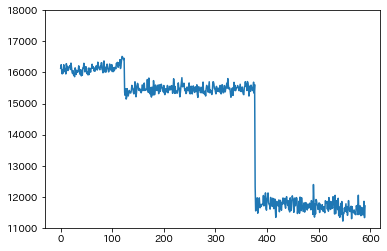

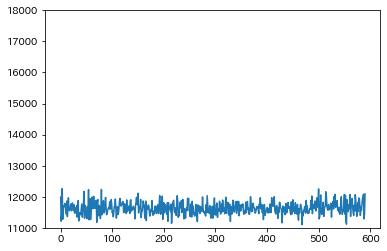

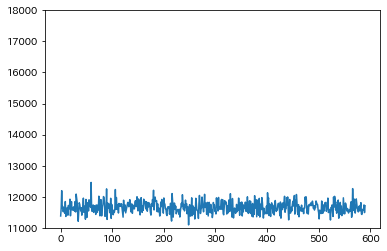

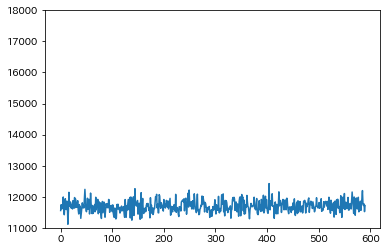

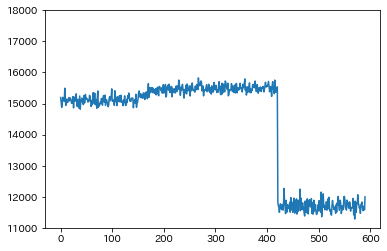

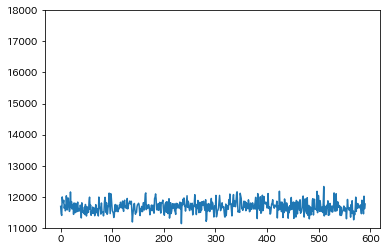

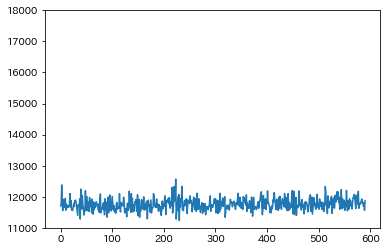

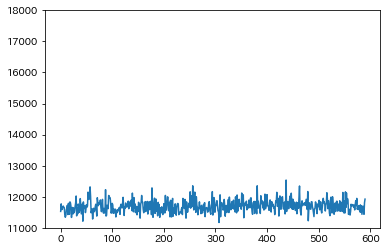

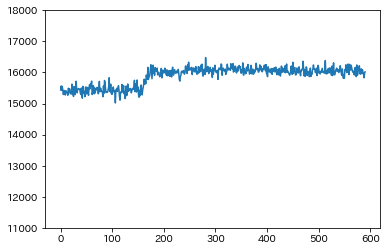

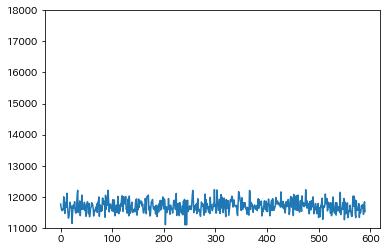

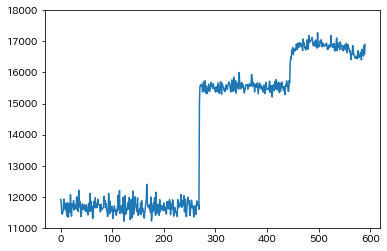

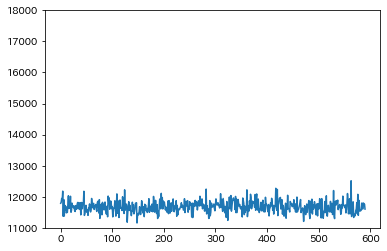

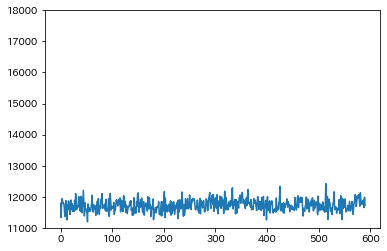

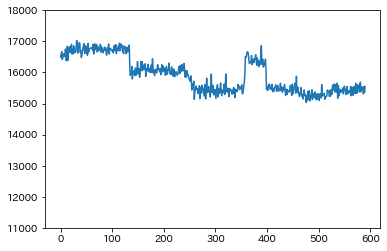

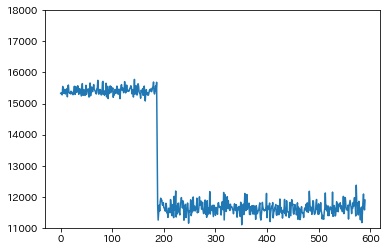

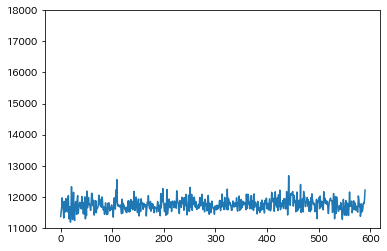

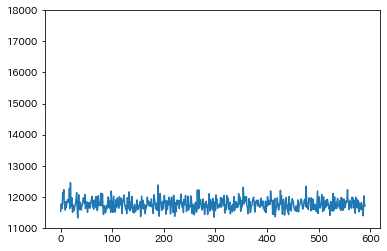

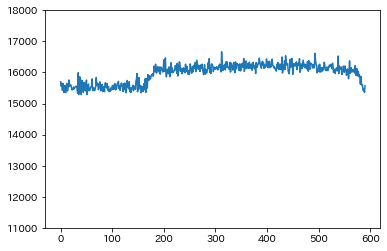

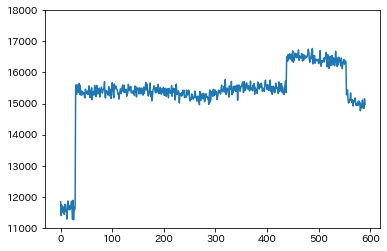

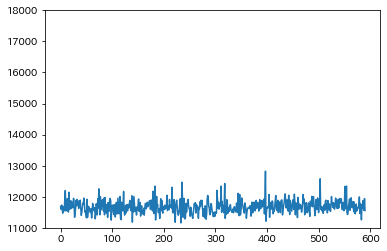

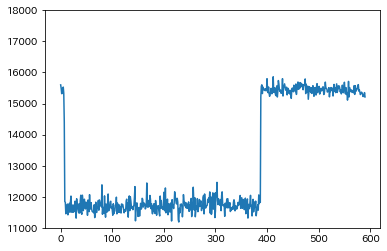

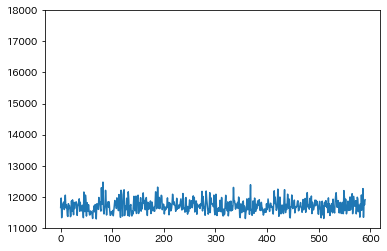

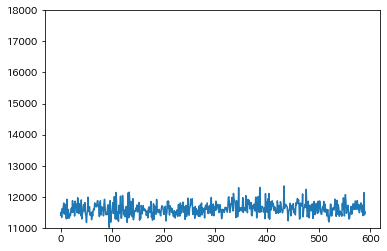

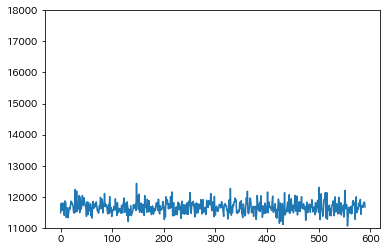

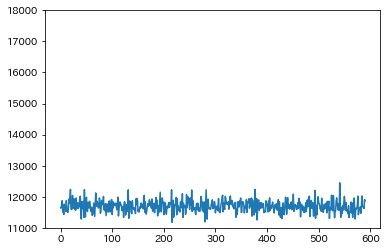

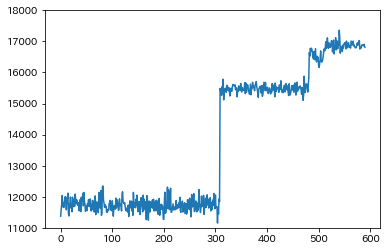

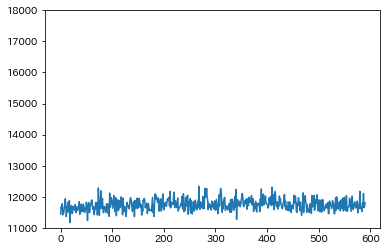

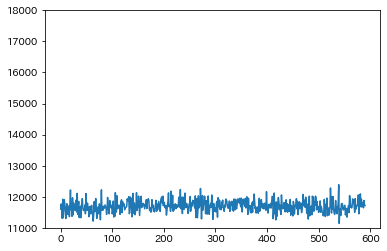

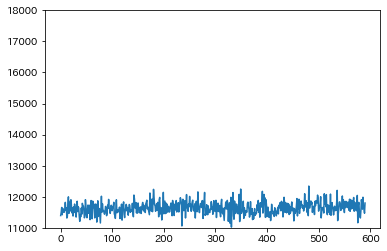

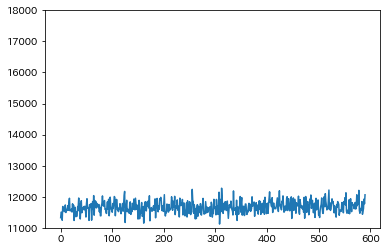

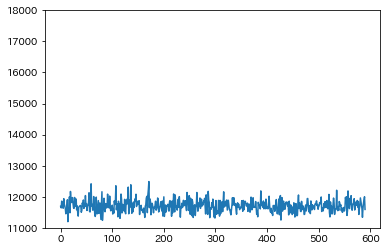

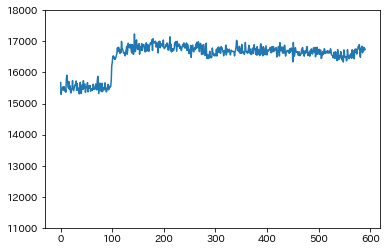

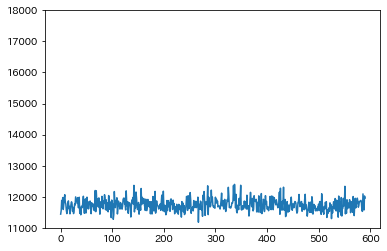

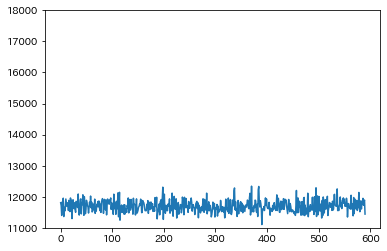

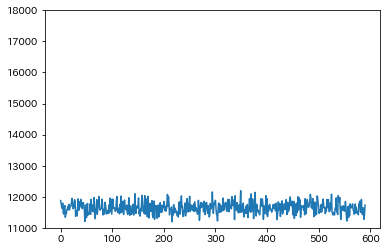

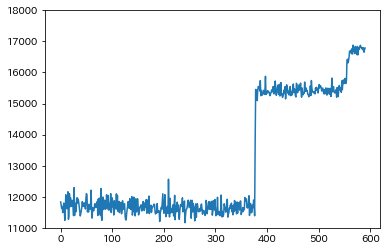

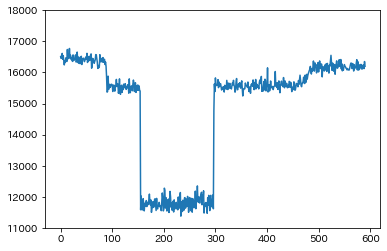

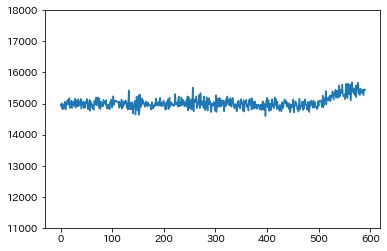

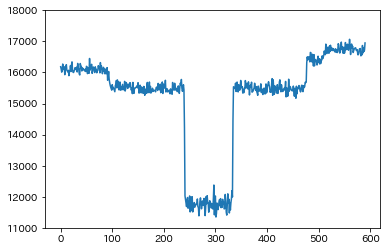

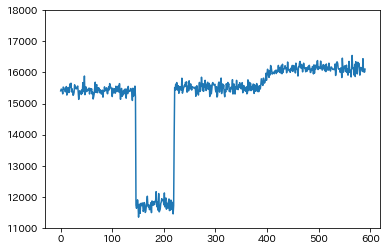

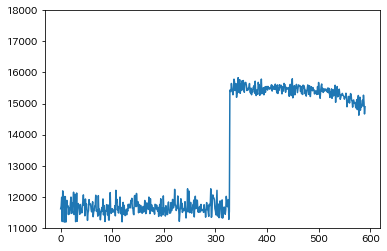

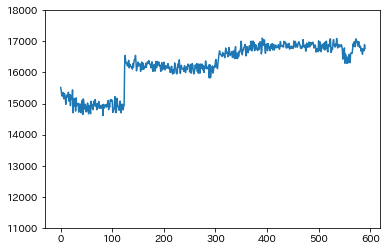

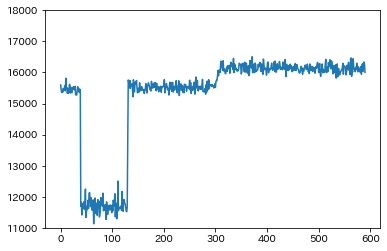

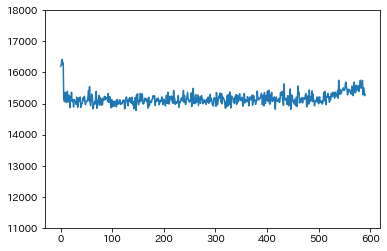

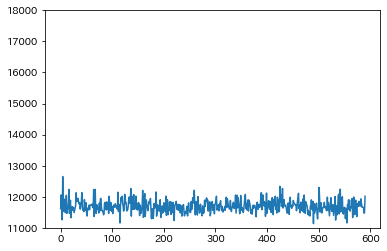

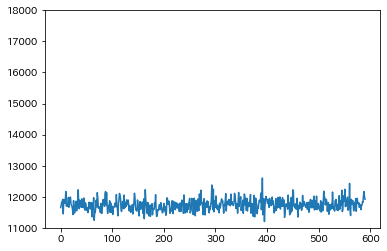

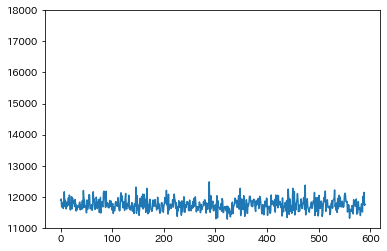

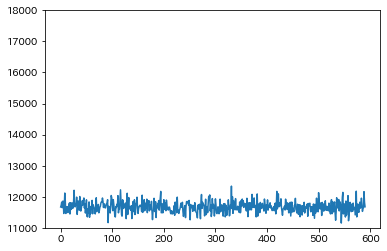

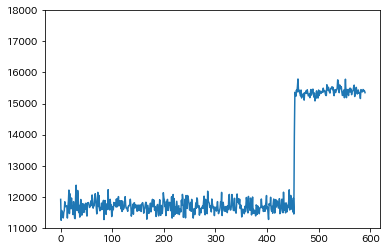

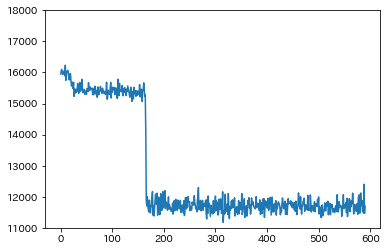

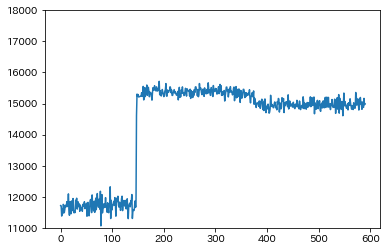

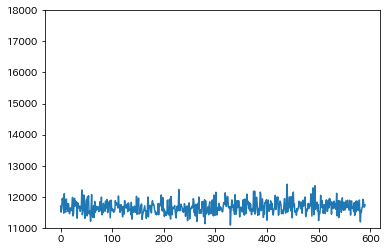

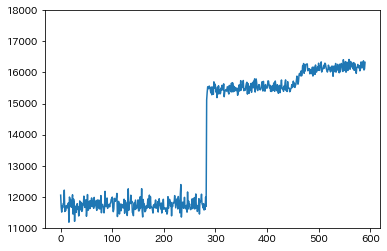

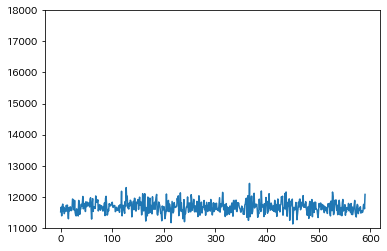

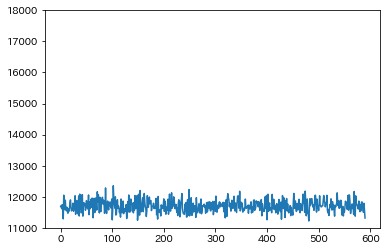

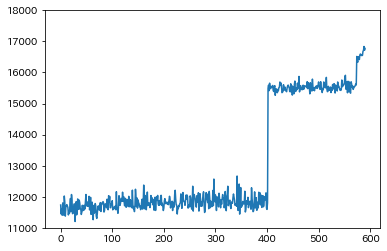

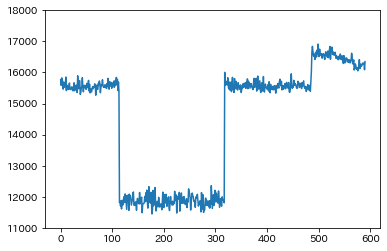

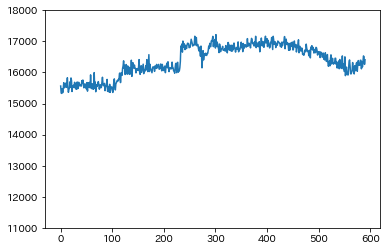

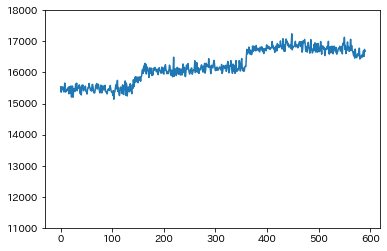

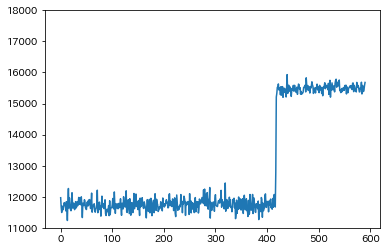

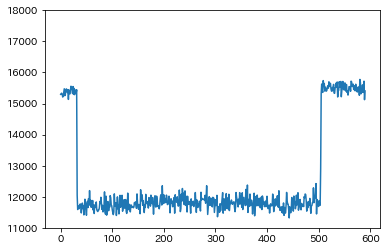

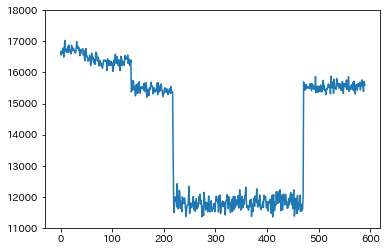

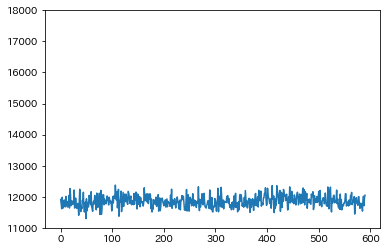

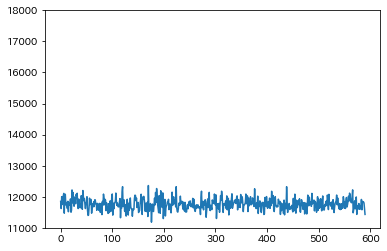

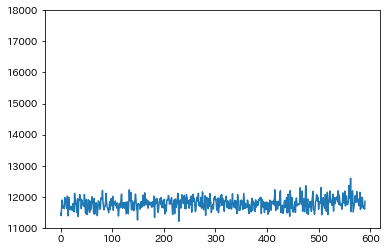

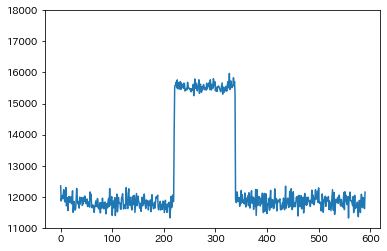

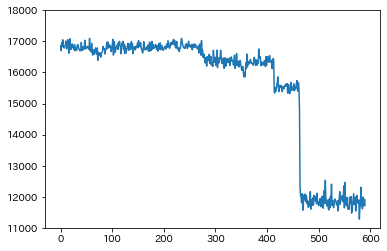

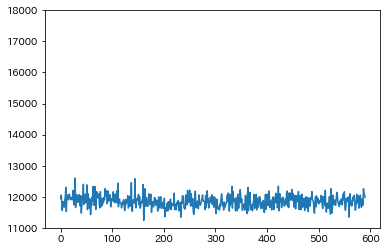

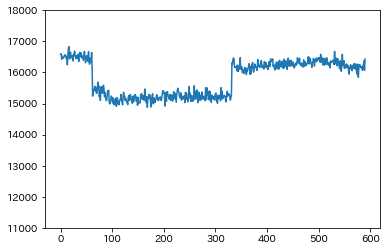

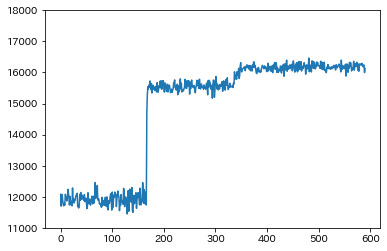

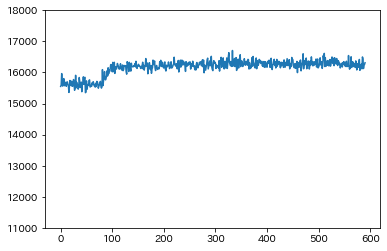

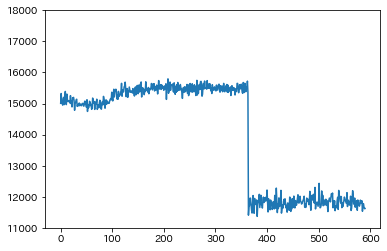

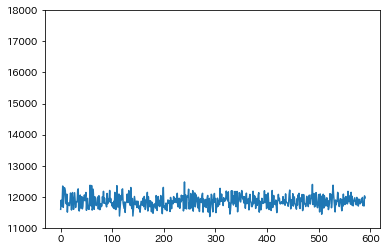

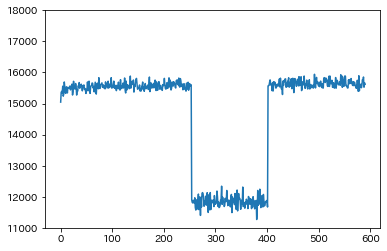

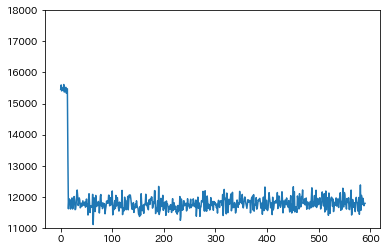

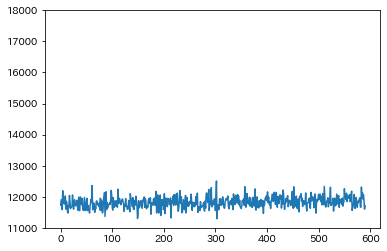

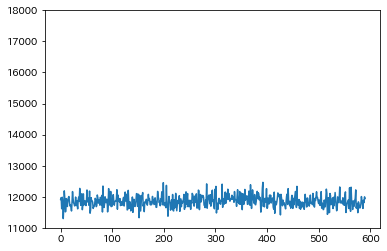

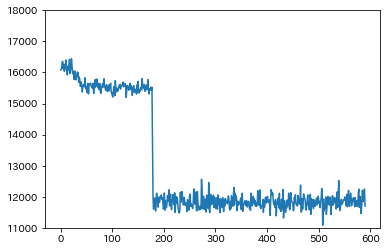

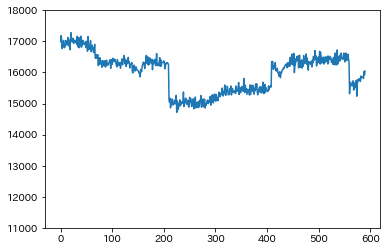

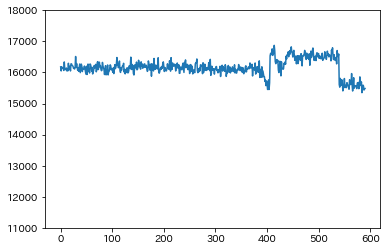

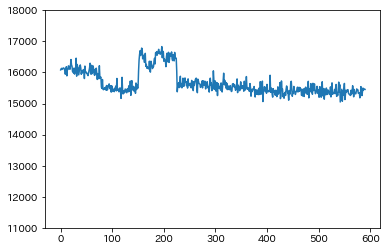

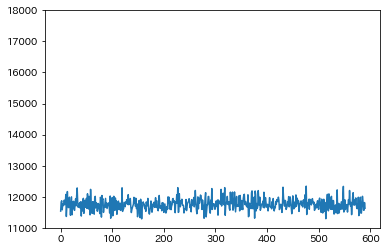

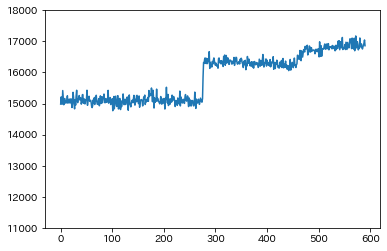

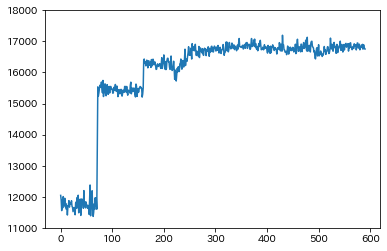

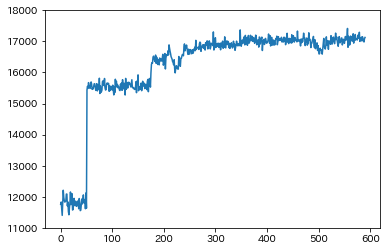

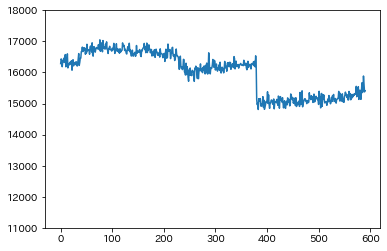

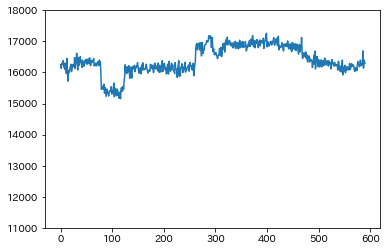

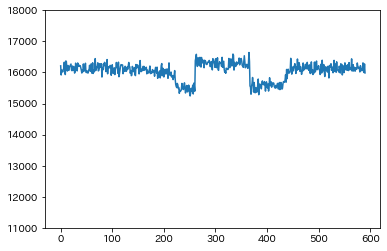

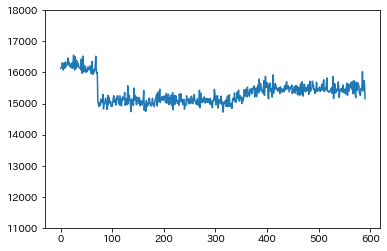

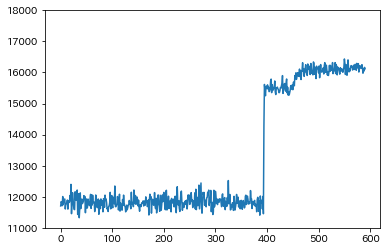

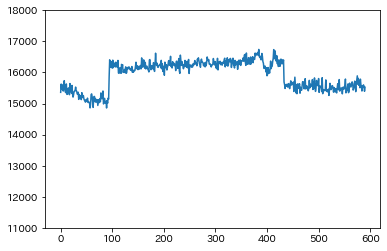

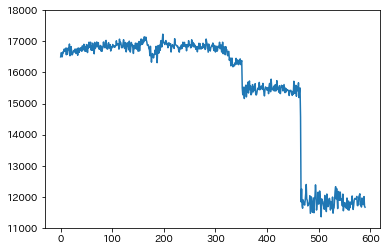

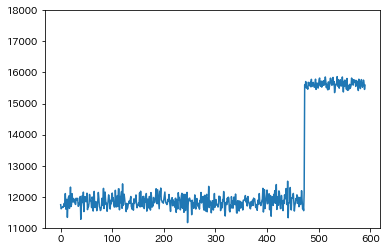

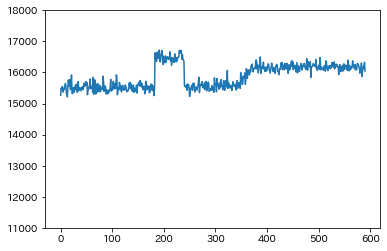

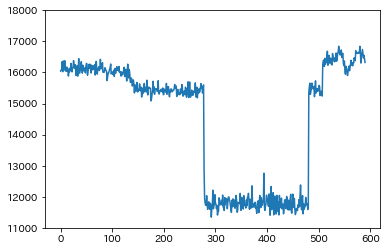

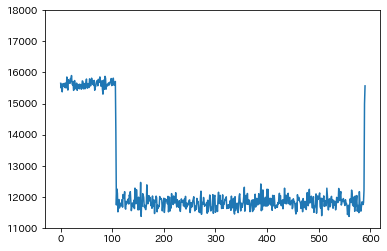

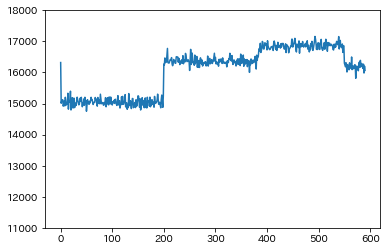

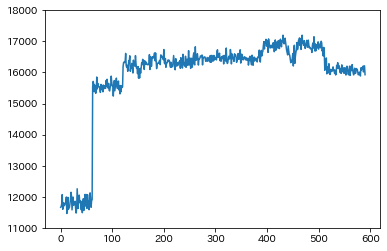

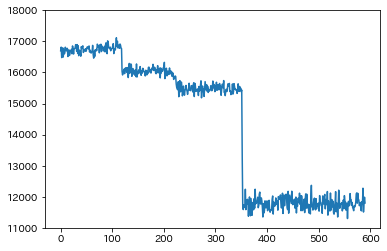

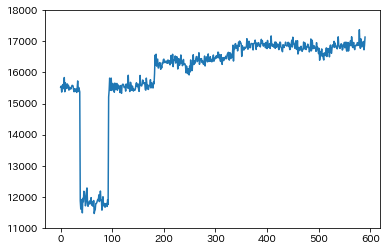

In [86]:
for num in tqdm(range(1,170)):
    fig = plt.figure()
    dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.npy")
    
    ax = fig.add_subplot(ylim=(11000,18000))

    plt.plot(dd)
    fig.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\推移\{num}.png")

## 各pathごとの面積histogram生成

 12%|█▏        | 20/169 [00:07<00:55,  2.67it/s]<ipython-input-88-f34230bc40c2>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure, ax = plt.subplots()
100%|██████████| 169/169 [01:02<00:00,  2.70it/s]


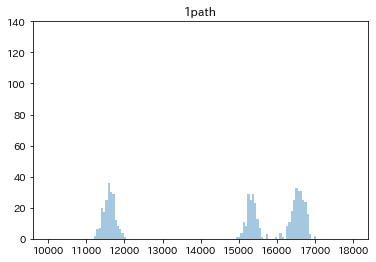

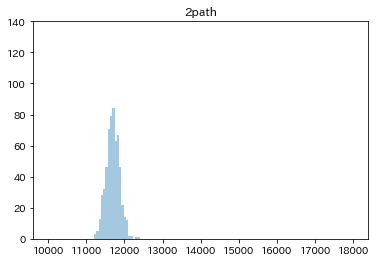

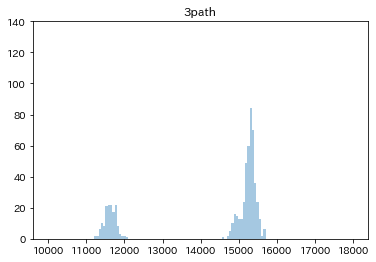

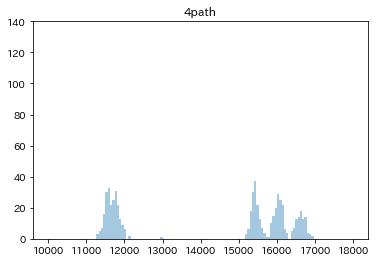

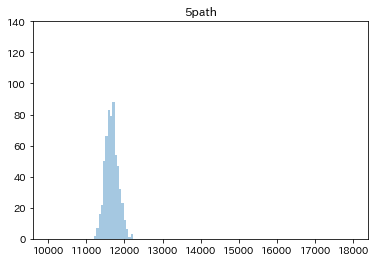

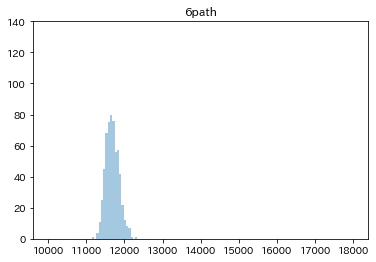

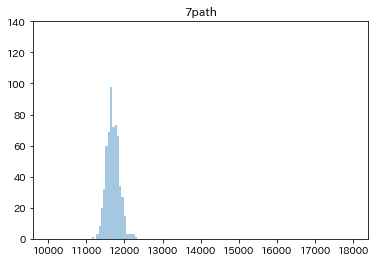

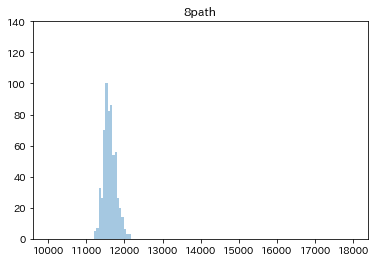

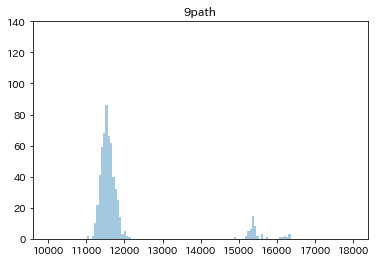

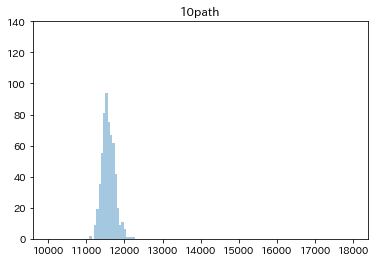

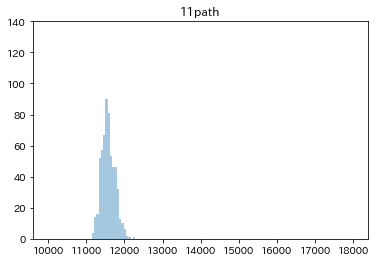

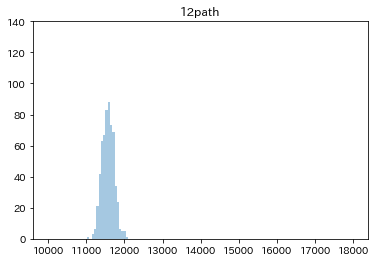

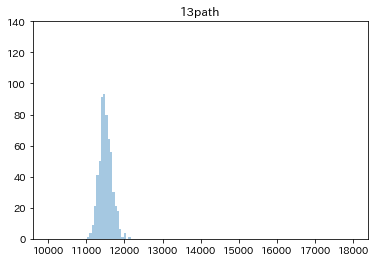

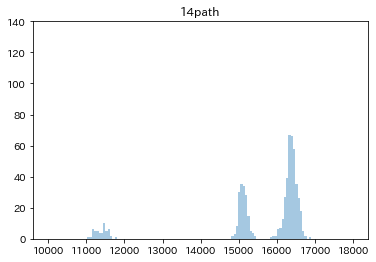

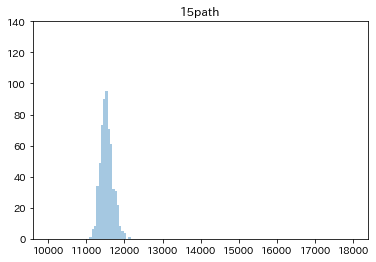

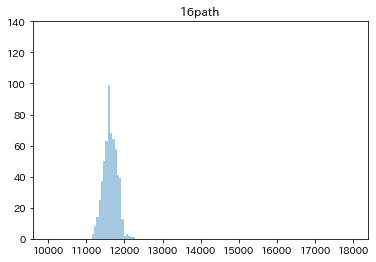

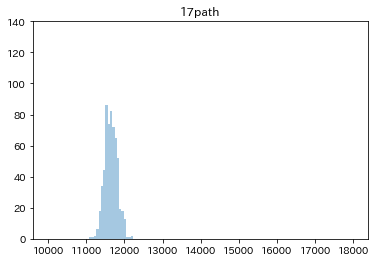

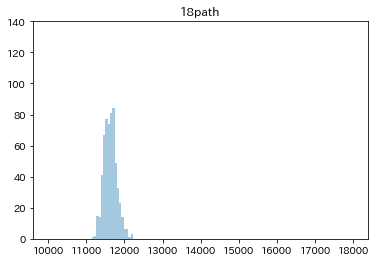

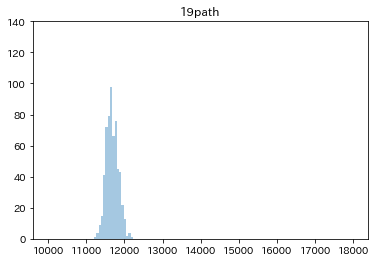

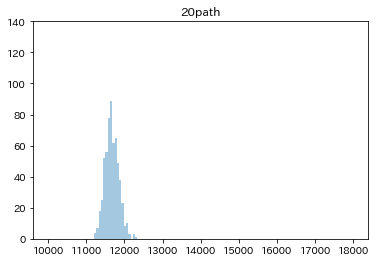

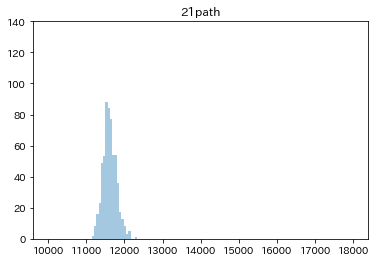

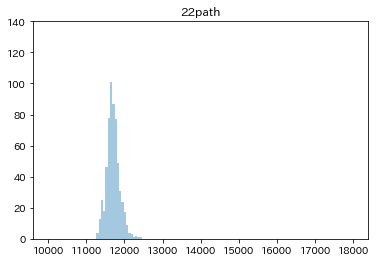

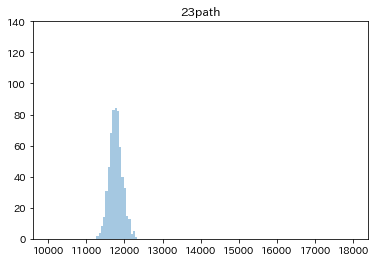

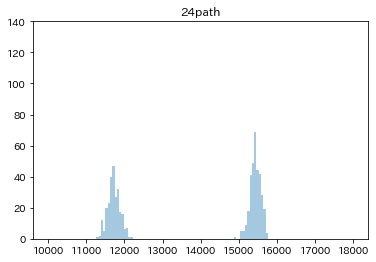

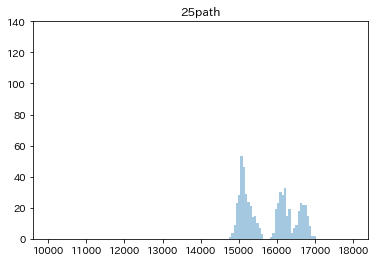

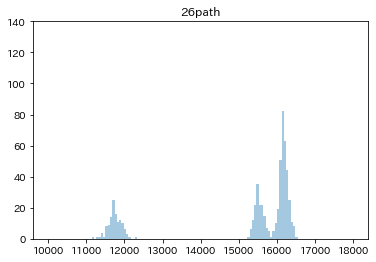

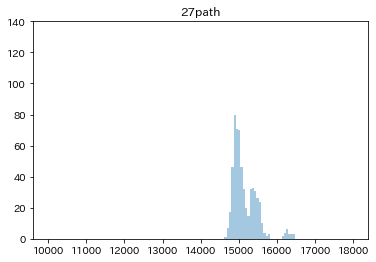

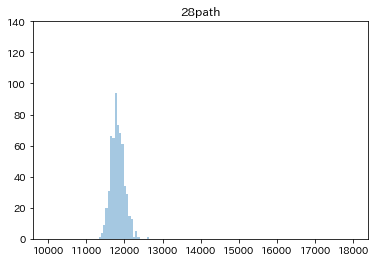

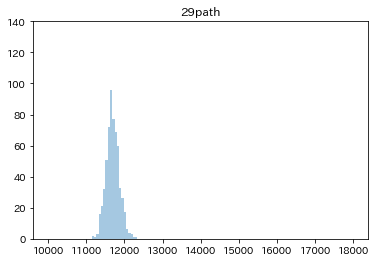

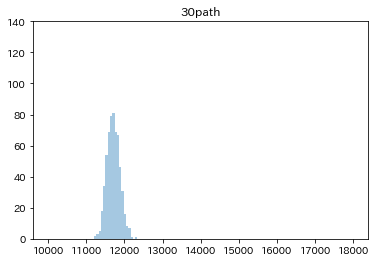

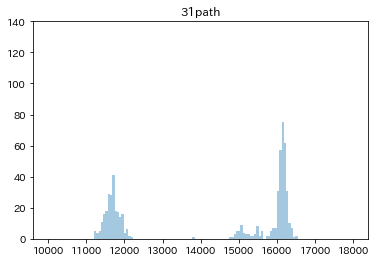

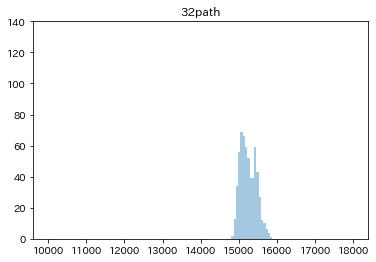

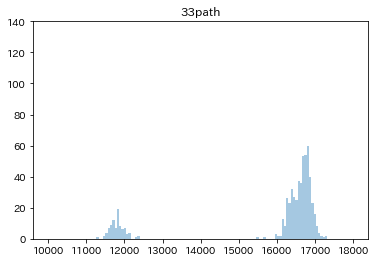

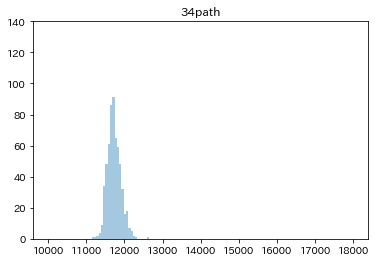

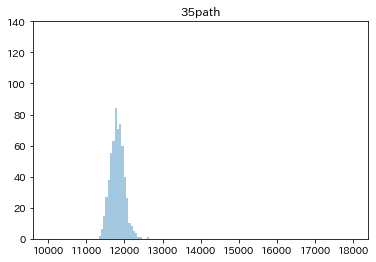

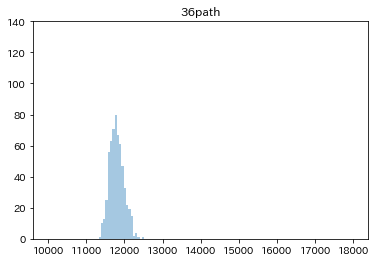

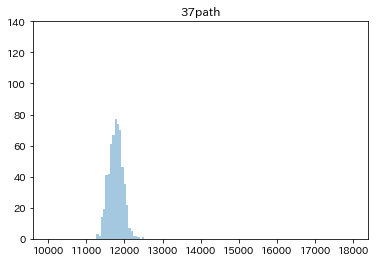

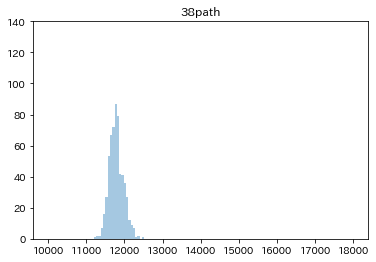

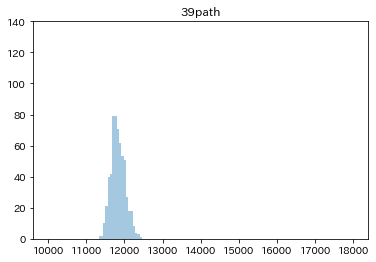

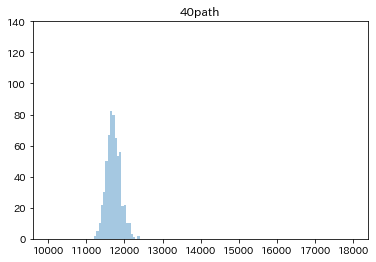

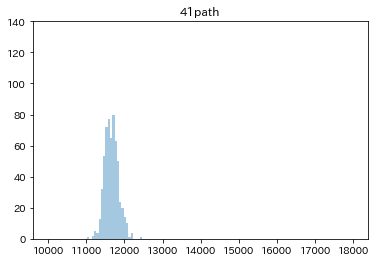

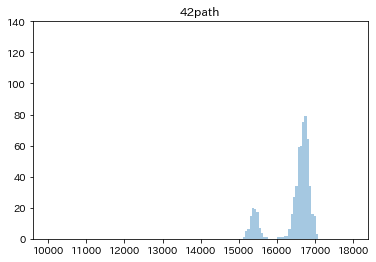

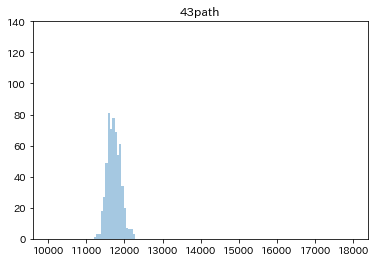

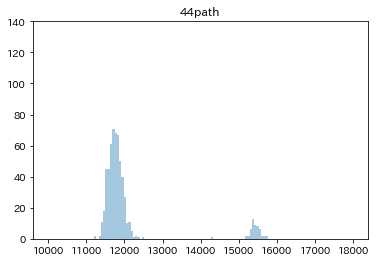

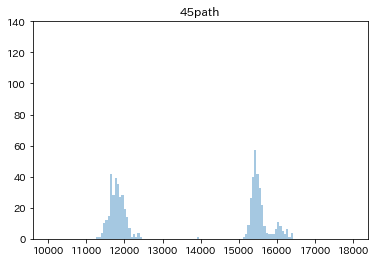

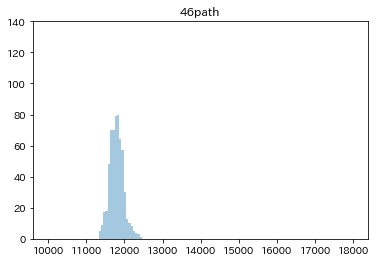

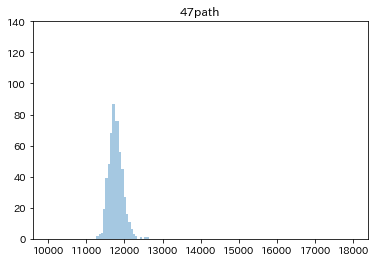

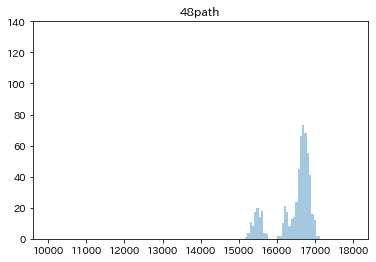

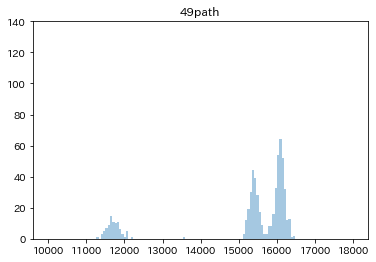

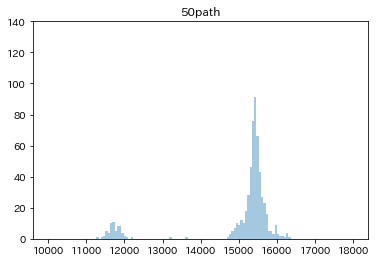

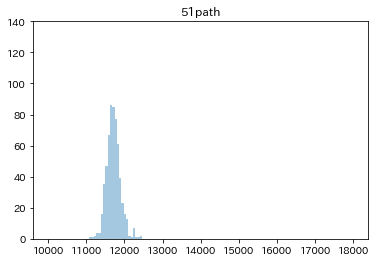

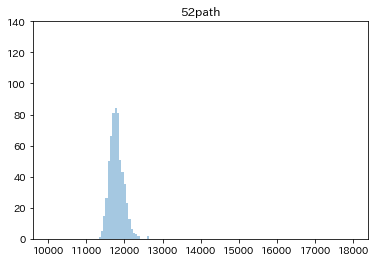

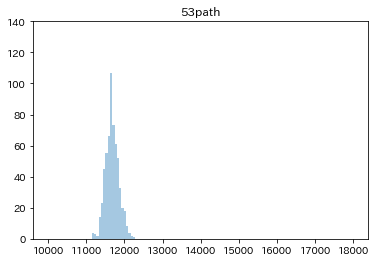

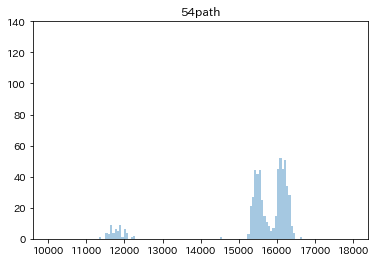

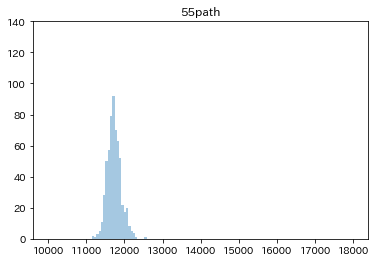

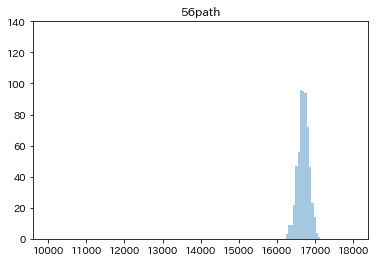

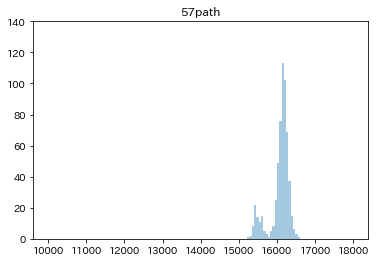

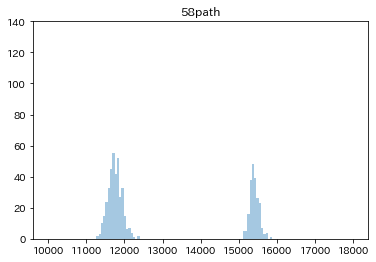

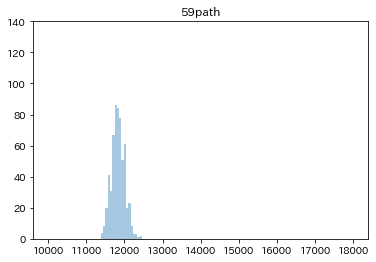

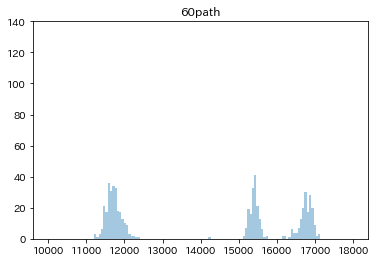

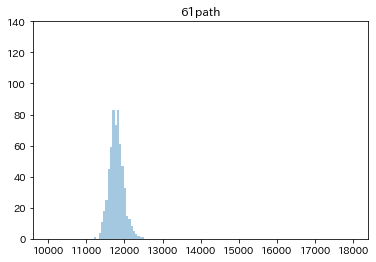

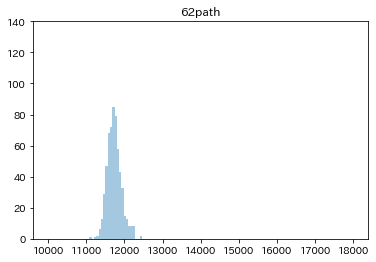

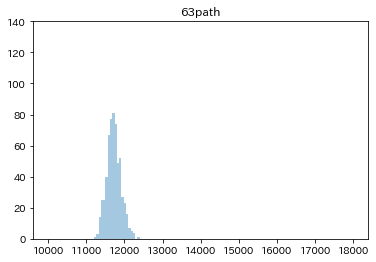

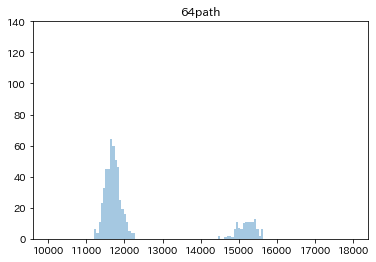

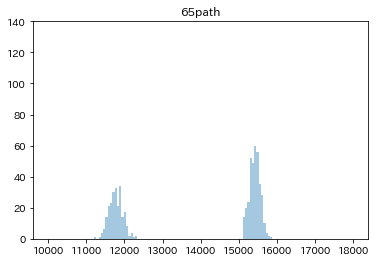

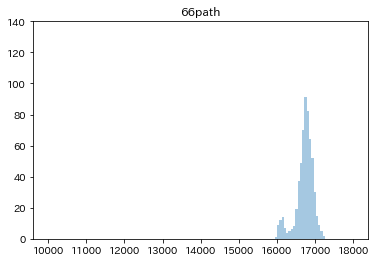

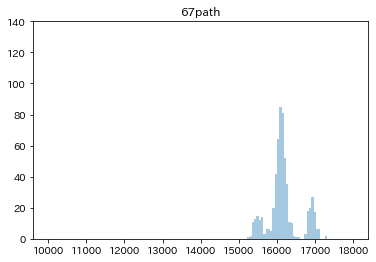

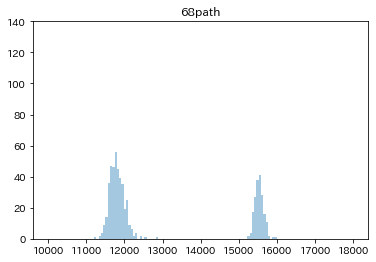

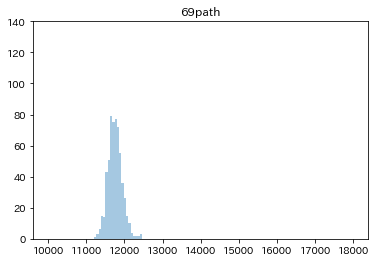

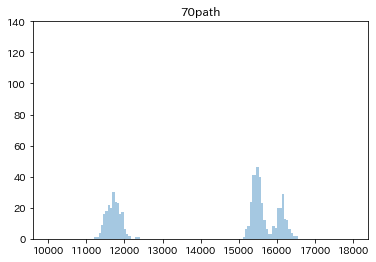

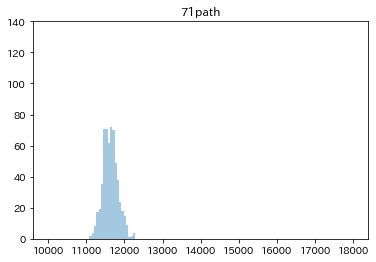

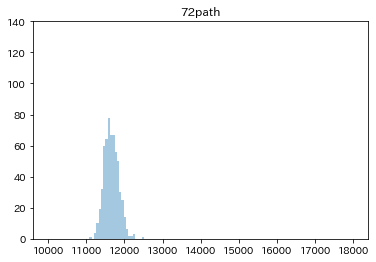

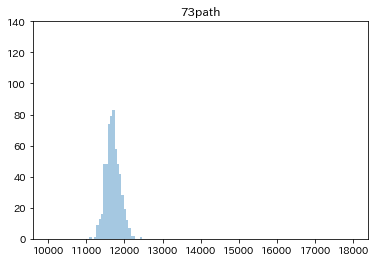

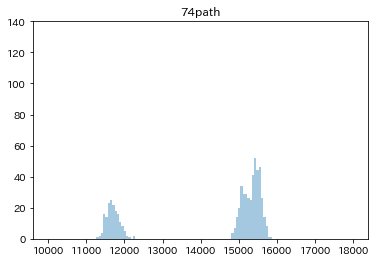

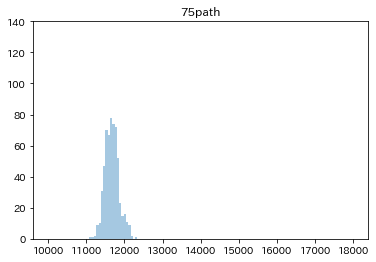

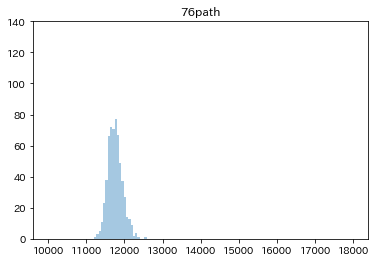

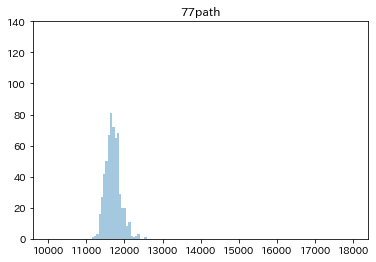

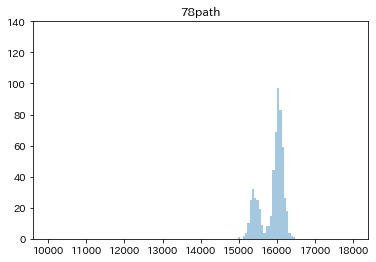

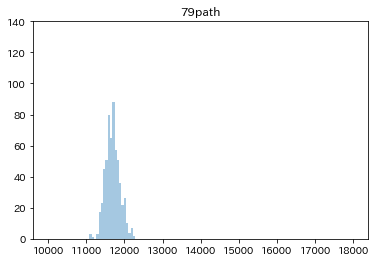

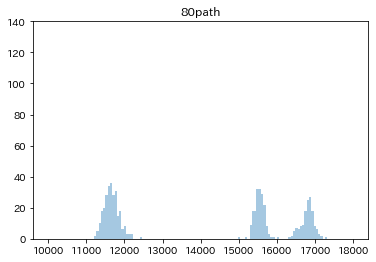

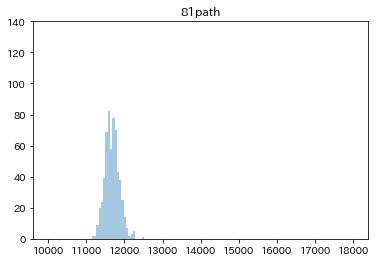

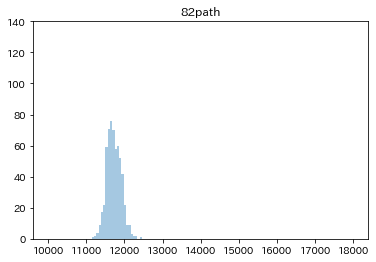

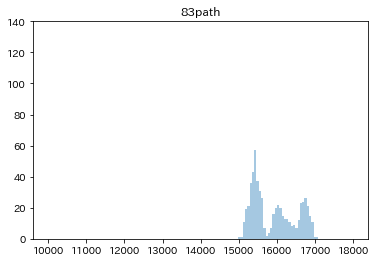

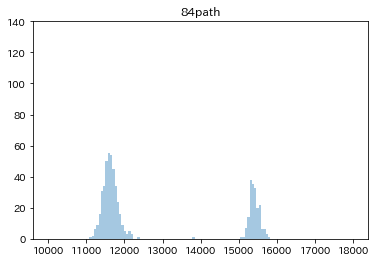

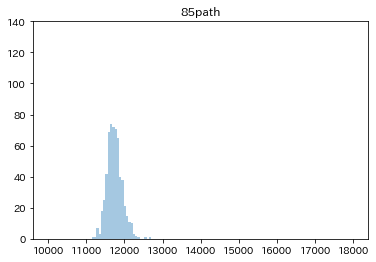

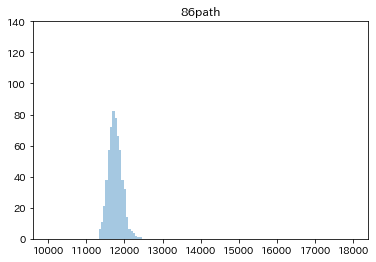

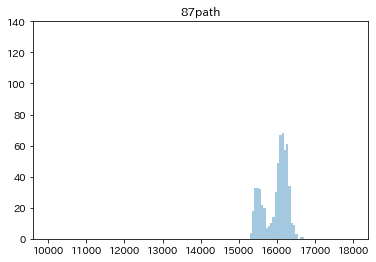

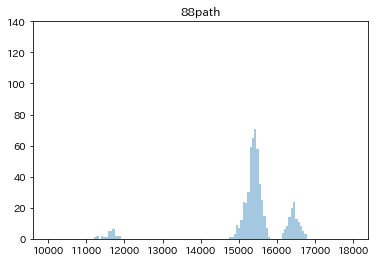

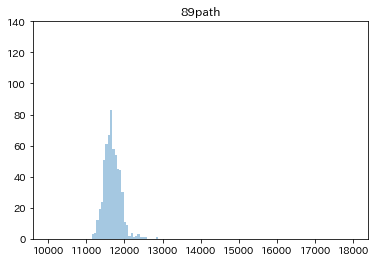

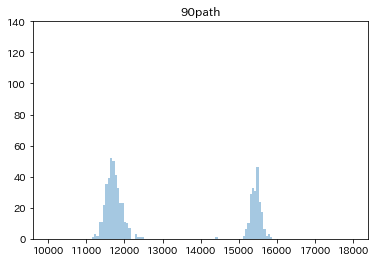

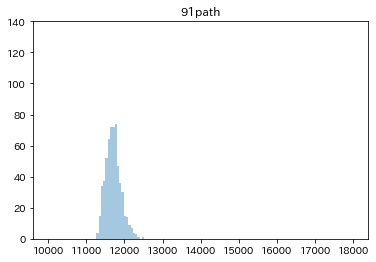

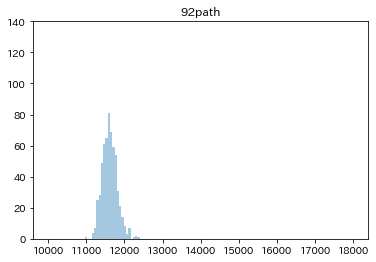

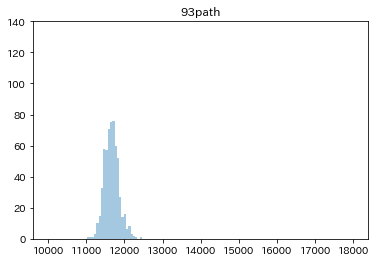

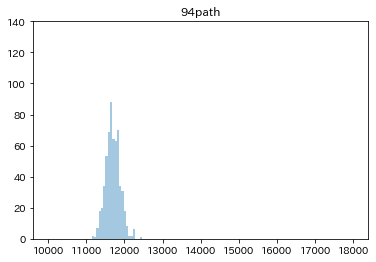

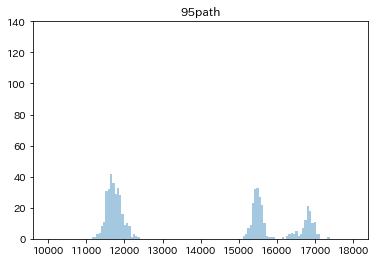

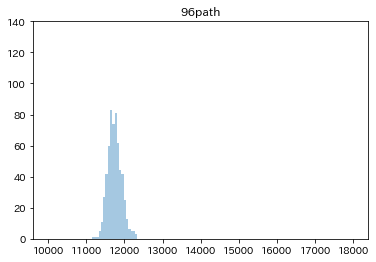

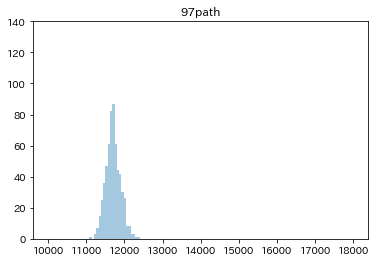

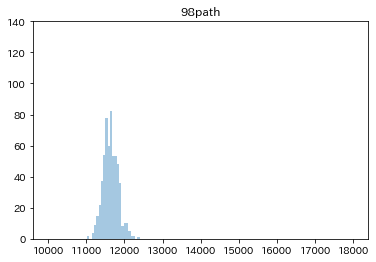

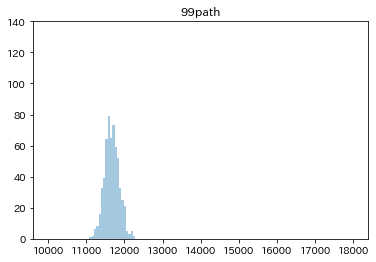

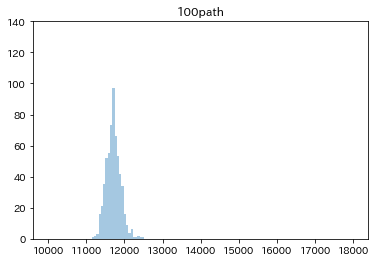

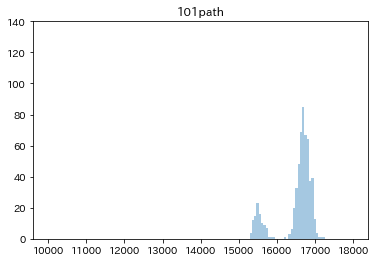

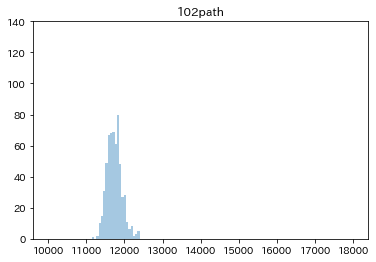

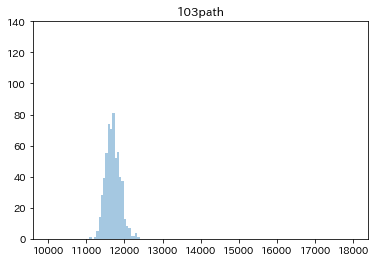

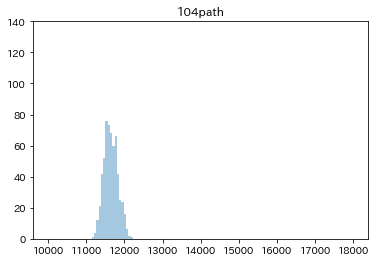

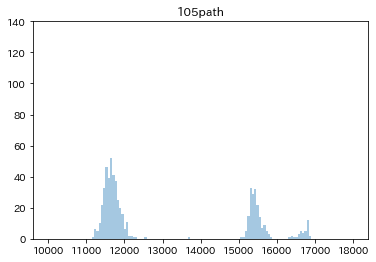

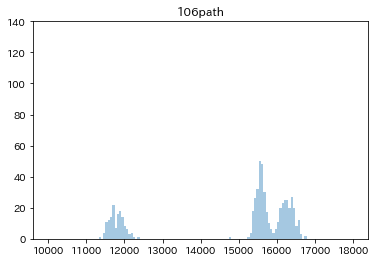

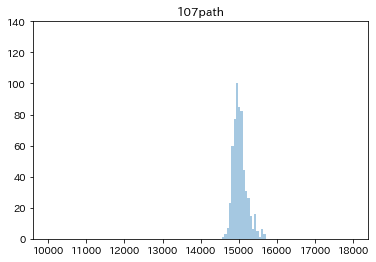

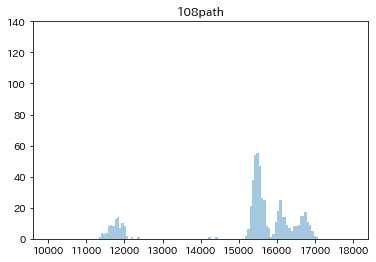

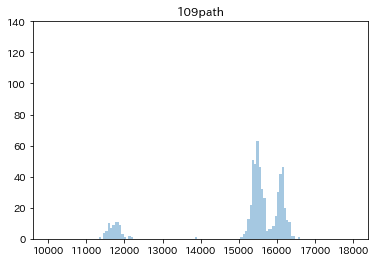

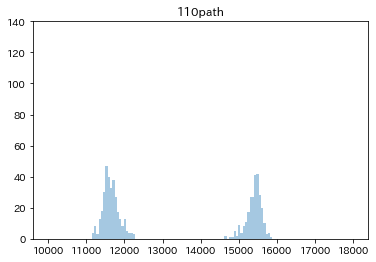

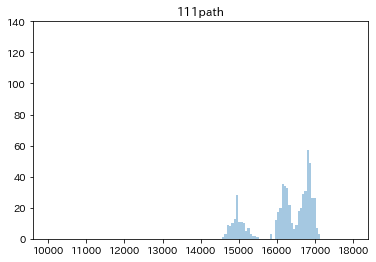

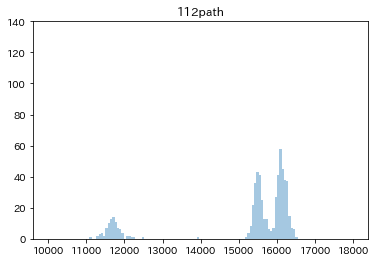

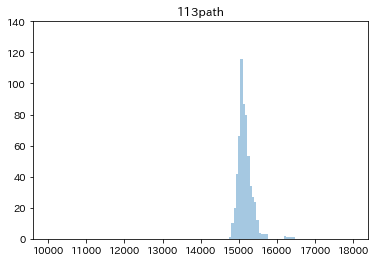

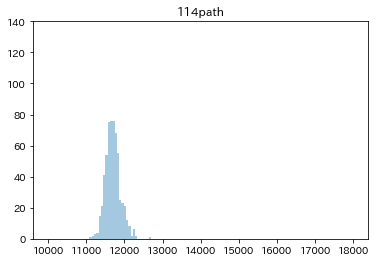

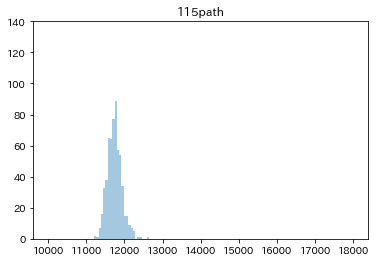

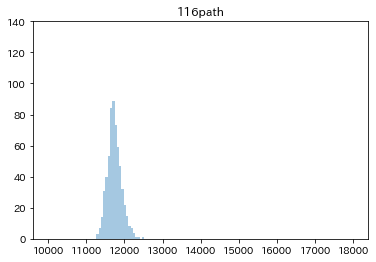

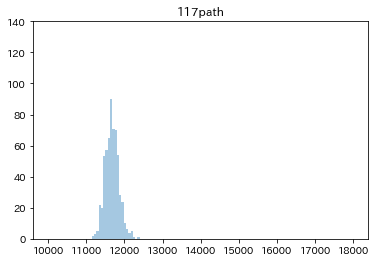

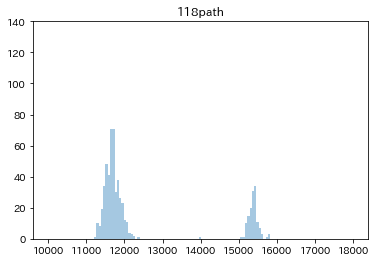

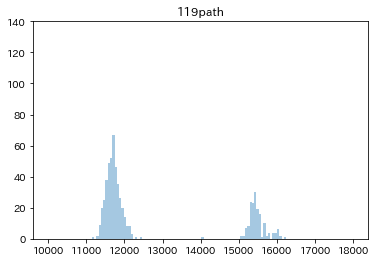

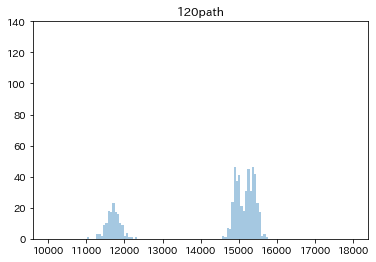

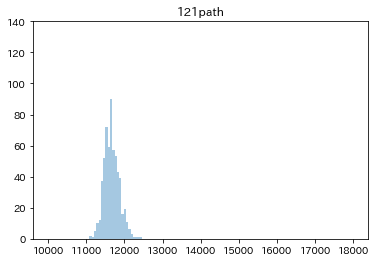

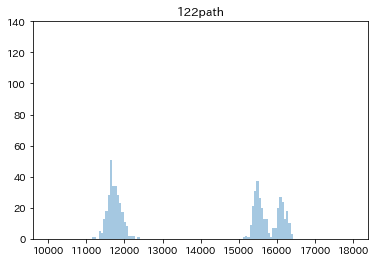

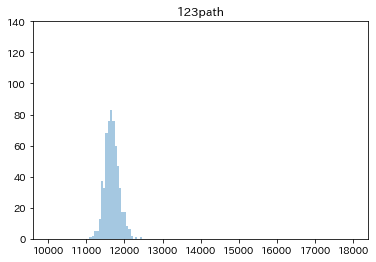

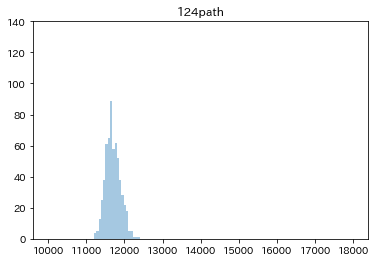

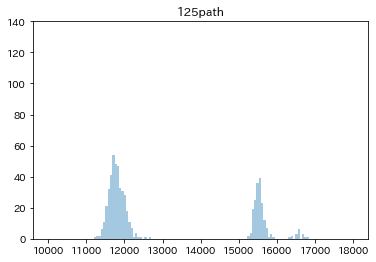

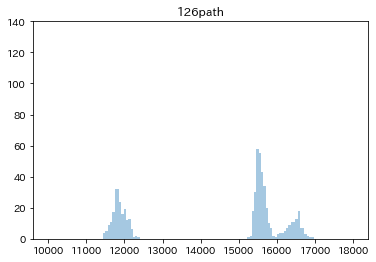

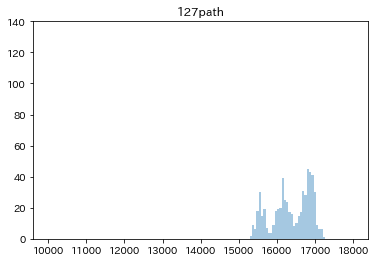

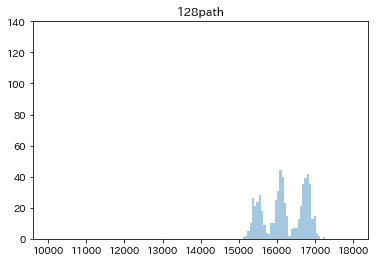

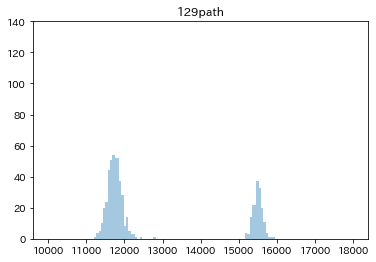

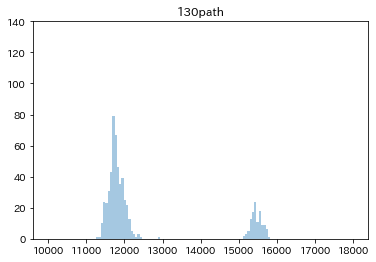

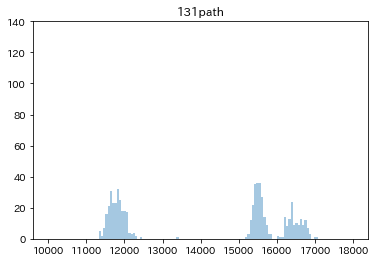

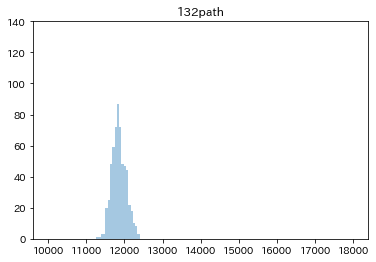

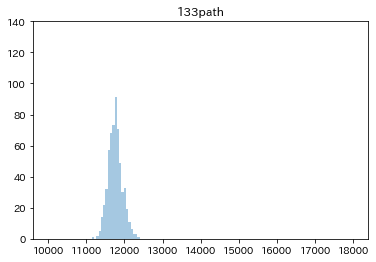

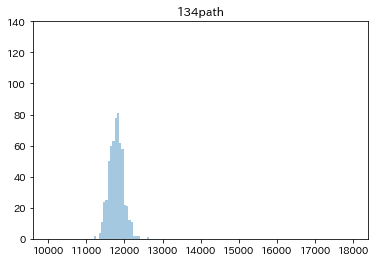

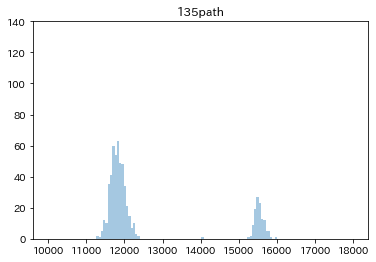

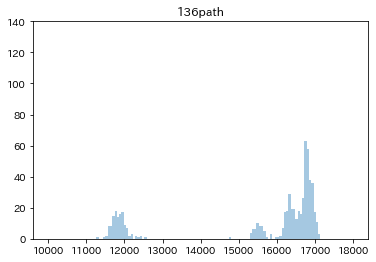

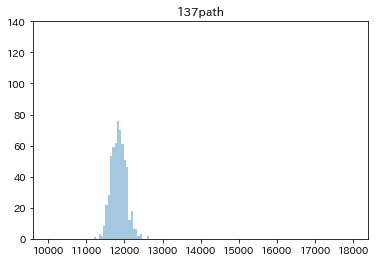

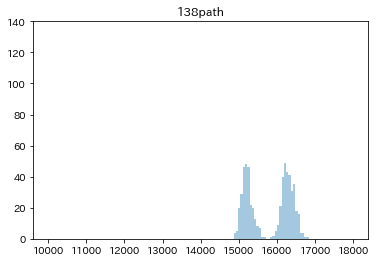

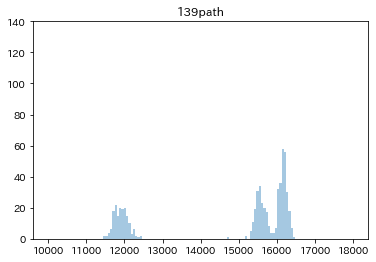

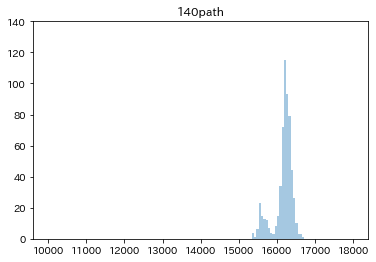

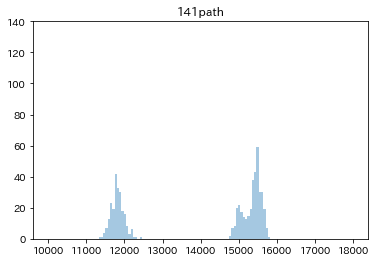

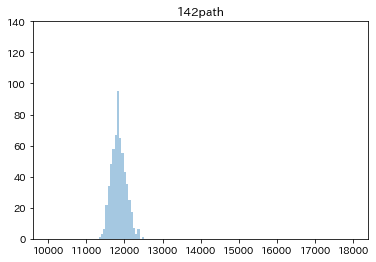

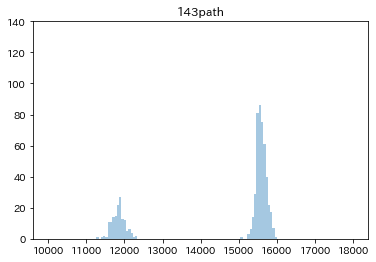

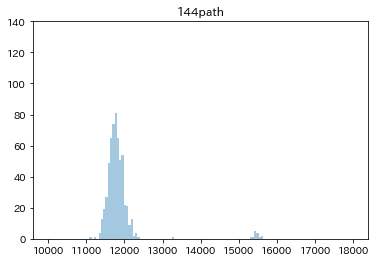

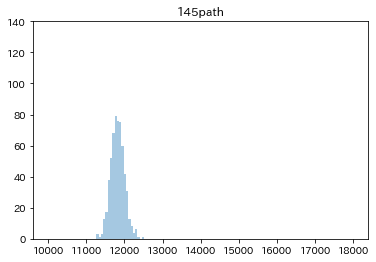

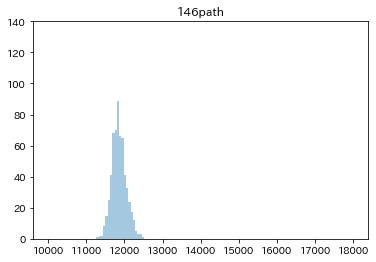

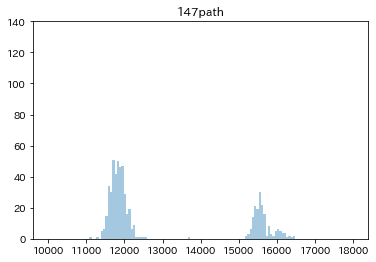

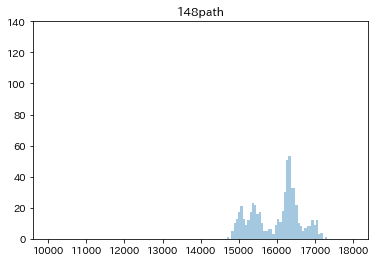

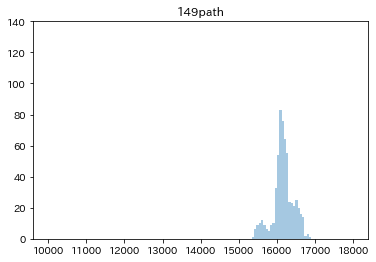

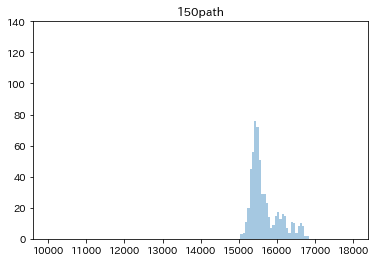

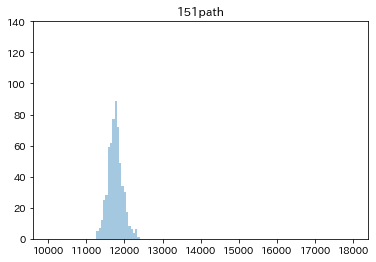

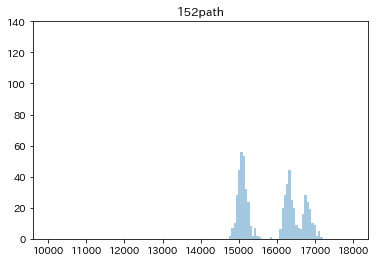

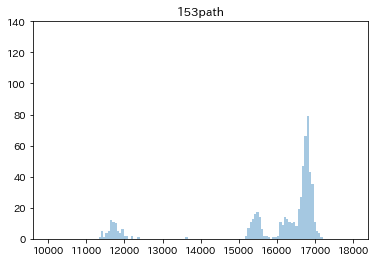

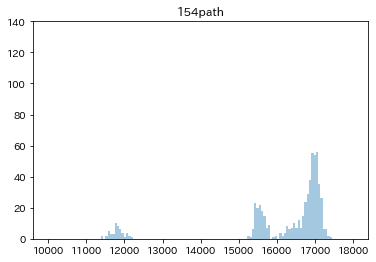

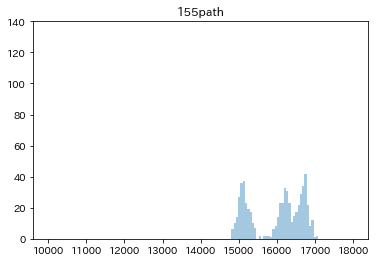

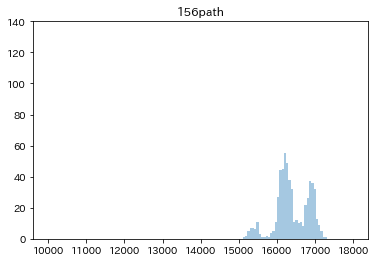

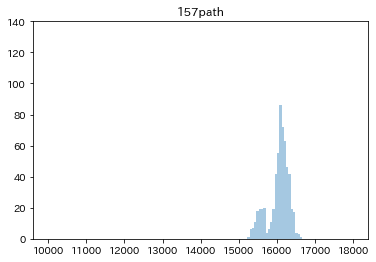

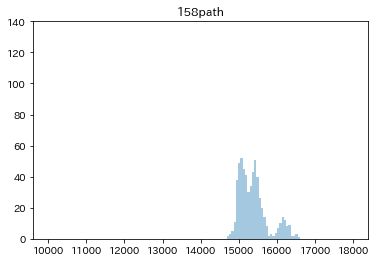

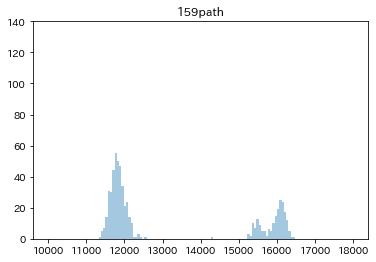

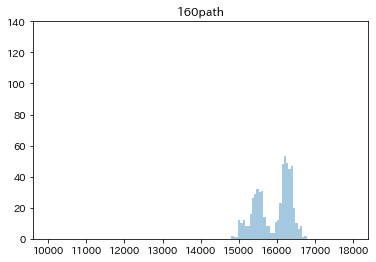

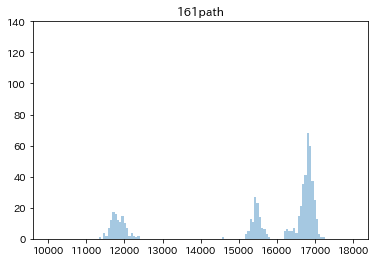

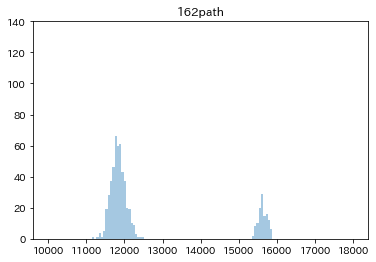

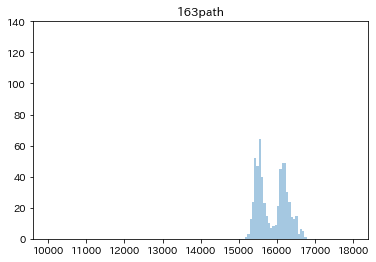

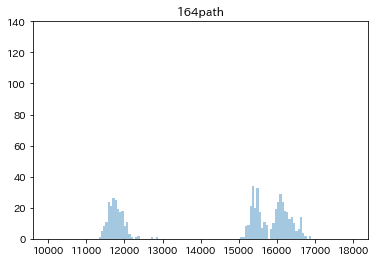

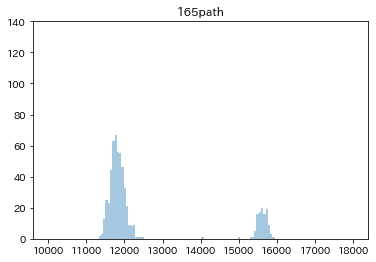

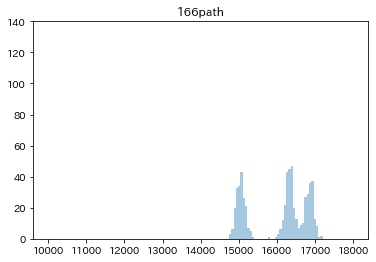

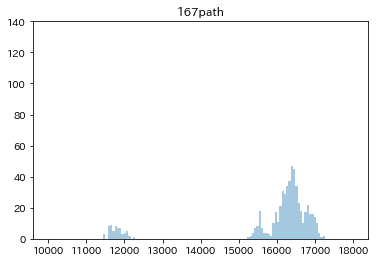

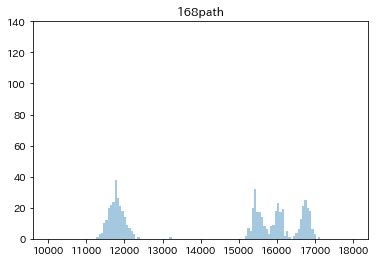

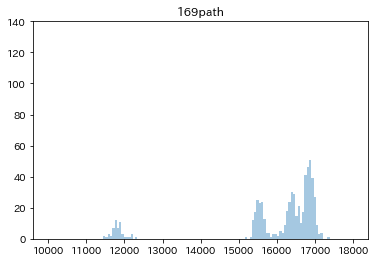

In [88]:
x_min = 10000
x_max = 18000
range_bin_width = range(x_min, x_max, 60)


for num in tqdm(range(1,170)):
    figure, ax = plt.subplots()
    dd = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.npy")
    hist_p = sns.distplot(dd, bins=range_bin_width, kde=False, rug=False)
    figure = hist_p.get_figure()
    hist_p.set_title(rf"{num}path")
    ax.set_ylim(0, 140)
    figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.png")

## 全pathの面積のheatmap

In [93]:
dd3 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\1.npy")
for num in tqdm(range(2,170)):
    dd2 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\{num}.npy")
    dd3 = np.concatenate([dd3, dd2], axis=0)

dd4 = dd3.reshape(int(len(dd3)/591),591)

print(dd4.shape)

np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\All", dd4)

100%|██████████| 168/168 [00:00<00:00, 225.17it/s]

(169, 591)


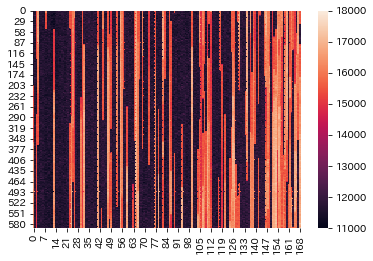

In [96]:
figure, ax = plt.subplots()

d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\All.npy")
d = d.T
sns.heatmap(d, vmin=11000, vmax=18000)

figure.savefig(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\All_heatmap_T.png", dpi=500)

## 各pathごとの面戦記の平均値の推移

In [102]:
d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\All.npy")
d_avg = np.average(d, axis=1)

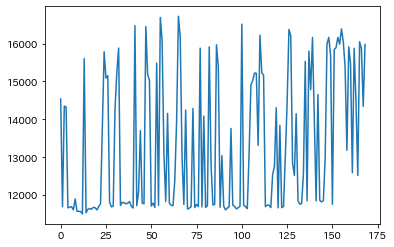

In [103]:
plt.plot(d_avg)

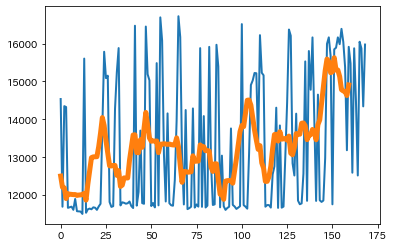

In [140]:

w_size = 10
v = np.ones(w_size) / w_size
d_moving_avg = np.convolve(d_avg,v, mode='valid') 

plt.plot(d_avg, lineWidth="2")
plt.plot(d_moving_avg, lineWidth="5")

## 全部の面積をプロット

In [160]:
d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\Aligned\All.npy")

In [161]:
# d = d[:168].ravel()
d = d.ravel()

In [173]:
%matplotlib qt

fig = plt.figure()

w_size = 591 * 10
v = np.ones(w_size) / w_size
d_moving_avg = np.convolve(d, v, mode='valid') 

ax = fig.add_subplot()
ax.set_xticks(np.arange(1, 169*591, 591*10))
ax.set_xticklabels(np.arange(0,170,10))

# plt.plot(d, lineWidth="2")
plt.plot(d_moving_avg, lineWidth="4")

## 周波数帯に区切って、面積出す

In [204]:
from functools import cache

ImportError: cannot import name 'cache' from 'functools' (C:\Users\pmg07\anaconda3\lib\functools.py)

In [205]:
python --version

NameError: name 'python' is not defined

In [202]:
dt = 1/10**6
split_t_r = 0.1 # 1つの枠で全体のどの割合のデータを分析するか。
overlap = 0.5  # オーバーラップ率
window_F = "hamming"  # 窓関数選択: hanning, hamming, blackman

In [203]:
def fft_integrated_one_rotation(start,end,num,j):
    load_path = rf"Z:\100 Raw_data\20221027---切削実験\AE\Cutting\AE_{num}.tdms"
    d = load_tdms(load_path, ch_num=3)
    d = d[0][start:end]

    N = len(d)
    fq = np.linspace(0, N*dt, N)  # 周波数軸　linspace(開始,終了,分割数)
    fq_, amp_ = FFT_main(fq, d, dt, split_t_r, overlap, window_F)
    
    return 20*np.log10(amp_) +85

In [197]:
for x in range(0,5):
    mensekis = []
    for i in range(1,90):
        for j in tqdm(range(0,591)):
            sample_num = 2**14
            start = j * 25000
            end = start + sample_num
            fft_result = fft_integrated_one_rotation_do_not_to_csv(start,end,i,j)
            fft_result_100khz = fft_result[x*164:(x+1)*164]
            menseki = time_hist_integrator_rect(1,fft_result_100khz)
            mensekis.append(menseki)
        d = np.array(mensekis)
        start_hz = x*100
        end_hz = (x+1)*100
        np.save(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\100khz\{start_hz}-{end_hz}_{i}", d)        

 96%|█████████▋| 570/591 [03:24<00:07,  2.79it/s]


KeyboardInterrupt: 

In [183]:
d.shape

(20,)

In [198]:
# d = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\50khz\{0}-{50}_{num}.npy")
aa = []
for num in range(1,2):
    for i in range(0,10):
        start_hz = i*50
        end_hz = (i+1)*50
        d1 = np.load(rf"Z:\200 Produced_data\20221027\FFTonePath_Focus\menseki\50khz\{start_hz}-{end_hz}_{num}.npy")
        aa.append(d1)
#         d = np.concatenate([d, d1])

In [199]:
aa = np.array(aa)
aa.shape

<ipython-input-199-d72fc1d4156a>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  aa = np.array(aa)


(10,)

In [200]:
aa

array([array([3337.01419973, 3347.44653518, 3317.21478814, 3336.389397  ,
              3318.60754801, 3357.49531427, 3361.15675334, 3307.36298857,
              3340.5042073 , 3331.25990502, 3350.9890552 , 3327.53572387,
              3337.48737632, 3323.72621607, 3311.83758457, 3291.89320598,
              3322.18295301, 3313.03591517, 3318.19685948, 3370.50749881,
              3323.86227395, 3332.27307659, 3327.57142115, 3320.41261663,
              3327.41207457, 3356.55323814, 3322.96619656, 3332.75841552,
              3314.95901078, 3337.573754  , 3329.98649963, 3329.33156377,
              3324.45883738, 3311.58360966, 3323.92328851, 3347.48199512,
              3289.94780977, 3324.51359351, 3334.70356966, 3373.53445455,
              3344.55638831, 3351.45142966, 3348.15315076, 3341.09912672,
              3352.00399346, 3327.07100571, 3307.64327592, 3346.01446403,
              3333.39066209, 3327.87961143, 3334.20955226, 3309.62451059,
              3337.24754431, 3318.0935

In [194]:
aa

array([[3337.01419973, 3347.44653518, 3317.21478814, 3336.389397  ,
        3318.60754801, 3357.49531427, 3361.15675334, 3307.36298857,
        3340.5042073 , 3331.25990502, 3350.9890552 , 3327.53572387,
        3337.48737632, 3323.72621607, 3311.83758457, 3291.89320598,
        3322.18295301, 3313.03591517, 3318.19685948, 3370.50749881],
       [1359.97310394, 1381.24531151, 1309.18764544, 1311.79205731,
        1318.9091941 , 1367.97382584, 1387.91021808, 1318.57391233,
        1342.98201618, 1349.68613156, 1366.00383621, 1399.00433677,
        1333.53079455, 1338.41097919, 1349.85840321, 1314.23790983,
        1308.17084454, 1273.19999498, 1307.67459349, 1358.06462452],
       [ 871.83650929,  867.19055384,  801.87008687,  771.13921018,
         823.92907364,  879.30280689,  885.76494779,  785.92545788,
         838.41580046,  843.47971291,  861.61640461,  870.61671636,
         822.95725329,  814.44954158,  870.21606813,  812.48515893,
         762.2564895 ,  717.41891669,  755.961